<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; min-width: 250px; display: flex; justify-content: center;">
        <img src="https://adnova.novaims.unl.pt/media/22ui3ptm/logo.svg" style="max-width: 80%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;margin-left: 8rem;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style='color:#6f800f'> Data Mining Project | </span>
            <span style='color:#393B79'>ABCDEats Inc.</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>Filipa Pereira, 20240509</div>
            <div>Umeima Mahomed, 20240543</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            Group 37
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#6f800f, #393B79); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## **📚 Libraries Import**

In [20]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
from matplotlib.colors import LinearSegmentedColormap

# For HC + K-Means Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Set the style of the visualization
pd.set_option('display.max_columns', None)                  # display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x) # display floats with 2 decimal places

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right, #6f800f,#393B79); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>Part 2 | K-Means Clustering </b></h1></center>
</div>

## **🧮 Import Data**

In [21]:
# Importing the dataset after the preprocessing
ABCDEats = pd.read_parquet('data/DM2425_ABCDEats_preprocessed.parquet')

In [22]:
# Display the first 5 rows just to confirm the import was successful
ABCDEats.head() 

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360         18.00             2              5   
5d272b9dcb             8670         17.00             2              2   
f6d1b2ba63             4660         38.00             1              2   
180c632ed8             4660         24.00             2              3   
4eb37a6705             4660         20.00             2              5   

             chain_count  first_order  last_order last_promo payment_method  \
customer_id                                                                   
1b8f824d5e             1         0.00           1   DELIVERY           DIGI   
5d272b9dcb             2         0.00           1   DISCOUNT           DIGI   
f6d1b2ba63             2         0.00           1   DISCOUNT           CASH   
180c632ed8             1         0.00           2   DELIVERY           DIGI   
4eb37a6705             0         0.00           2   NO PROMO           DIGI   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00           0.00      0.00   
5d272b9dcb          12.82       6.39           0.00      0.00   
f6d1b2ba63           9.20       0.00           0.00      0.00   
180c632ed8           0.00      13.70           0.00      0.00   
4eb37a6705          14.57      40.87           0.00      0.00   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                 0.00         0.00          0.00         0.00   
5d272b9dcb                 0.00         0.00          0.00         0.00   
f6d1b2ba63                 0.00         0.00          0.00         0.00   
180c632ed8                 0.00         0.00          0.00         0.00   
4eb37a6705                 0.00         0.00          0.00         0.00   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88         0.00          0.00               0.00   
5d272b9dcb         0.00         0.00          0.00               0.00   
f6d1b2ba63         0.00         0.00          0.00               0.00   
180c632ed8        17.86         0.00          0.00               0.00   
4eb37a6705         0.00         0.00          0.00               0.00   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  Sunday  Monday  \
customer_id                                                                  
1b8f824d5e        0.00                      0.00      0.00       1       0   
5d272b9dcb        0.00                      0.00      0.00       1       0   
f6d1b2ba63        0.00                      0.00      0.00       1       0   
180c632ed8        0.00                      0.00      0.00       0       1   
4eb37a6705        0.00                      0.00      0.00       0       1   

             Tuesday  Wednesday  Thursday  Friday  Saturday  HR_0  HR_1  HR_2  \
customer_id                                                                     
1b8f824d5e         0          0         0       0         1     0     0     0   
5d272b9dcb         0          0         0       0         1     0     0     0   
f6d1b2ba63         0          0         0       0         1     0     0     0   
180c632ed8         0          0         0       0         1     0     0     0   
4eb37a6705         0          0         0       0         1     0     0     0   

             HR_3  HR_4  HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  \
customer_id                                                                  
1b8f824d5e      0     0     0     0     0     0     0      0      0      0   
5d272b9dcb      0     0     0     0     0     0     0      1      1      0   
f6d1b2ba63      0 

In [23]:
# Number of rows and columns
print('Number of\033[1m rows \033[0m:', ABCDEats.shape[0])
print('Number of\033[1m columns \033[0m:', ABCDEats.shape[1])

Number of rows : 31279
Number of columns : 107


In [24]:
# Check the data types
ABCDEats.dtypes

customer_region               object
customer_age                 float64
vendor_count                   int64
product_count                  int64
chain_count                    int64
                              ...   
CUI_Beverages_Thai_PC        float64
HR_Lunch_Dinner_PC           float64
HR_LateNight_Breakfast_PC    float64
HR_Evening_PC                float64
HR_AfternoonSnack_PC         float64
Length: 107, dtype: object

---

In [25]:
# Create a continuous and discrete colormap
colors = ["#3E460F", "#4E5813", "#626E18", "#7A891E", "#98AB26", "#BED62F"]
NOVAIMS_palette_colors = sns.color_palette(colors[::-1], as_cmap=True)

colors = ["#3E460F", "#4E5813", "#626E18", "#7A891E", "#98AB26", "#BED62F", "#FFFFFF"]
NOVAIMS_palette_colors_continuous = LinearSegmentedColormap.from_list("NOVAIMS_palette", colors[::-1])

In [26]:
# list(ABCDEats.columns)

In [27]:
# Define metric and non-metric features
metric_features = [
    # 'vendor_count', 'product_count', 'days_between_orders' -> removed due to multicollinearity
    'customer_age', 'chain_count', 'first_order', 'last_order',
    'order_count', 
    'days_between_orders_per_order',
    'CUI_Total_Amount_Spent',
    'CUI_Total_Food_Types',
    'CUI_Avg_Amount_Spent',
    
    # Principal Components [CUI] 
    'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 'CUI_Chicken_Chinese_Noodle_PC', 
    'CUI_Healthy_NOTAmerican_PC', 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC',

    # Original [DOW]
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    
    # Principal Components [HR]
    'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC'
]

# Non-metric columns
non_metric_features = [
    'customer_age_group', 'customer_region_buckets', 'customer_region', 
    'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine',
]

# Not-Used
not_used_features = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
                     'CUI_Most_Spent_Cuisine_Asian', 'CUI_Most_Spent_Cuisine_Beverages',  'CUI_Most_Spent_Cuisine_Cafe', 'CUI_Most_Spent_Cuisine_Chicken Dishes',  'CUI_Most_Spent_Cuisine_Chinese',
                     'CUI_Most_Spent_Cuisine_Desserts', 'CUI_Most_Spent_Cuisine_Healthy', 'CUI_Most_Spent_Cuisine_Indian', 'CUI_Most_Spent_Cuisine_Italian', 'CUI_Most_Spent_Cuisine_Japanese',
                     'CUI_Most_Spent_Cuisine_Noodle Dishes', 'CUI_Most_Spent_Cuisine_OTHER', 'CUI_Most_Spent_Cuisine_Street Food / Snacks', 'CUI_Most_Spent_Cuisine_Thai',
                     'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'HR_0', 'HR_1', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
                     'HR_19', 'HR_2', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
                     'customer_region_2440', 'customer_region_2490', 'customer_region_4140', 'customer_region_4660', 'customer_region_8370', 'customer_region_8550', 'customer_region_8670',
                     'customer_region_Unknown', 'customer_region_buckets_4', 'customer_region_buckets_8', 'customer_region_buckets_U', 'days_between_orders', 
                     'last_promo_DISCOUNT', 'last_promo_FREEBIE', 'last_promo_NO PROMO', 'last_promo_bin_True', 'payment_method_CASH', 'payment_method_DIGI', 'product_count', 'vendor_count']


not_used_features_metric = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
                            'vendor_count', 'product_count', 'days_between_orders',
                            'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_2', 'HR_20', 'HR_21', 'HR_22', 'HR_23']
not_used_features_non_metric = ['customer_region_buckets', 'customer_region', 'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine']


print(f'Metric columns: {len(metric_features)}, {metric_features} \n')
print(f'Non-Metric columns: {len(non_metric_features)}, {non_metric_features}')

Metric columns: 27, ['customer_age', 'chain_count', 'first_order', 'last_order', 'order_count', 'days_between_orders_per_order', 'CUI_Total_Amount_Spent', 'CUI_Total_Food_Types', 'CUI_Avg_Amount_Spent', 'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 'CUI_Chicken_Chinese_Noodle_PC', 'CUI_Healthy_NOTAmerican_PC', 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC'] 

Non-Metric columns: 7, ['customer_age_group', 'customer_region_buckets', 'customer_region', 'last_promo', 'last_promo_bin', 'payment_method', 'CUI_Most_Spent_Cuisine']


In [28]:
# Check what columns are not used in the clustering
# set(ABCDEats.columns) - set(metric_features) - set(non_metric_features)

{'CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Most_Spent_Cuisine_Asian',
 'CUI_Most_Spent_Cuisine_Beverages',
 'CUI_Most_Spent_Cuisine_Cafe',
 'CUI_Most_Spent_Cuisine_Chicken Dishes',
 'CUI_Most_Spent_Cuisine_Chinese',
 'CUI_Most_Spent_Cuisine_Desserts',
 'CUI_Most_Spent_Cuisine_Healthy',
 'CUI_Most_Spent_Cuisine_Indian',
 'CUI_Most_Spent_Cuisine_Italian',
 'CUI_Most_Spent_Cuisine_Japanese',
 'CUI_Most_Spent_Cuisine_Noodle Dishes',
 'CUI_Most_Spent_Cuisine_OTHER',
 'CUI_Most_Spent_Cuisine_Street Food / Snacks',
 'CUI_Most_Spent_Cuisine_Thai',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai',
 'HR_0',
 'HR_1',
 'HR_10',
 'HR_11',
 'HR_12',
 'HR_13',
 'HR_14',
 'HR_15',
 'HR_16',
 'HR_17',
 'HR_18',
 'HR_19',
 'HR_2',
 'HR_20',
 'HR_21',
 'HR_22',
 'HR_23',
 'HR_3',
 'HR_4',
 'HR_5',
 'HR_6',
 'HR_7',
 'HR_8',
 'HR_9',
 

In [29]:
# List of weekdays (0 = Sunday, 6 = Saturday)
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekdays_dict = dict(enumerate(weekdays))
weekdays_dict

{0: 'Sunday',
 1: 'Monday',
 2: 'Tuesday',
 3: 'Wednesday',
 4: 'Thursday',
 5: 'Friday',
 6: 'Saturday'}

---

## **⚫🟢⚪ Clustering**

### **K-Means Clustering Algorithm[<sup>[2]</sup>](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)**

### **Define the number of clusters**

In [30]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(ABCDEats[metric_features])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

**Inertia Formula:**

$$\sum_{j=0}^{C}\sum_{i=0}^{n_j}(||x_i - \mu_j||^2)$$
, where:

- $C$: Set of identified clusters.
- $n_j$: Set of observations belonging to cluster $j$.
- $x_i$: Observation $i$.
- $\mu_j$: Centroid of cluster $j$.

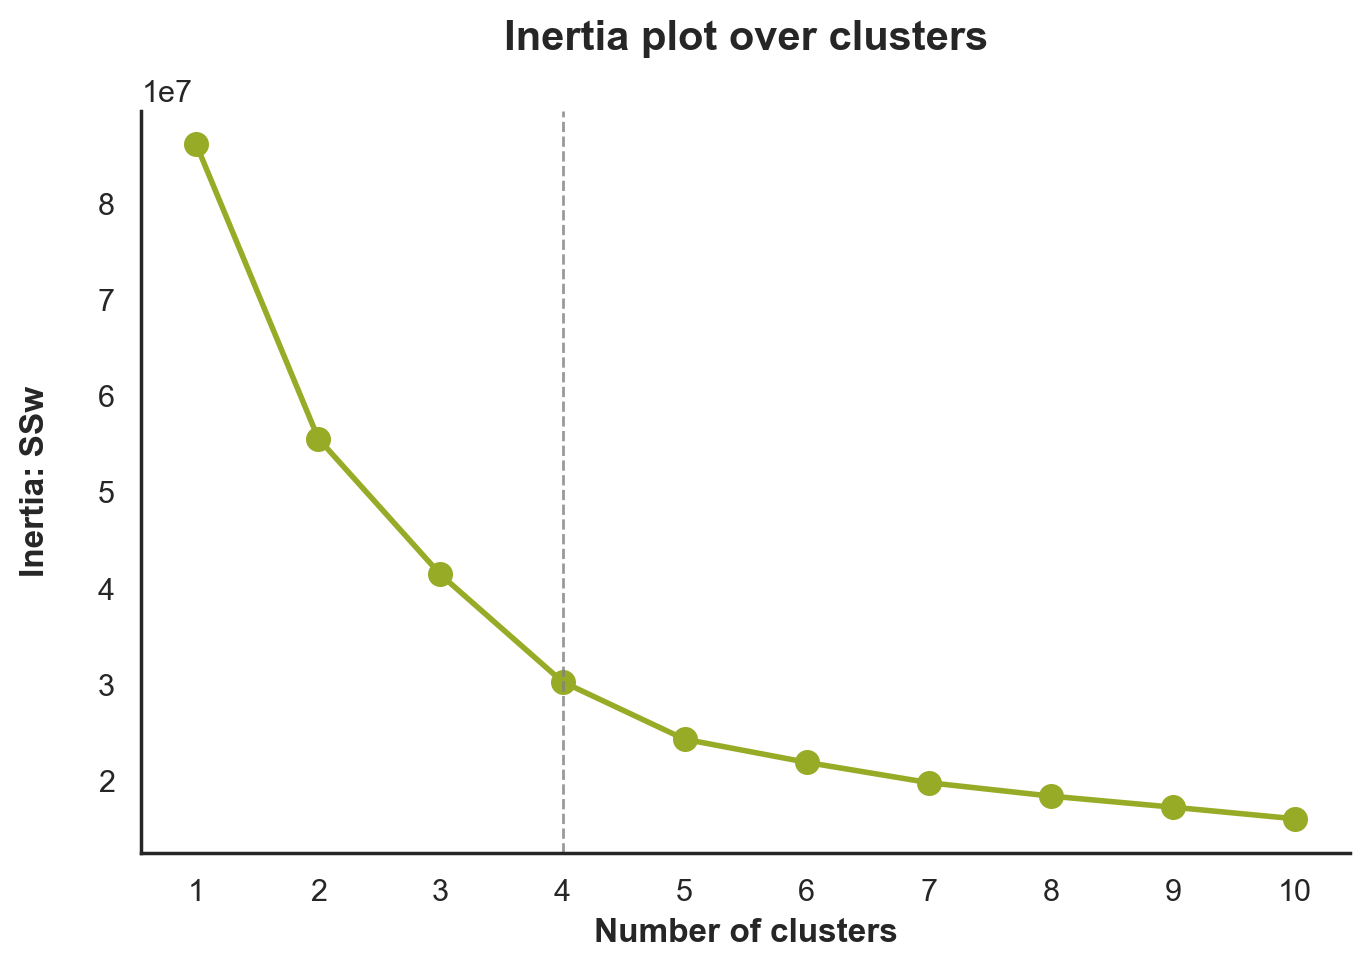

In [31]:
# Inertia Plot
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(range_clusters, inertia, marker='o', color = NOVAIMS_palette_colors[1], linewidth=2, markersize=8)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw\n", size=12, weight='bold')
ax.set_xlabel("Number of clusters", size=12, weight='bold')
ax.set_title("Inertia plot over clusters\n", size=15, weight='bold')

# Add the number of clusters chosen
ax.axvline(x=4, color='grey', linestyle='--', linewidth=1, alpha=0.8)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_Inertia_Plot.png', dpi=300, bbox_inches='tight')
plt.show()


### **Silhouette Coefficient**

**Silhouette Coefficient formula for a single sample:**
$$s = \frac{b - a}{max(a, b)}$$
, where:
- $a$: The mean distance between a sample and all other points in the same cluster.
- $b$: The mean distance between a sample and all other points in the next nearest cluster

---


If $b > a$, then what?

Then the sample is closer to the points in the cluster it is assigned to (compared to the points in the next nearest cluster)

$$s \text{ is positive }$$

<div class="alert alert-block alert-success" style="font-size:20px;">

[**If $b > a$, then what?**] -> **Good!** (Os pontos do mesmo cluster estão mais próximos do que os pontos do cluster mais próximo **OU** alto $b$ e baixo $a$ quando ele próprio é o centroid)

</div>

---


If $b = a$, then what?

*Then the sample is equally distant to the points in the cluster it is assigned to as well as the points in the next closest cluster*

$$s \text{ is 0}$$

<div class="alert alert-block alert-warning" style="font-size:20px;">

[**If $b = a$, then what?**] -> **Ok!** (Os pontos do mesmo cluster estão igualmente distantes dos pontos do cluster mais próximo **OU** $(b-a)/b=0$ podia pertencer a qualquer cluster)

</div>


---

If $b < a$, then what?

*Then the sample is closer to the points in the next closest cluster (compared to the points in the same cluster).*

$$s \text{ is negative }$$

<div class="alert alert-block alert-danger" style="font-size:20px;">

[**If $b < a$, then what?**] -> **Bad!** (Os pontos do mesmo cluster estão mais distantes do que os pontos do cluster mais próximo [OUTLIER ⚠️⚠️])

</div>

---

**If the average value of $s$ is high, then what?**


"Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster."

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


<div class="alert alert-block alert-info" style="font-size:20px;">

**Silhouette Coefficient** ranges from -1 to 1. [COPILOT]

- **1**: The sample is far away from the neighboring clusters.
- **0**: The sample is on or very close to the decision boundary between two neighboring clusters.
- **-1**: The sample might have been assigned to the wrong cluster.
- 
- **Negative values**: Incorrect clustering.
- **Values near 0**: Overlapping clusters.
- **Values near 1**: Well separated clusters.



For n_clusters = 2, the average silhouette_score is : 0.44769193466514684
For n_clusters = 3, the average silhouette_score is : 0.29938114222413253
For n_clusters = 4, the average silhouette_score is : 0.34452781207555466
For n_clusters = 5, the average silhouette_score is : 0.34083667143506147
For n_clusters = 6, the average silhouette_score is : 0.3174920163752793
For n_clusters = 7, the average silhouette_score is : 0.283190974865326
For n_clusters = 8, the average silhouette_score is : 0.2837105632353162
For n_clusters = 9, the average silhouette_score is : 0.2709404678394786
For n_clusters = 10, the average silhouette_score is : 0.26609717676141104


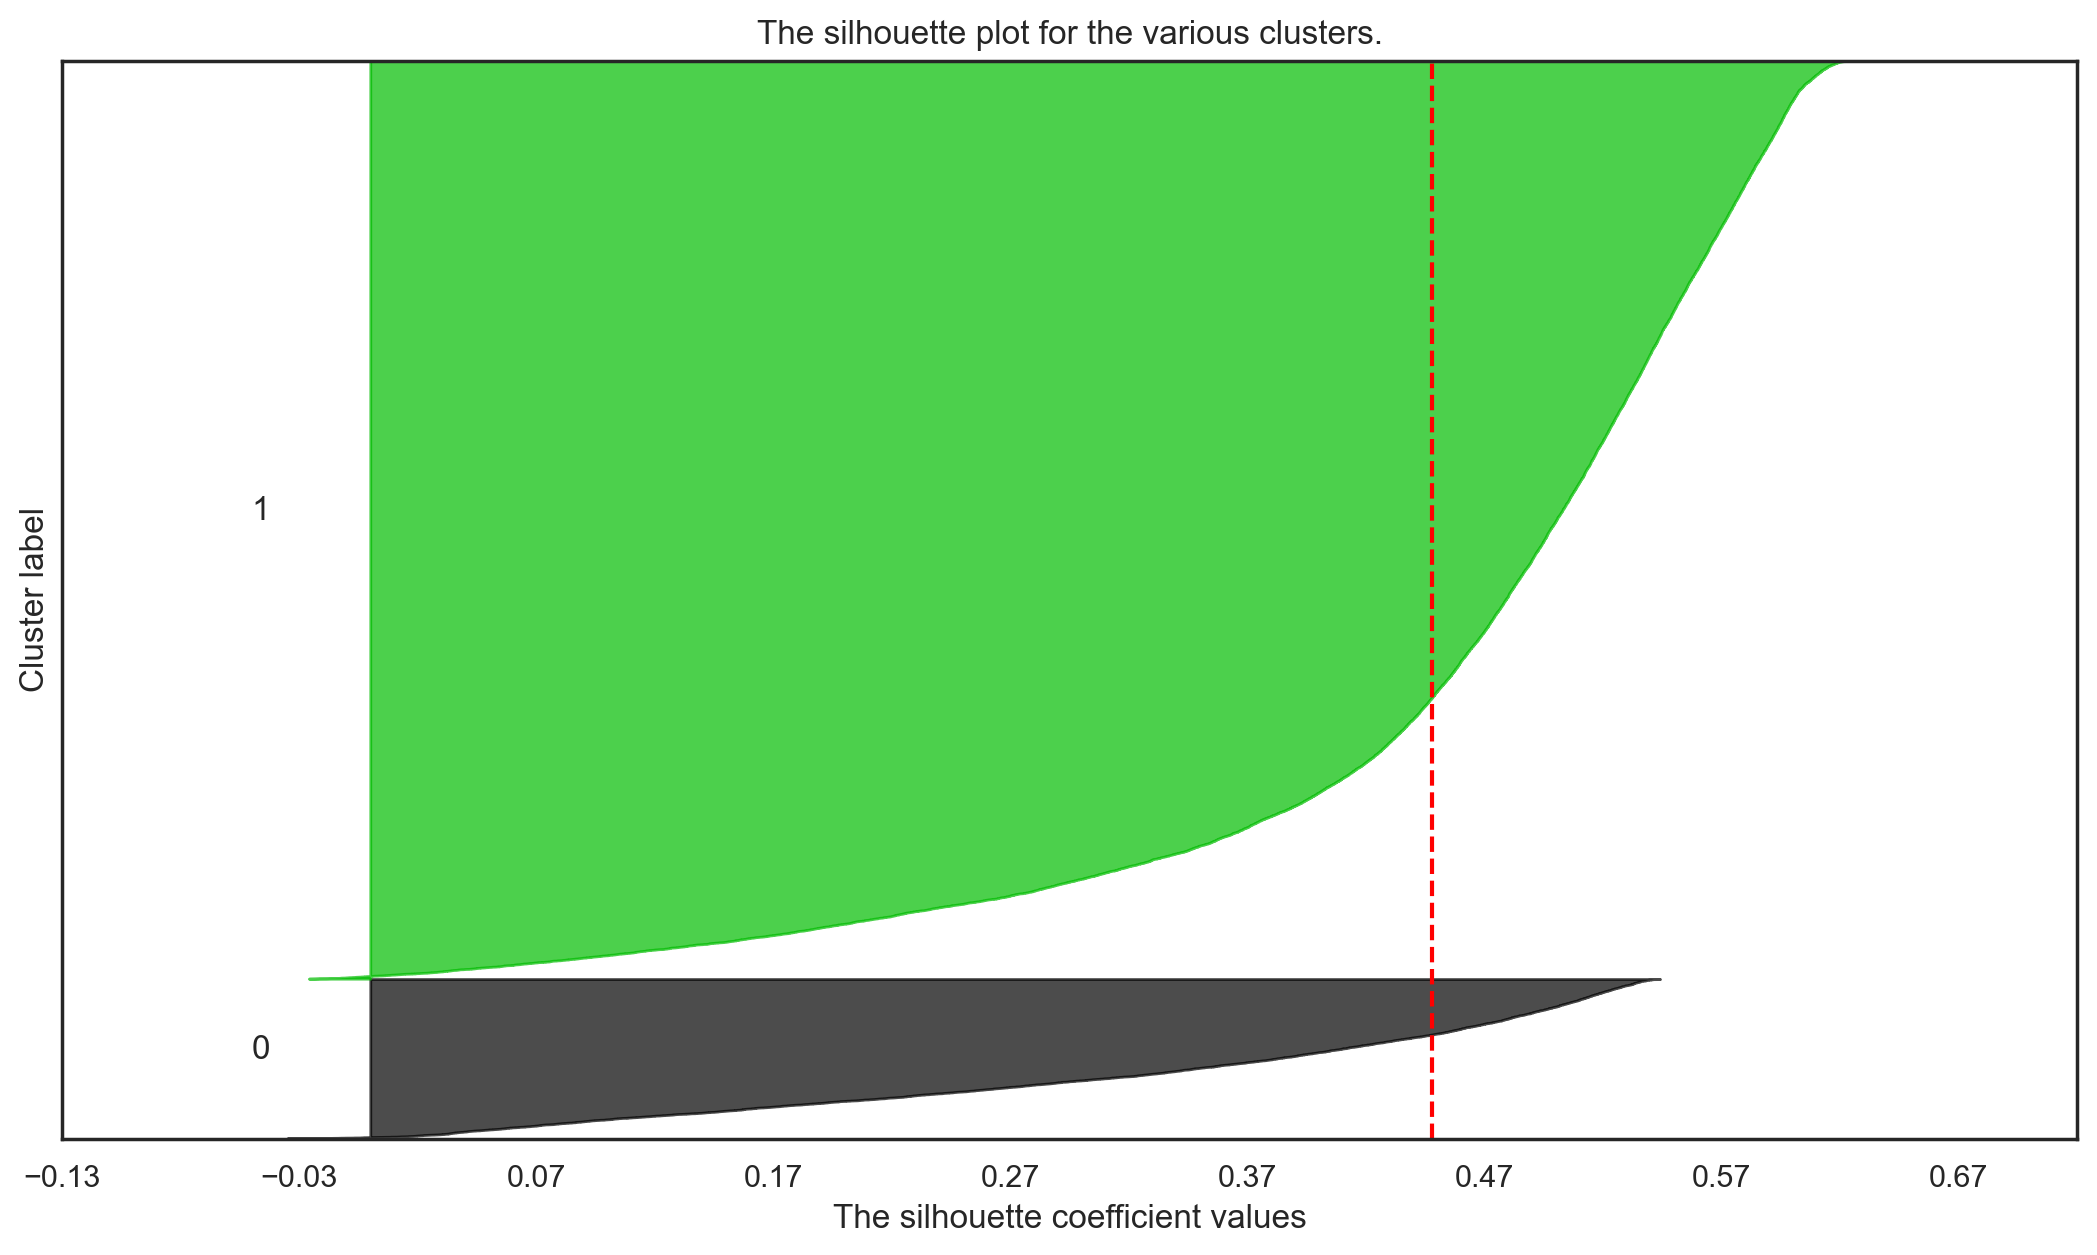

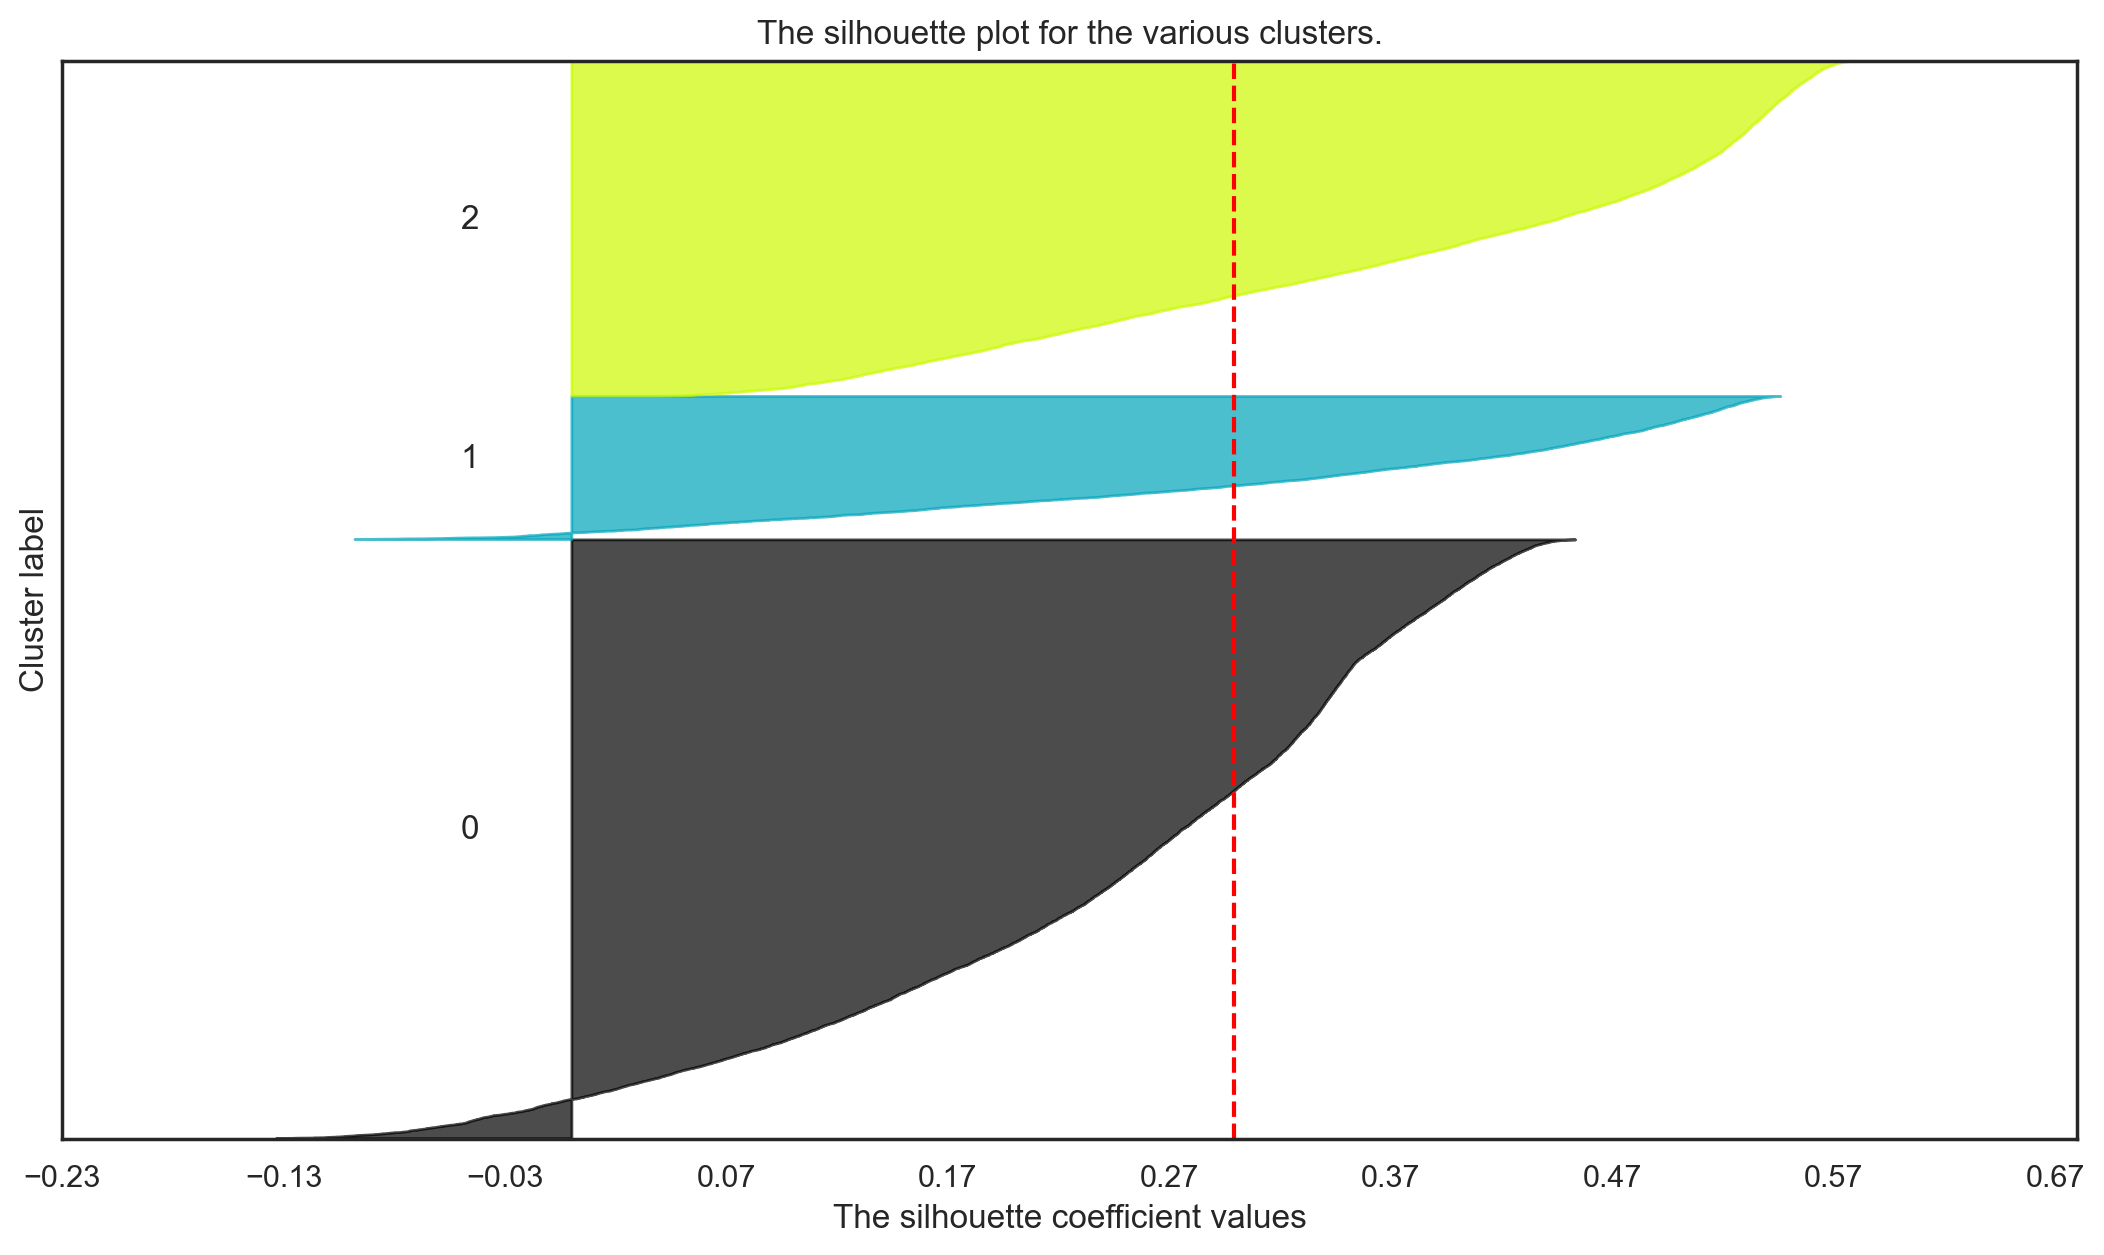

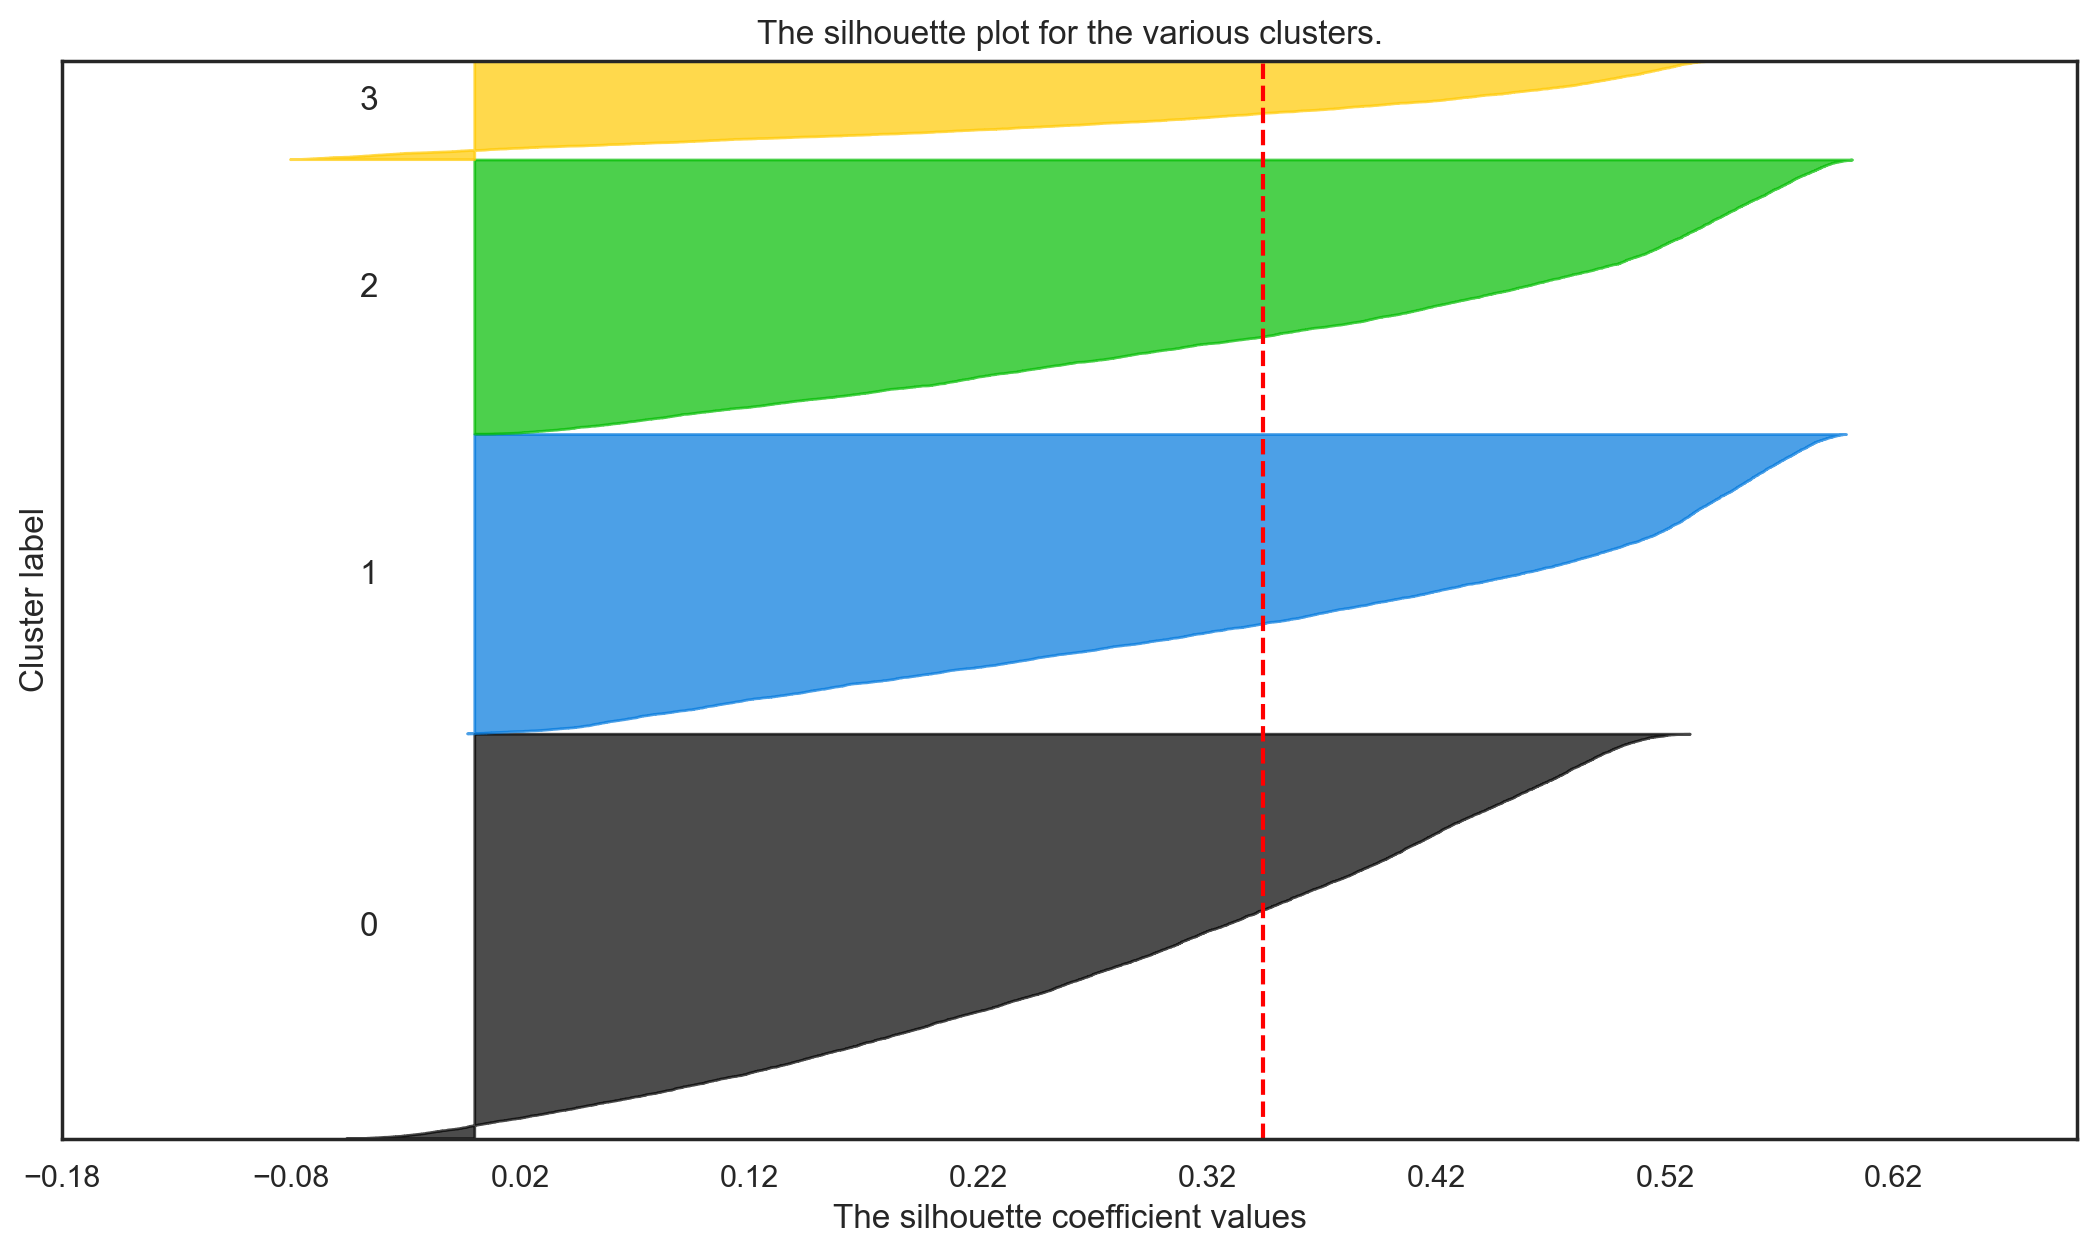

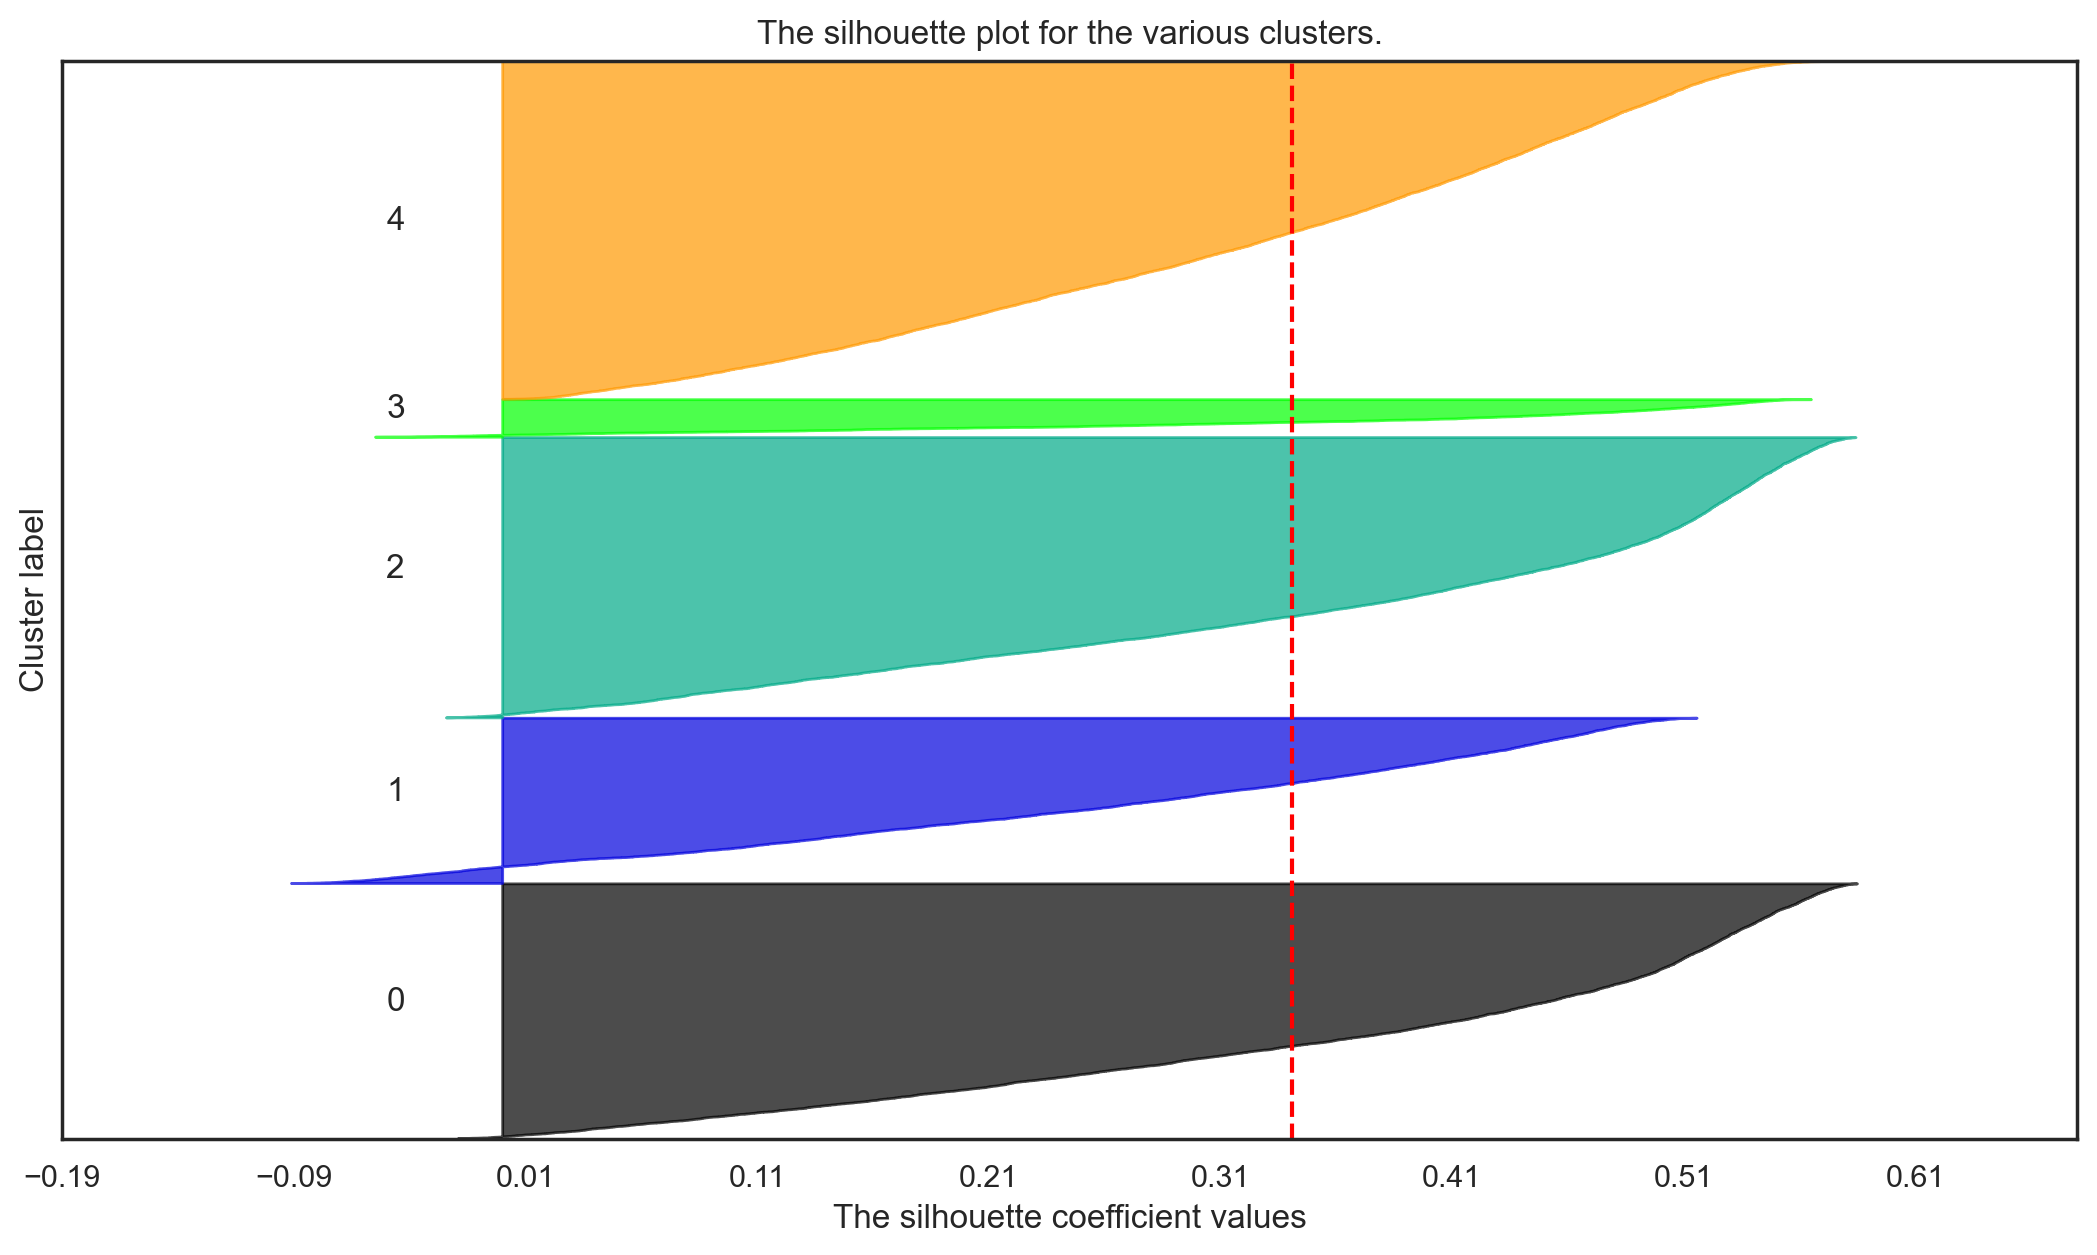

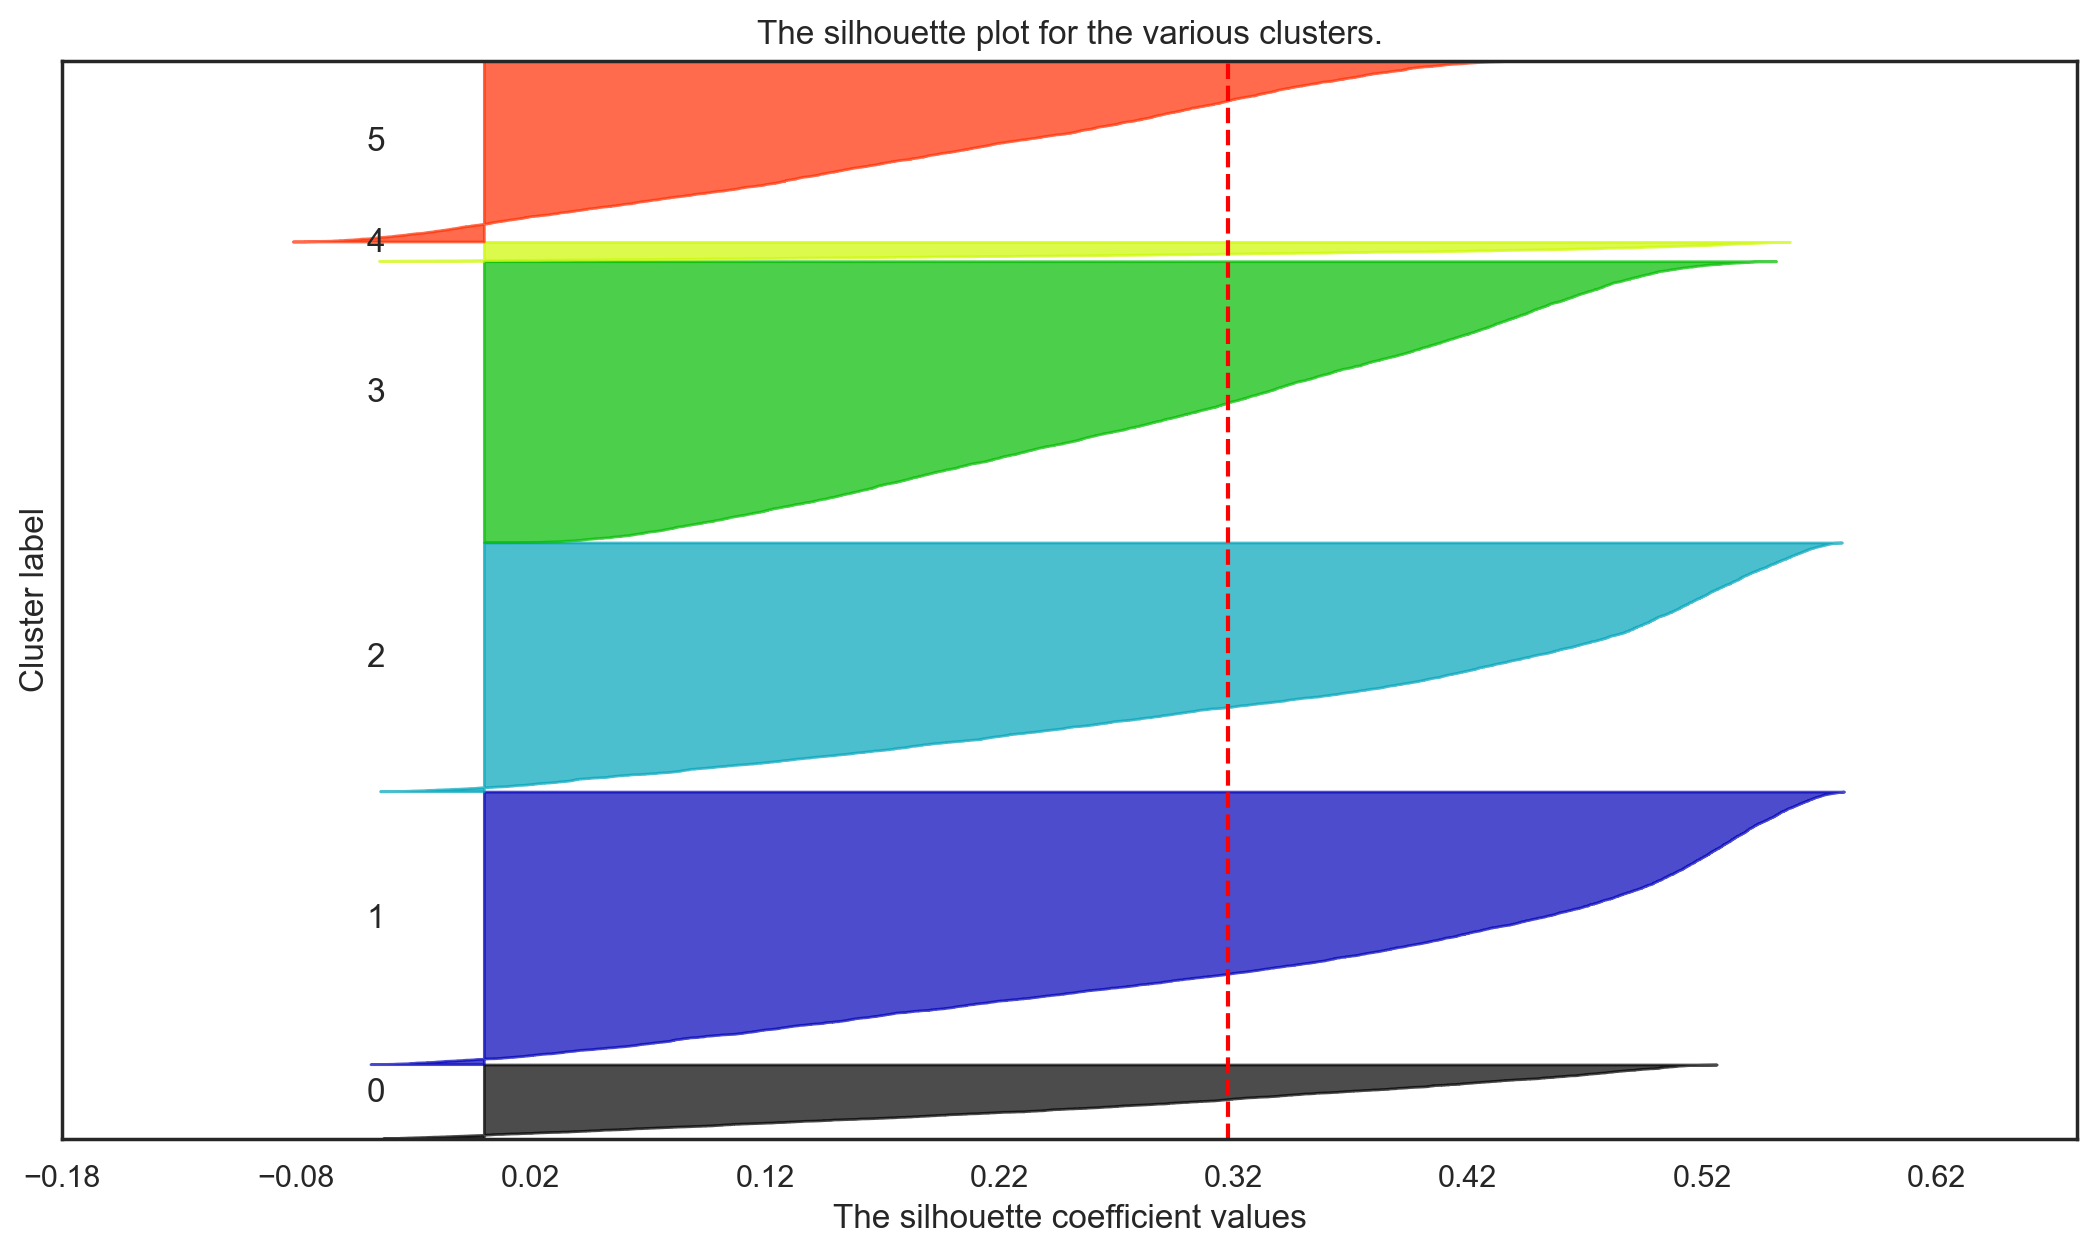

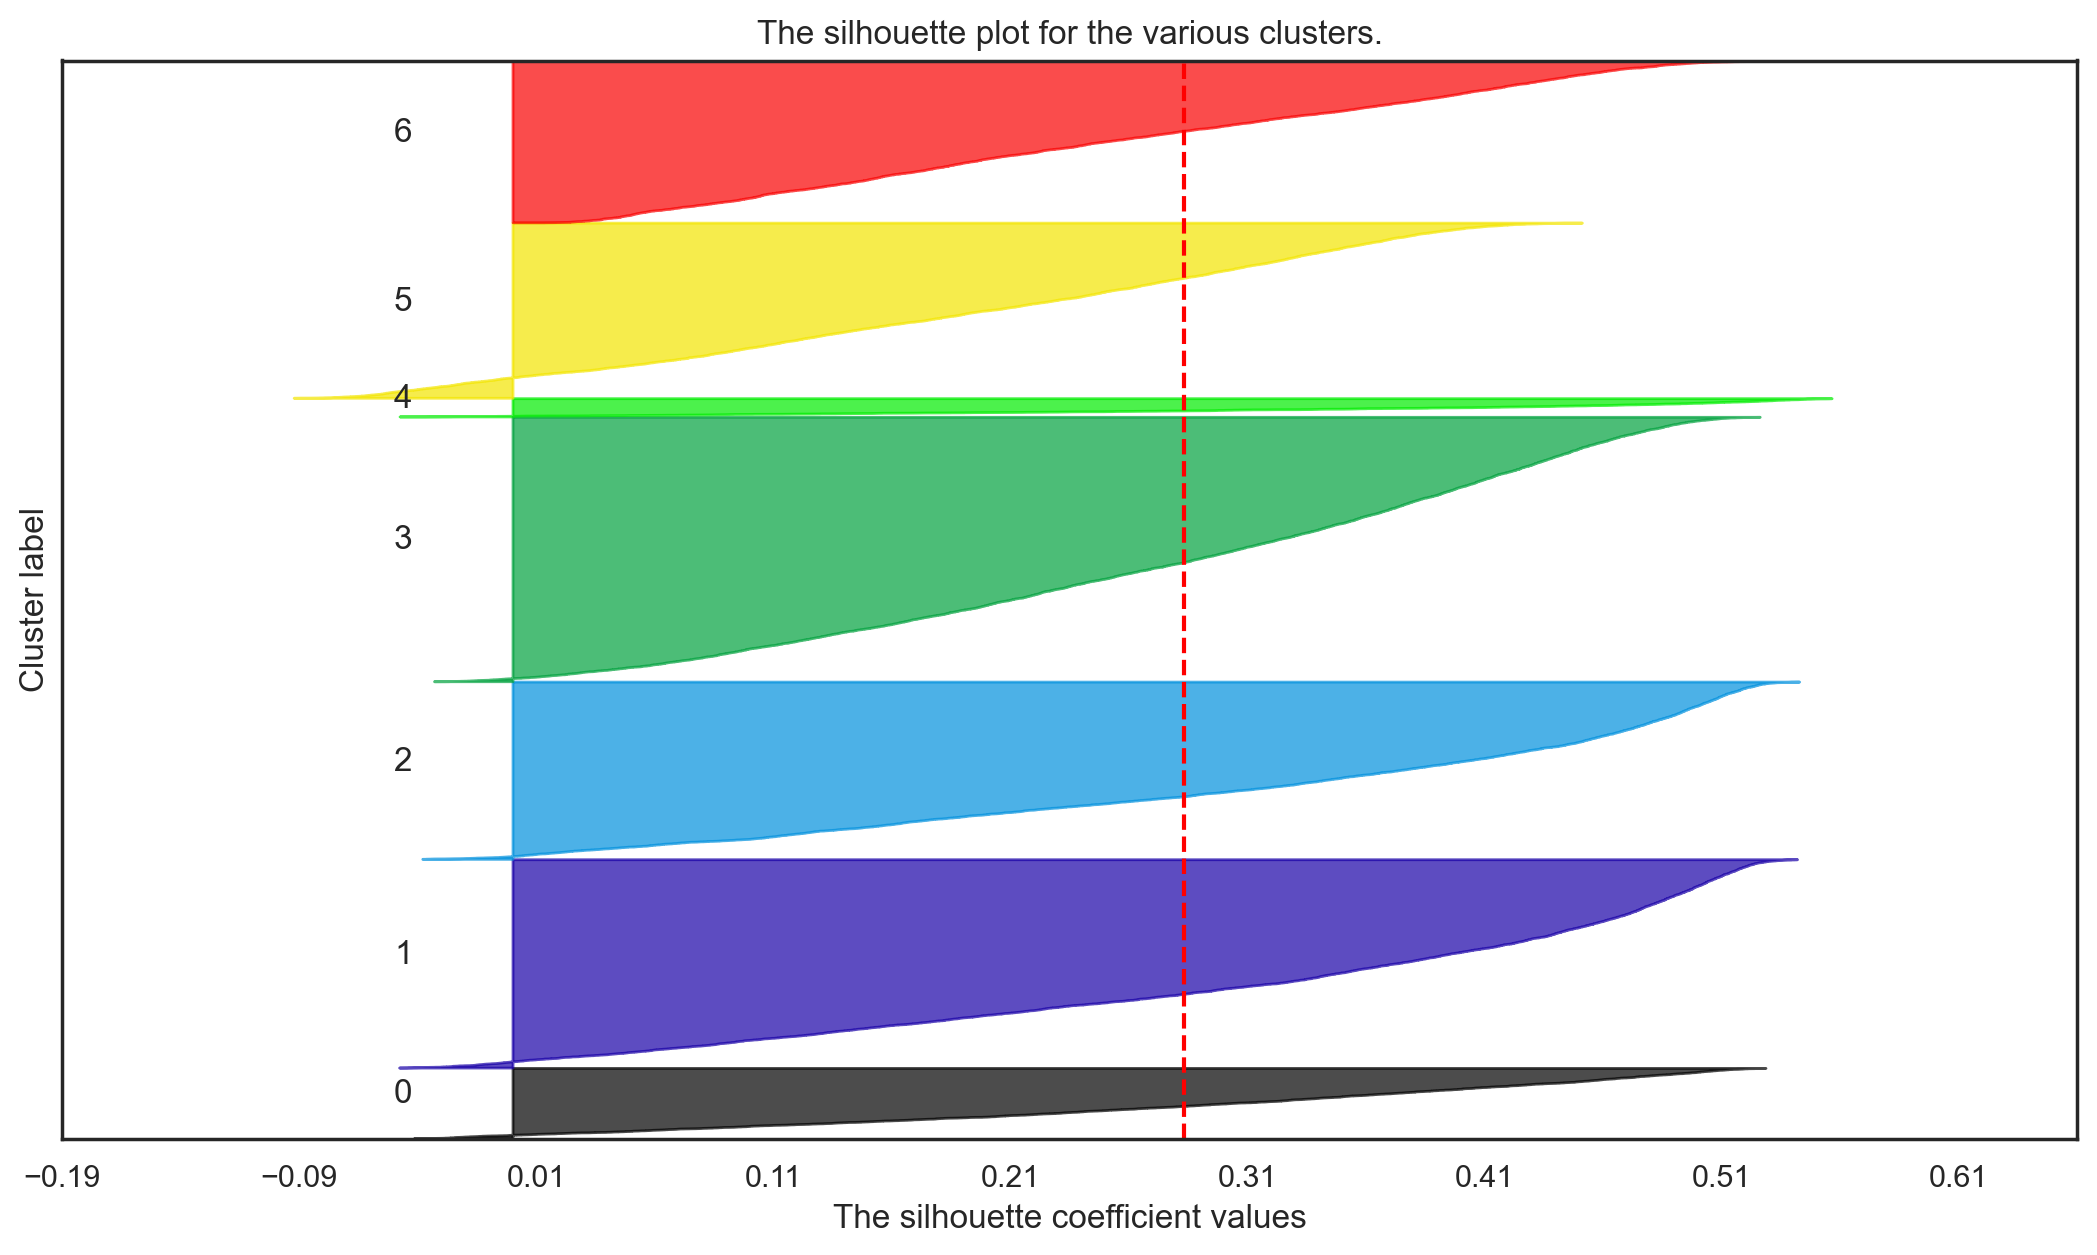

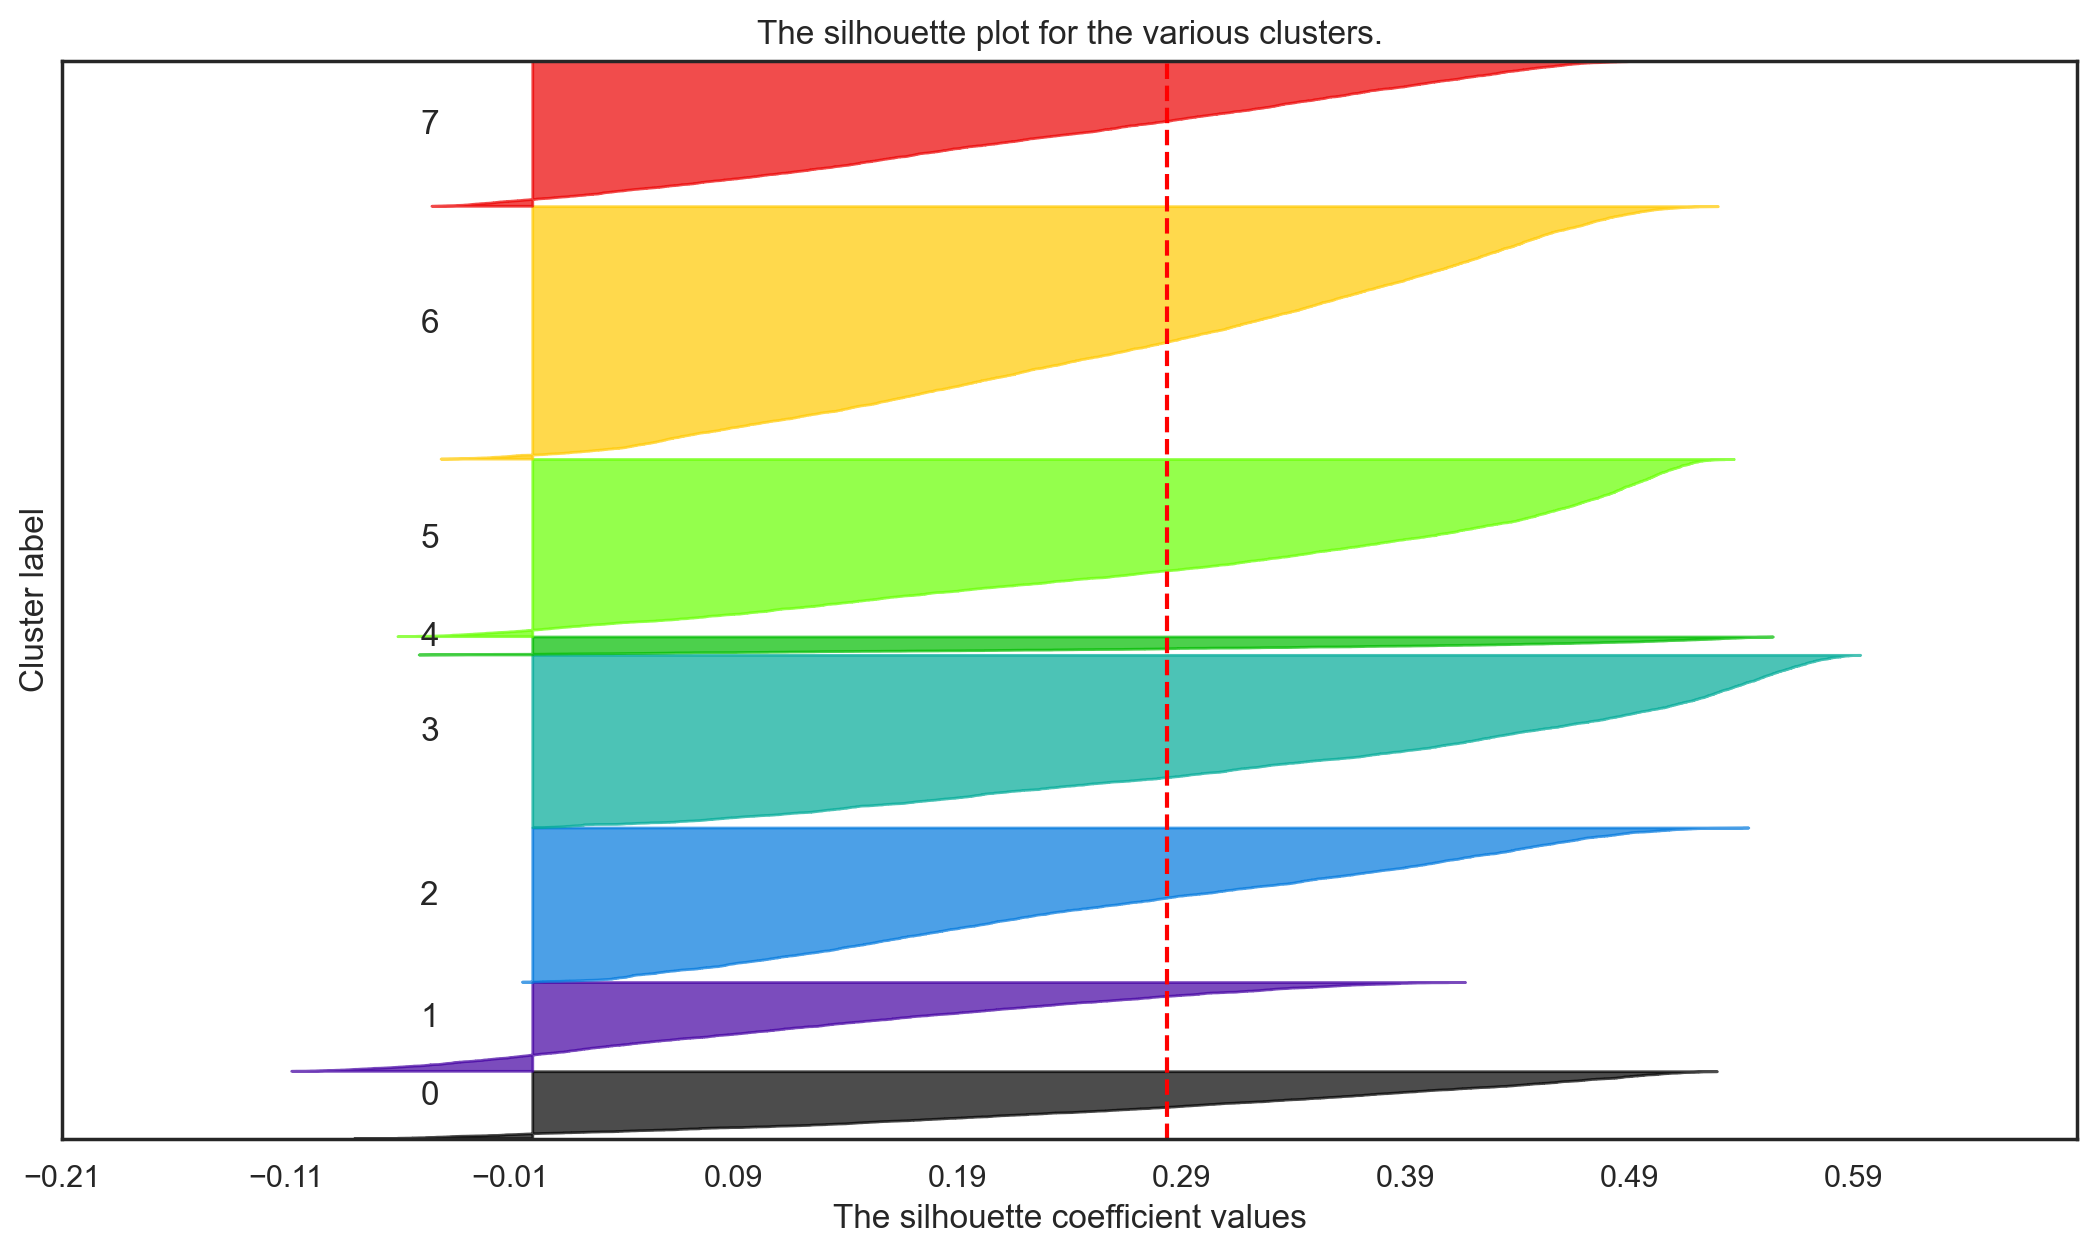

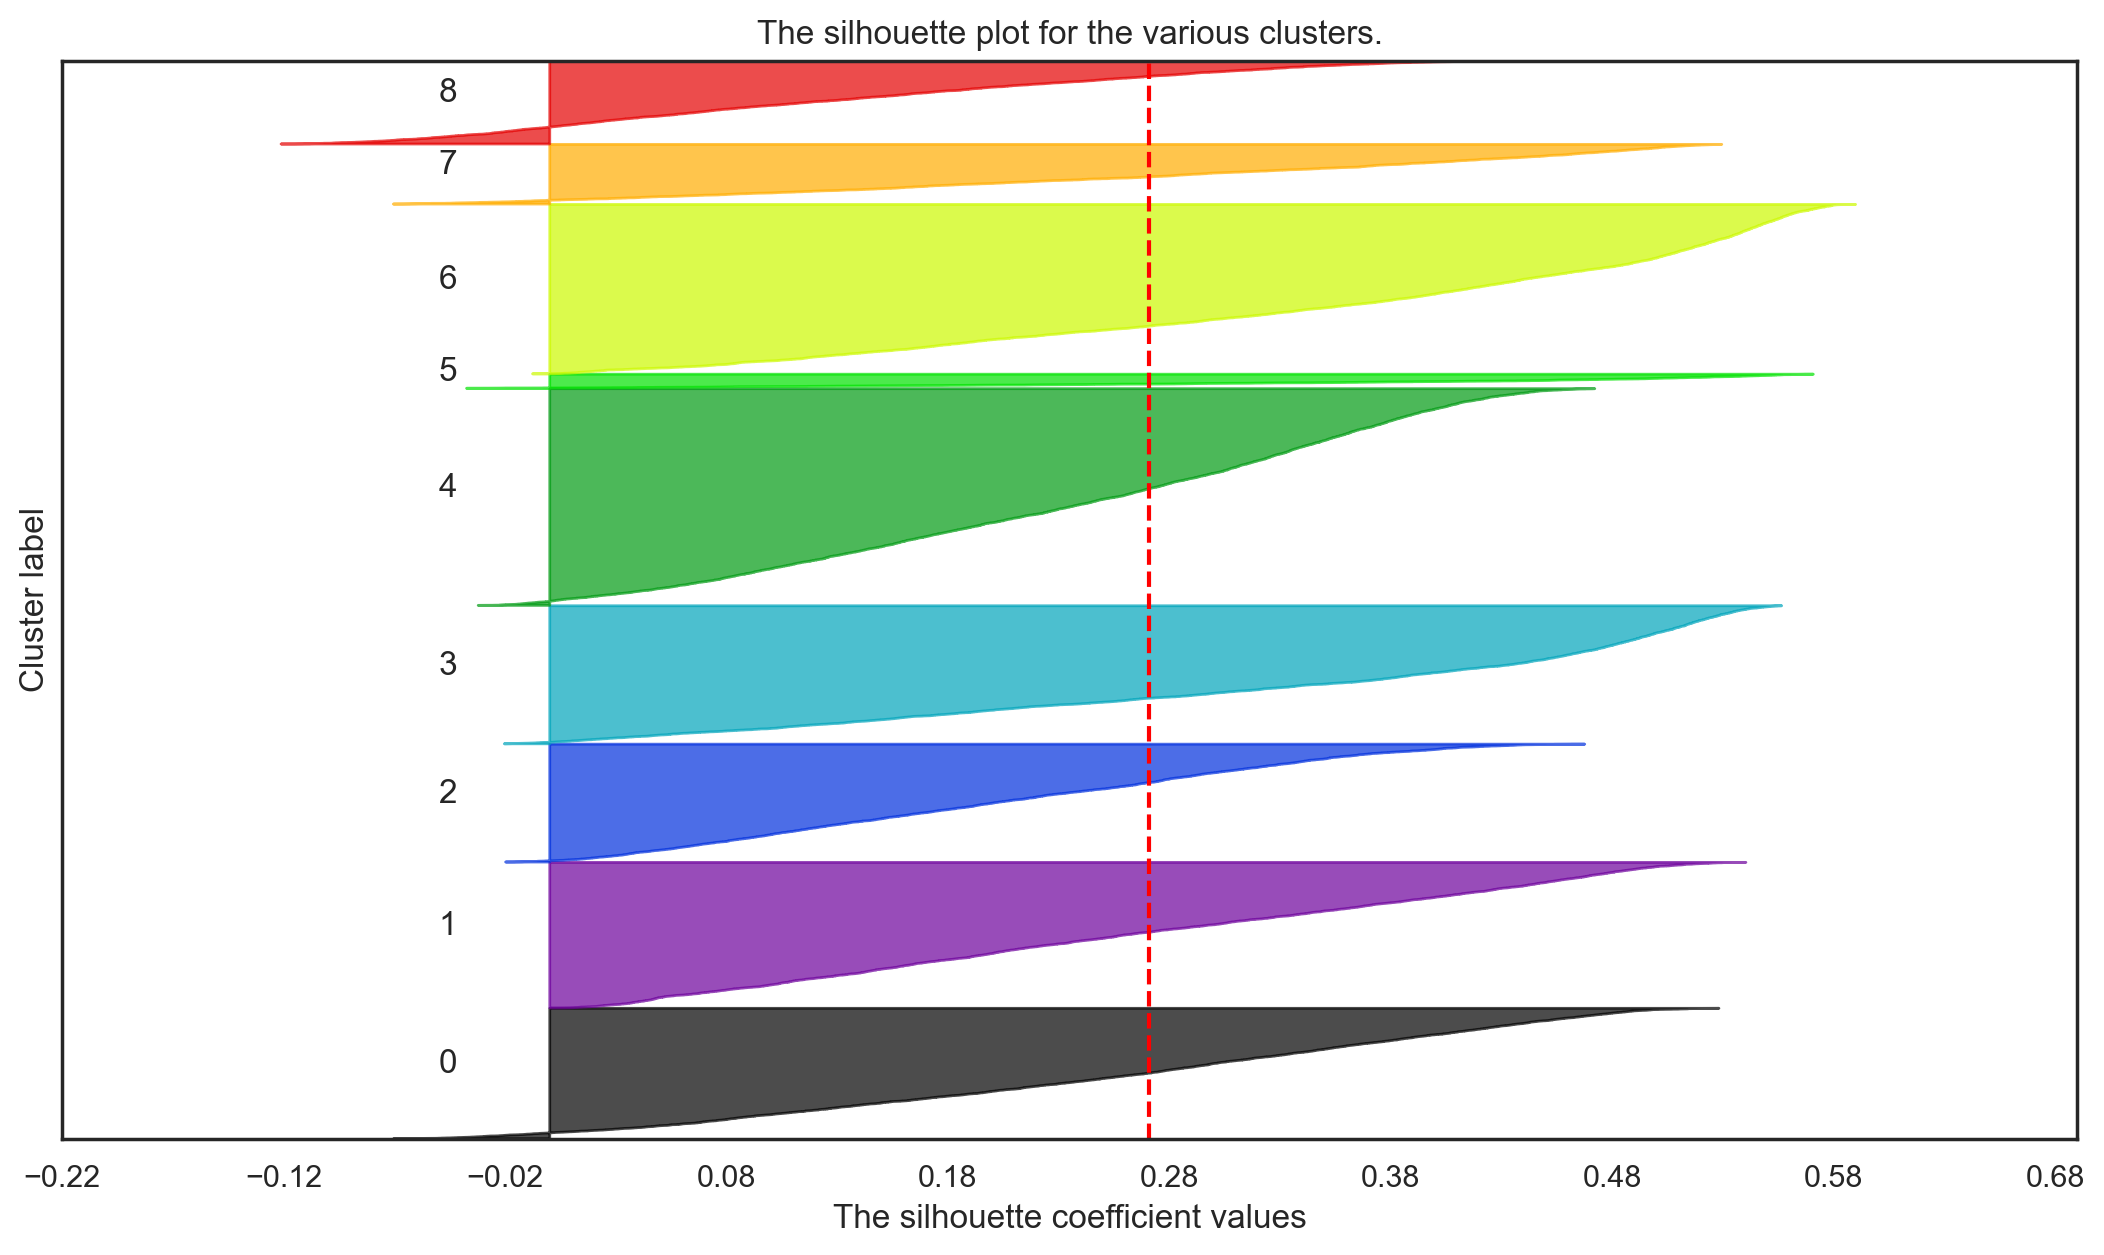

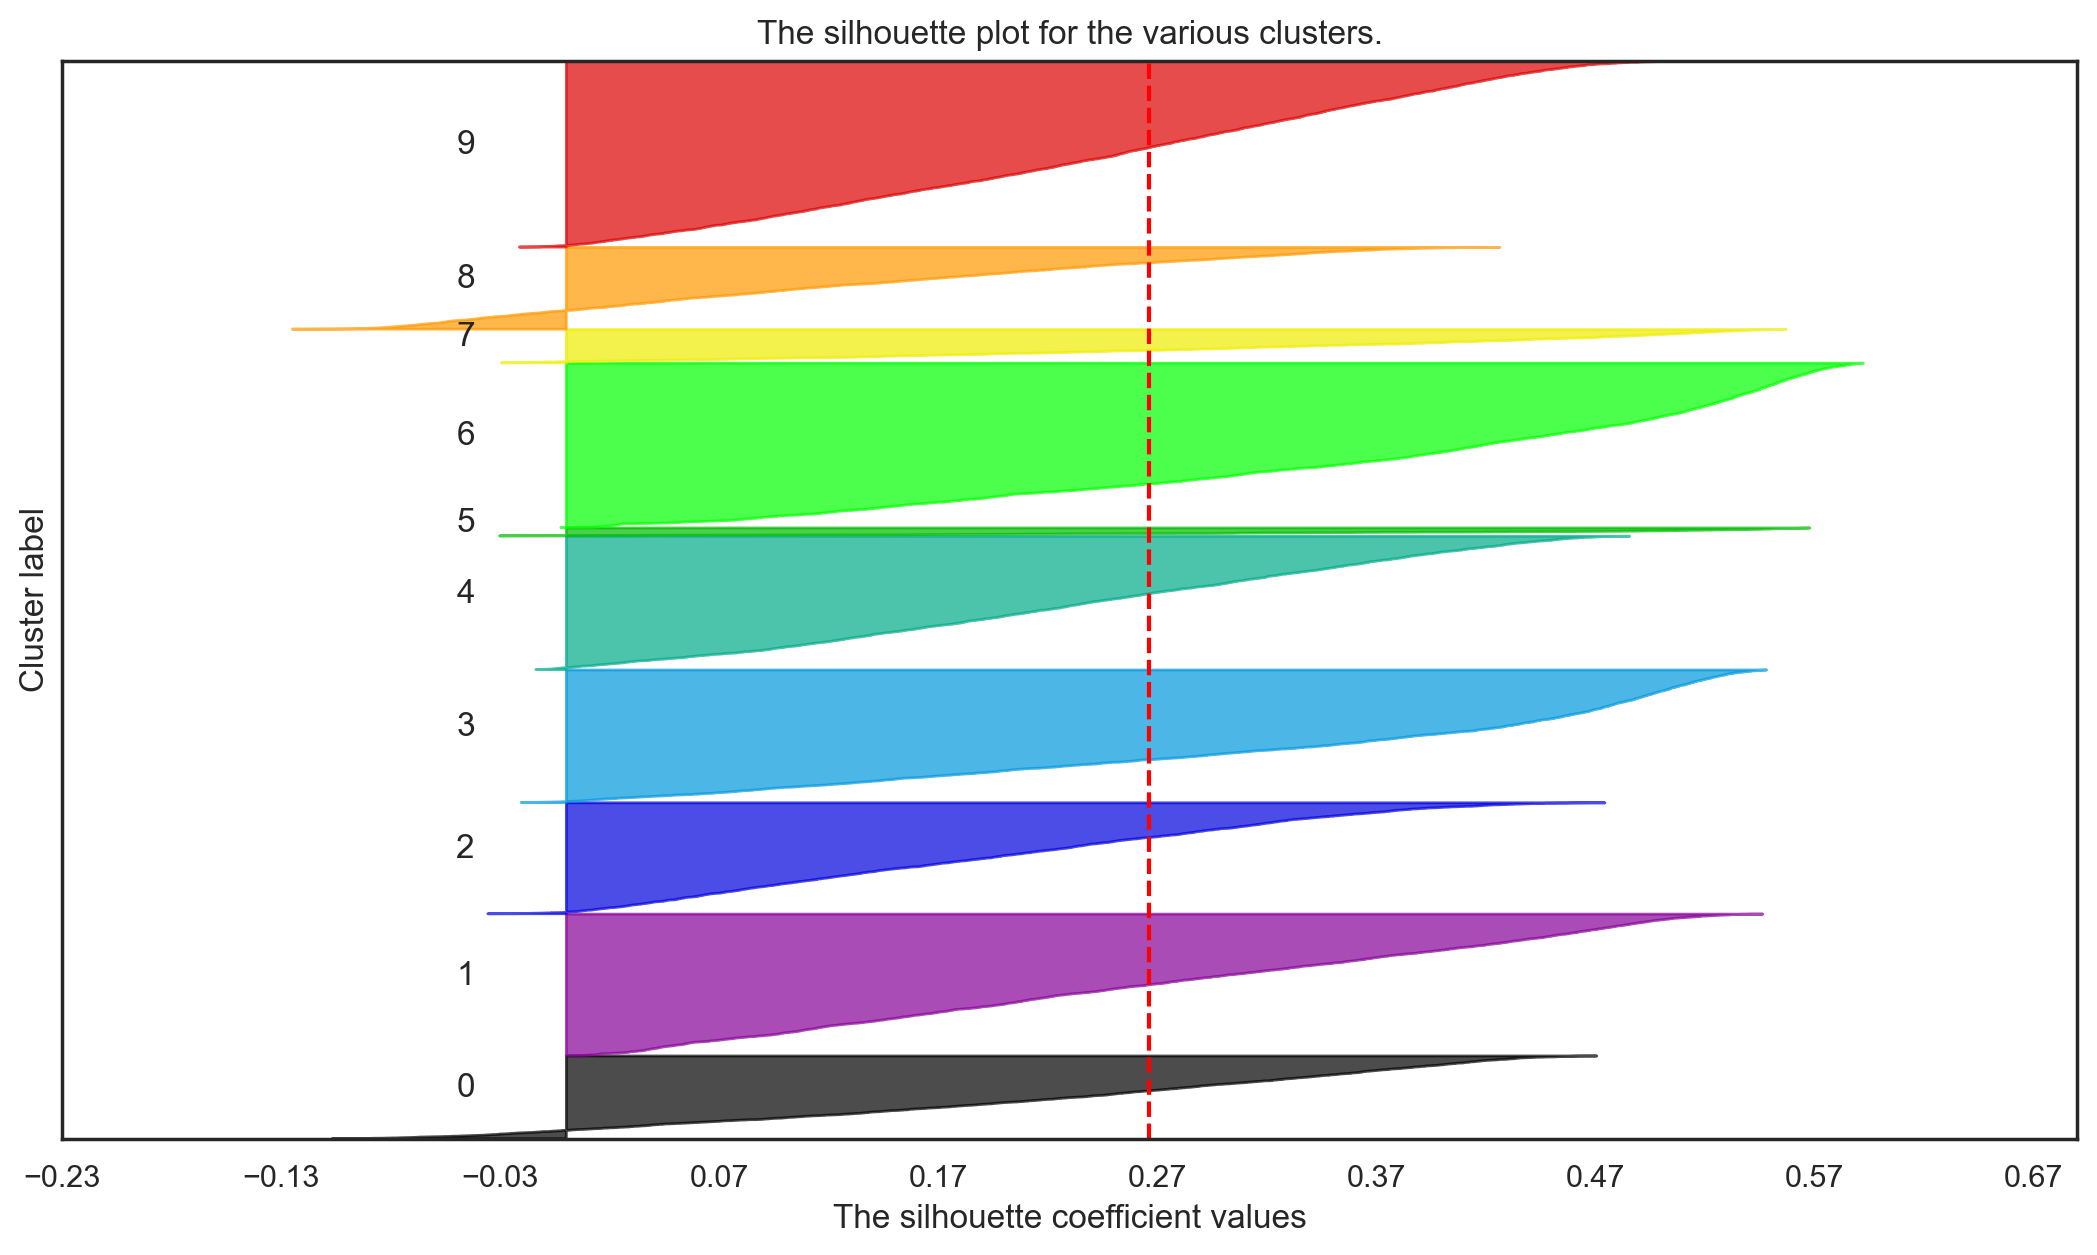

In [32]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
import matplotlib.cm as cm

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(ABCDEats[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(ABCDEats[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(ABCDEats[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(ABCDEats[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

<div class="alert alert-block alert-info" style="font-size:20px;">

- Cada **linha** no gráfico representa **um ponto de dados** -> Ordenado conforme o score ao cluster que pertence.
- A linha pontilhada é a média dos valores de silhueta para todos os pontos.

> Isto é o resultado de cada ponto e depois temos as silhouette negativas. Boa sol. se tivermos muito no positivo

</div>

---

## **📏 Clustering Evaluation/Analysis**

### **Final KMeans clustering Solution**

<div class="alert alert-block alert-danger" style="font-size:30px;">

> **Não sei ver a melhor solução de KMeans pela Silhouette Coefficient. 😩**

In [33]:
# final cluster solution
number_clusters = 5
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(ABCDEats[metric_features])
km_labels

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
# Characterizing the final clusters
df_concat = pd.concat((ABCDEats[metric_features], pd.Series(km_labels, name='labels', index=ABCDEats.index)), axis=1)
df_concat.groupby('labels').mean()

customer_age  chain_count  first_order  last_order  order_count  \
labels                                                                    
0              27.32         1.34        18.29       28.52         1.97   
1              27.51         5.10        15.75       76.85         8.23   
2              27.51         1.23        62.40       72.37         2.00   
3              27.91         7.85        10.07       81.97        14.53   
4              27.40         3.14        16.53       73.96         4.38   

        days_between_orders_per_order  CUI_Total_Amount_Spent  \
labels                                                          
0                                3.85                   17.72   
1                                9.19                   78.68   
2                                3.76                   19.50   
3                                6.16                  175.83   
4                               15.97                   26.83   

        CUI_Total_Food_Types  CUI_Avg_Amount_Spent  \
labels                                               
0                       1.54                 10.67   
1                       3.43                 13.12   
2                       1.52                 11.29   
3                       4.34                 15.59   
4                       2.61                  7.13   

        CUI_NOTAsian_Italian_OTHER_NOTSnack_PC  CUI_American_Cafe_Japanese_PC  \
labels                                                                          
0                                        -0.07                          -0.37   
1                                         0.03                           0.88   
2                                        -0.09                          -0.29   
3                                        -0.67                           3.13   
4                                         0.18                          -0.26   

        CUI_Chicken_Chinese_Noodle_PC  CUI_Healthy_NOTAmerican_PC  \
labels                                                              
0                               -0.35                        0.10   
1                                0.77                       -0.23   
2                               -0.36                        0.11   
3                                2.23                       -0.64   
4                               -0.07                        0.02   

        CUI_Indian_PC  CUI_Japanese_NOTBeverages_PC  CUI_Beverages_Thai_PC  \
labels                                                                       
0               -0.04                          0.02                   0.01   
1                0.12                         -0.06                  -0.00   
2               -0.05                          0.04                   0.00   
3                0.11                          0.09                  -0.30   
4                0.00                         -0.02                   0.02   

        Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
labels                                                                   
0         0.24    0.24     0.25       0.25      0.30    0.32      0.36   
1         1.07    1.10     1.16       1.19      1.24    1.21      1.28   
2         0.23    0.24     0.25       0.28      0.35    0.32      0.32   
3         2.00    2.01     2.05       2.12      2.13    1.99      2.22   
4         0.55    0.55     0.58       0.62      0.69    0.67      0.73   

        HR_Lunch_Dinner_PC  HR_LateNight_Breakfast_PC  HR_Evening_PC  \
labels                                                                 
0                    -0.56                      -0.52           0.14   
1                     0.96                       1.08          -0.30   
2                    -0.60                      -0.46           0.04   
3                     1.89                       3.44          -1.01   
4                     0.24                      -0.13           0.12   

        HR_AfternoonSnac

<div class="alert alert-block alert-warning" style="font-size:20px;">

### **How can we combine the 2 algorithms? (`KMeans` and `Hierarchical`)**


- **AgglomerativeClustering** is a hierarchical clustering algorithm that builds a tree of clusters.
- **KMeans** is a partitioning algorithm that clusters data points into K clusters.

**How can we combine the two?**

1. Use **HC** dendogram to find $k$ (number of clusters). Then use KM with this $k$. **[Mas o prof. não gosta muito]**
2. Use **KM** with a large $k$. Use **HC** to find $k$ menor!

> We can use the **Hierarchical Clustering** to determine the number of clusters and then use **KMeans** to cluster the data points into those clusters.

</div>


In [35]:
# Absolute and Relative Frequency of the clusters [K-Means - Final Solution]
cluster_counts = df_concat['labels'].value_counts().sort_index()
cluster_freq = df_concat['labels'].value_counts(normalize=True).sort_index()

# Create a DataFrame with the absolute and relative frequency of the clusters
cluster_freq_df = pd.concat([cluster_counts, cluster_freq], axis=1)
cluster_freq_df.columns = ['n', '%']
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

n    %
Cluster           
0        7408 0.24
1        4805 0.15
2        8149 0.26
3        1092 0.03
4        9825 0.31

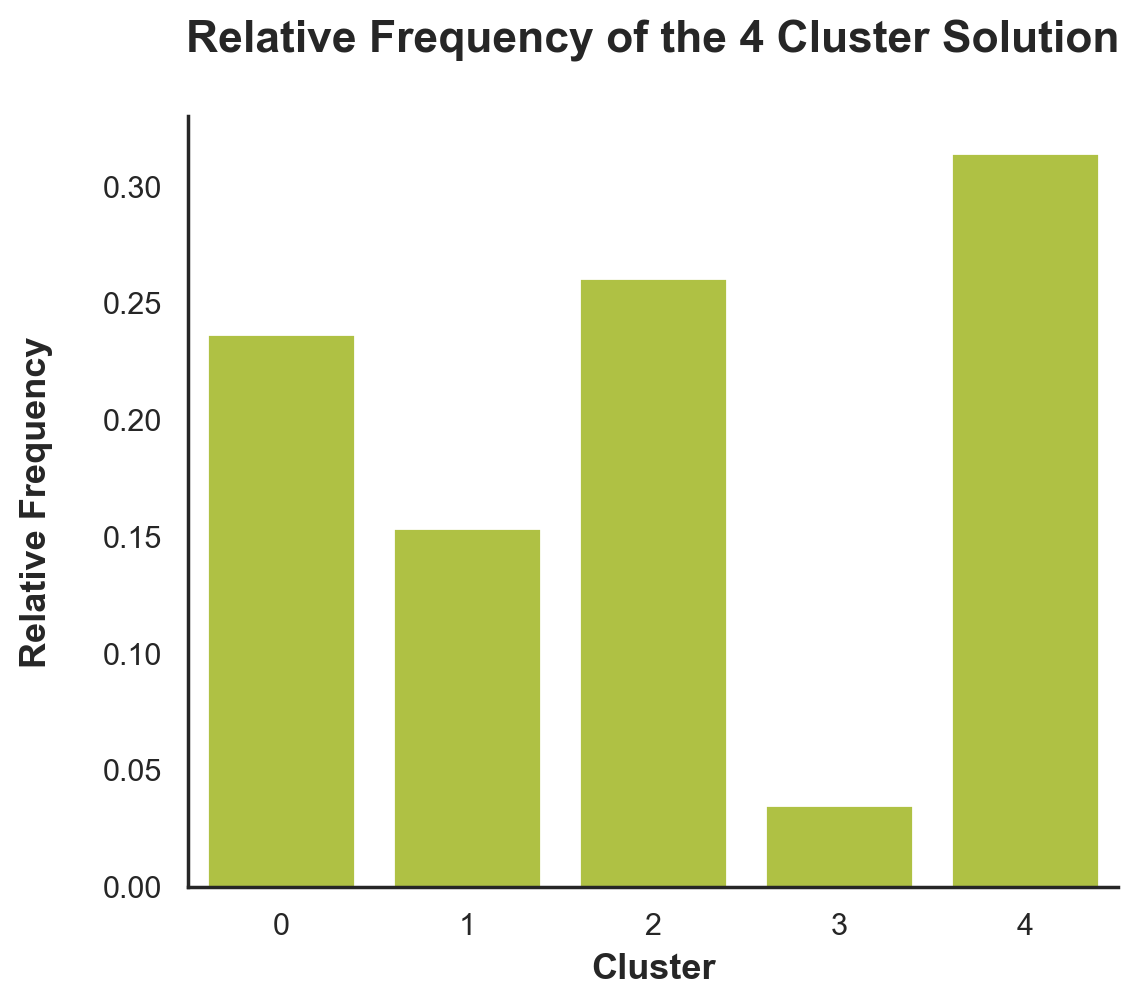

In [36]:
# Barplot of the Relative Frequency [K-Means - Final Solution]
fig = plt.figure(figsize=(6,5))

sns.barplot(x=cluster_freq_df.index, y=cluster_freq_df['%'], color=NOVAIMS_palette_colors[0])
plt.xlabel('Cluster', fontsize=13, fontweight='bold')
plt.ylabel('Relative Frequency\n', fontsize=13, fontweight='bold')
plt.title('Relative Frequency of the 4 Cluster Solution\n', fontsize=16, fontweight='bold')
sns.despine(right=True, top=True)
plt.savefig('./Clustering_Outputs/KMeans_Relative_Frequency.png', dpi=300, bbox_inches='tight')
plt.show()

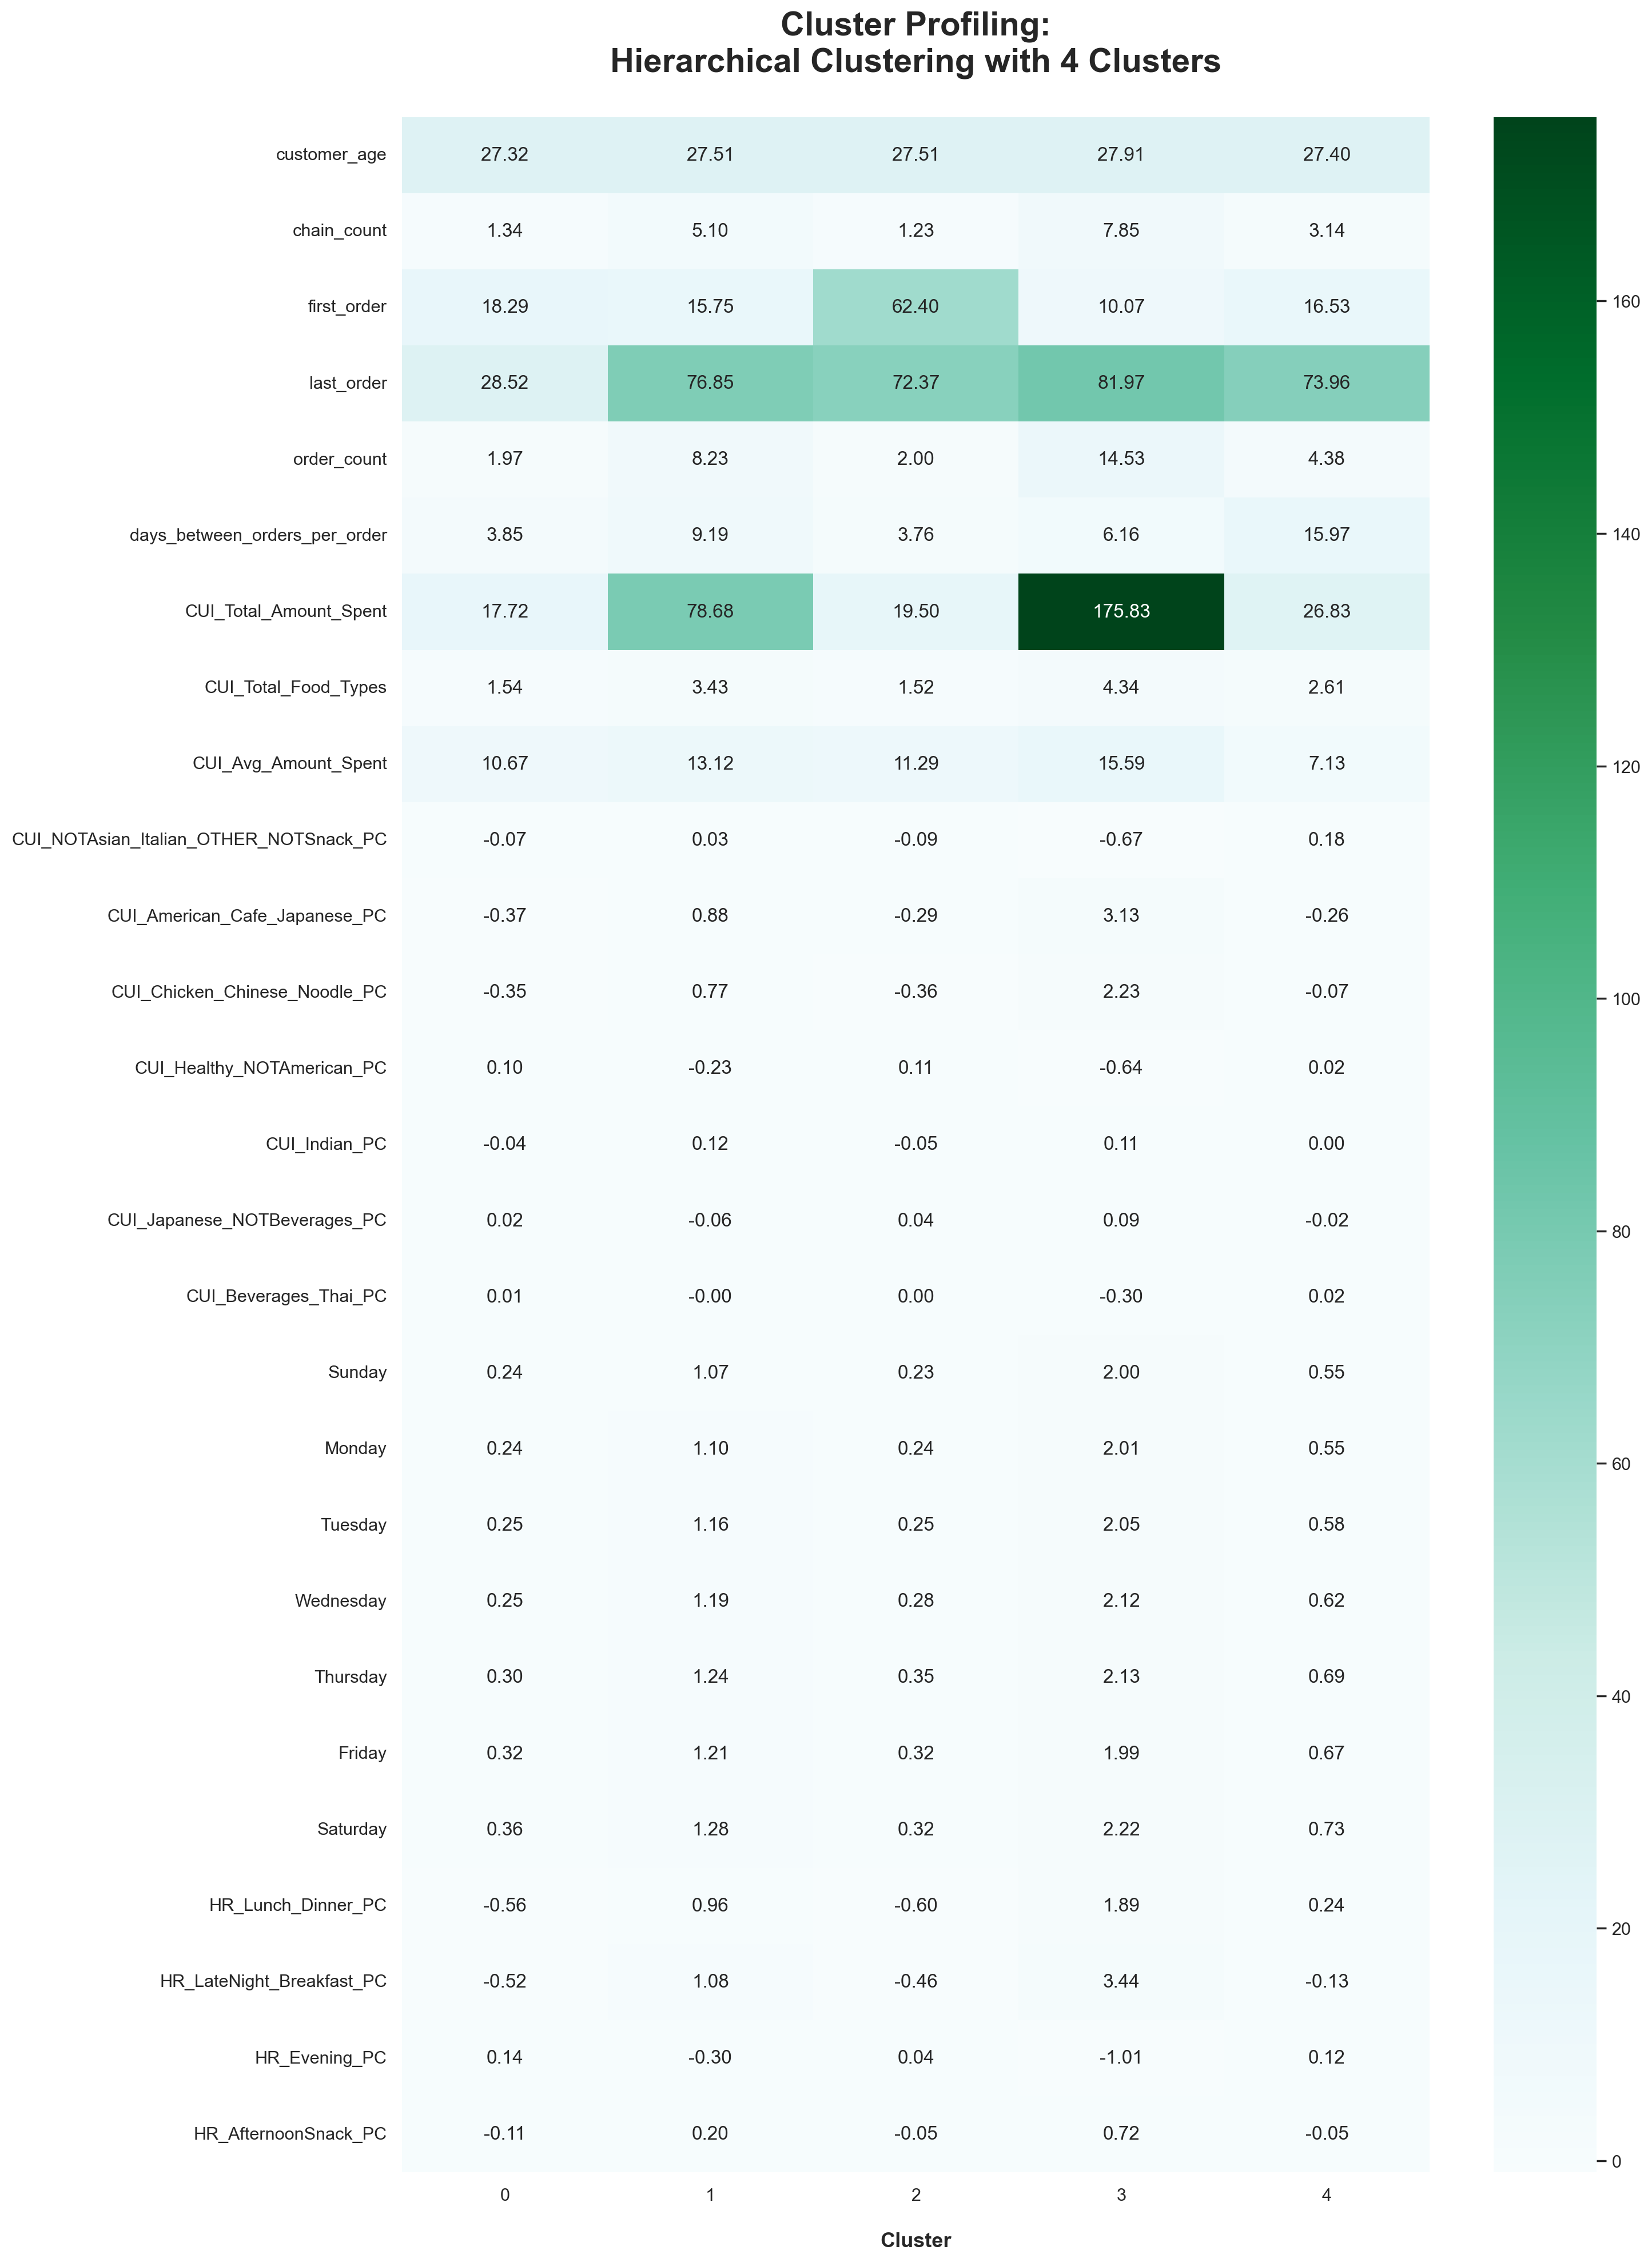

In [37]:
#### Visualize the cluster means as a heatmap to the population means. 
# Explain these values for the population means.
fig, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(df_concat.groupby('labels').mean().T, cmap="BuGn", annot=True, fmt=".2f", ax=ax)

# Finalize the plot
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('\nCluster', fontsize=13, fontweight='bold')
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 4 Clusters\n", fontsize=21, fontweight='bold')

plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_Cluster_Profiling.png', dpi=300, bbox_inches='tight')
plt.show()

---

# **👀 Different Perspectives**

In [38]:
# List of variables in different perspectives
value_vars = ['CUI_Total_Amount_Spent', 'CUI_Total_Food_Types', 'CUI_Avg_Amount_Spent', 
              'order_count', 
              'days_between_orders_per_order', 
              'chain_count']
behavior_vars = ['customer_age',
                 'first_order', 'last_order',
                 
                 'CUI_NOTAsian_Italian_OTHER_NOTSnack_PC', 'CUI_American_Cafe_Japanese_PC', 
                 'CUI_Chicken_Chinese_Noodle_PC', 'CUI_Healthy_NOTAmerican_PC', 
                 'CUI_Indian_PC', 'CUI_Japanese_NOTBeverages_PC', 'CUI_Beverages_Thai_PC',
                 
                 'HR_Lunch_Dinner_PC', 'HR_LateNight_Breakfast_PC', 'HR_Evening_PC', 'HR_AfternoonSnack_PC',
                 
                 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

## **1. Value-Based Segmentation**

In [39]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(ABCDEats[value_vars])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

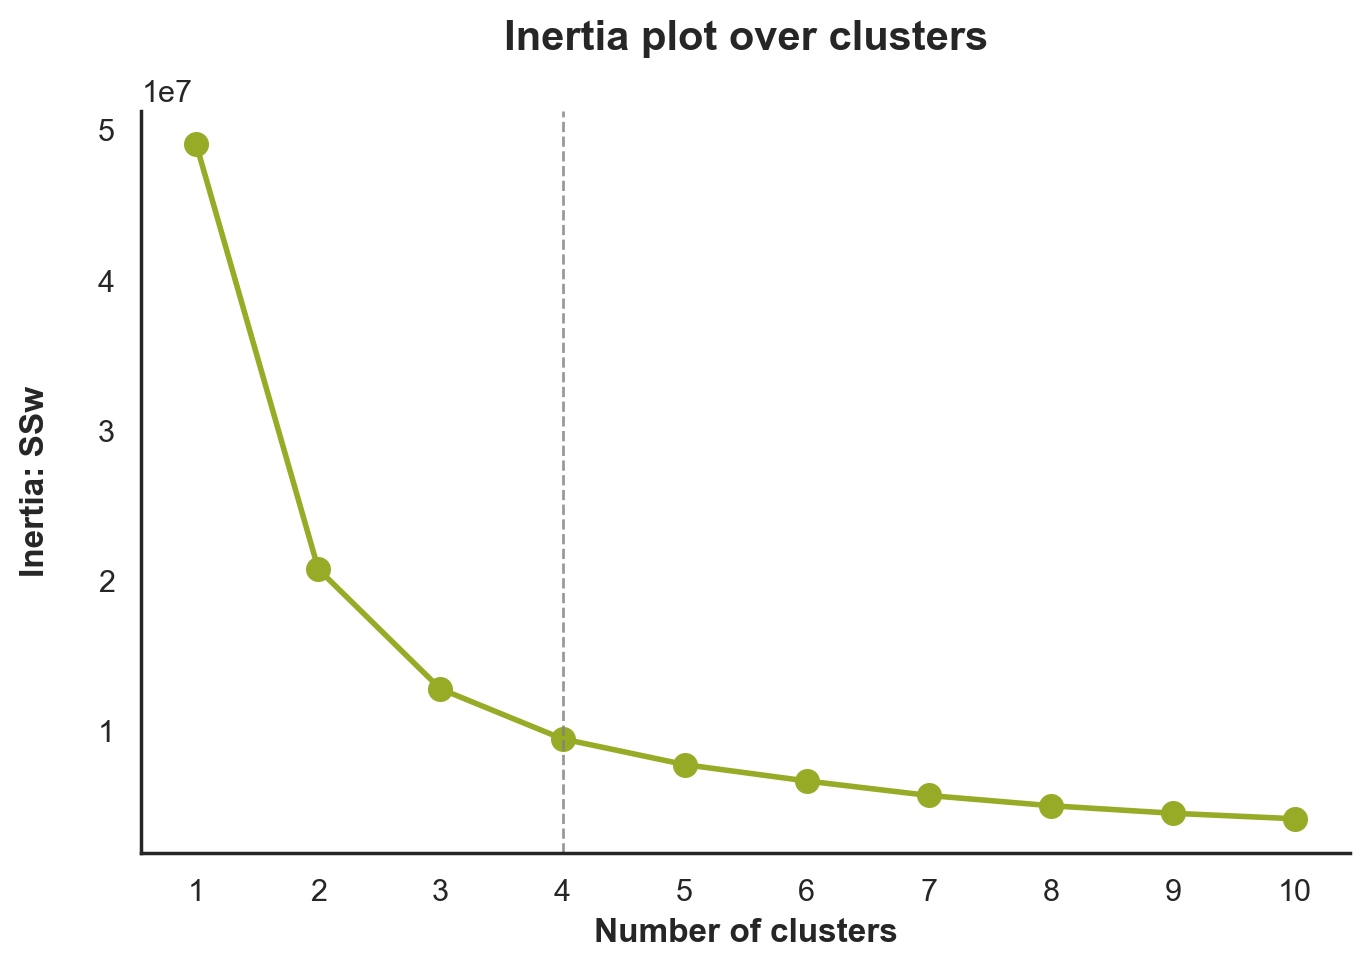

In [40]:
# Inertia Plot
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(range_clusters, inertia, marker='o', color = NOVAIMS_palette_colors[1], linewidth=2, markersize=8)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw\n", size=12, weight='bold')
ax.set_xlabel("Number of clusters", size=12, weight='bold')
ax.set_title("Inertia plot over clusters\n", size=15, weight='bold')

# Add the number of clusters chosen
ax.axvline(x=4, color='grey', linestyle='--', linewidth=1, alpha=0.8)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_Inertia_Plot_ValueBasedSegmentation.png', dpi=300, bbox_inches='tight')
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.6719109596579669
For n_clusters = 3, the average silhouette_score is : 0.5523255894458917
For n_clusters = 4, the average silhouette_score is : 0.4337059837972966
For n_clusters = 5, the average silhouette_score is : 0.3709777535682544
For n_clusters = 6, the average silhouette_score is : 0.3337403048497175
For n_clusters = 7, the average silhouette_score is : 0.3354214027998395
For n_clusters = 8, the average silhouette_score is : 0.3513272920315832
For n_clusters = 9, the average silhouette_score is : 0.35191789632075315
For n_clusters = 10, the average silhouette_score is : 0.34523971243681123


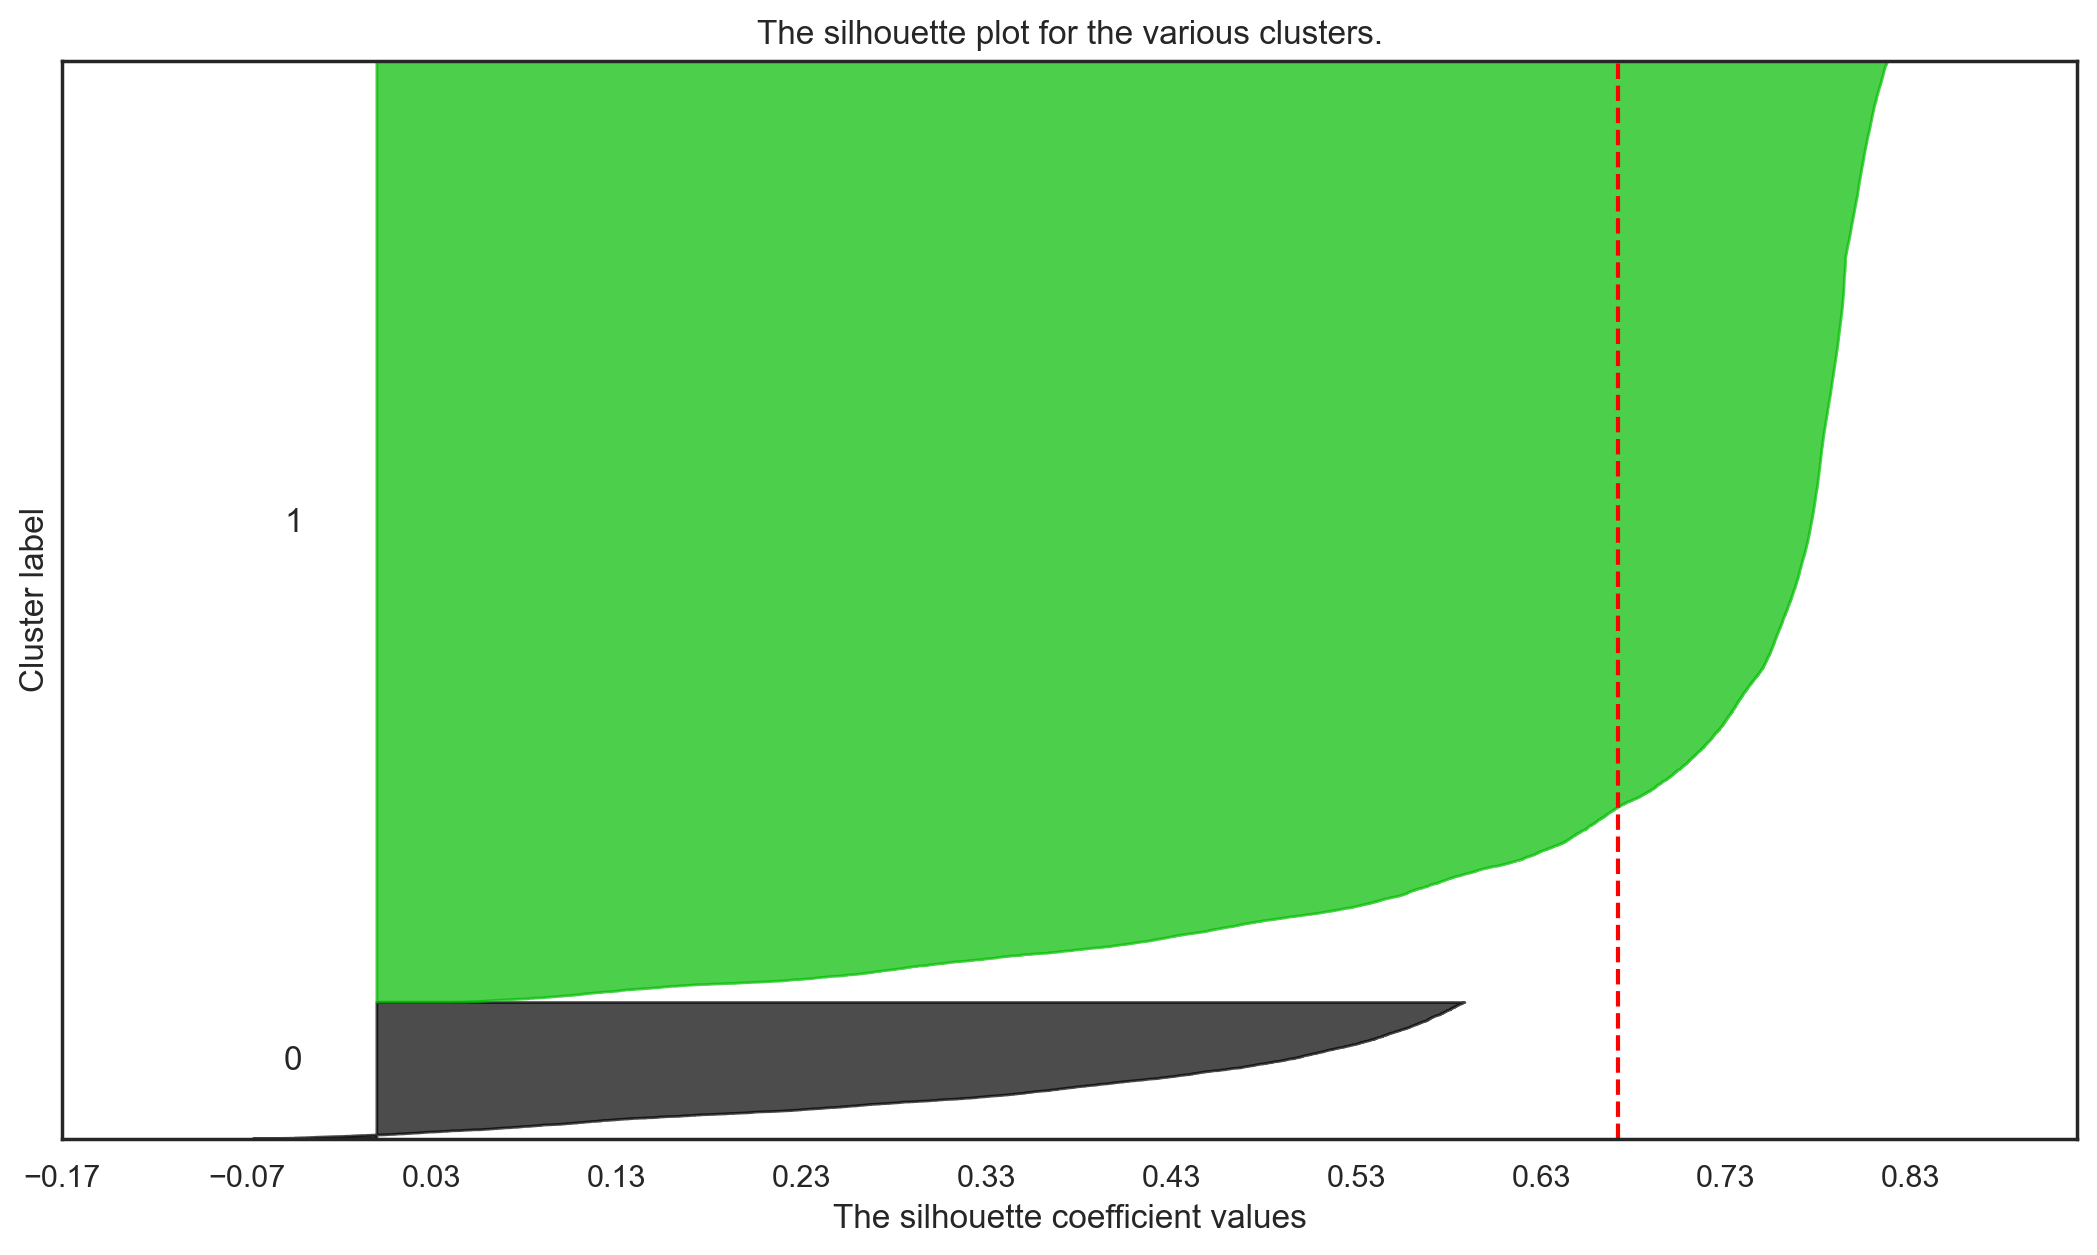

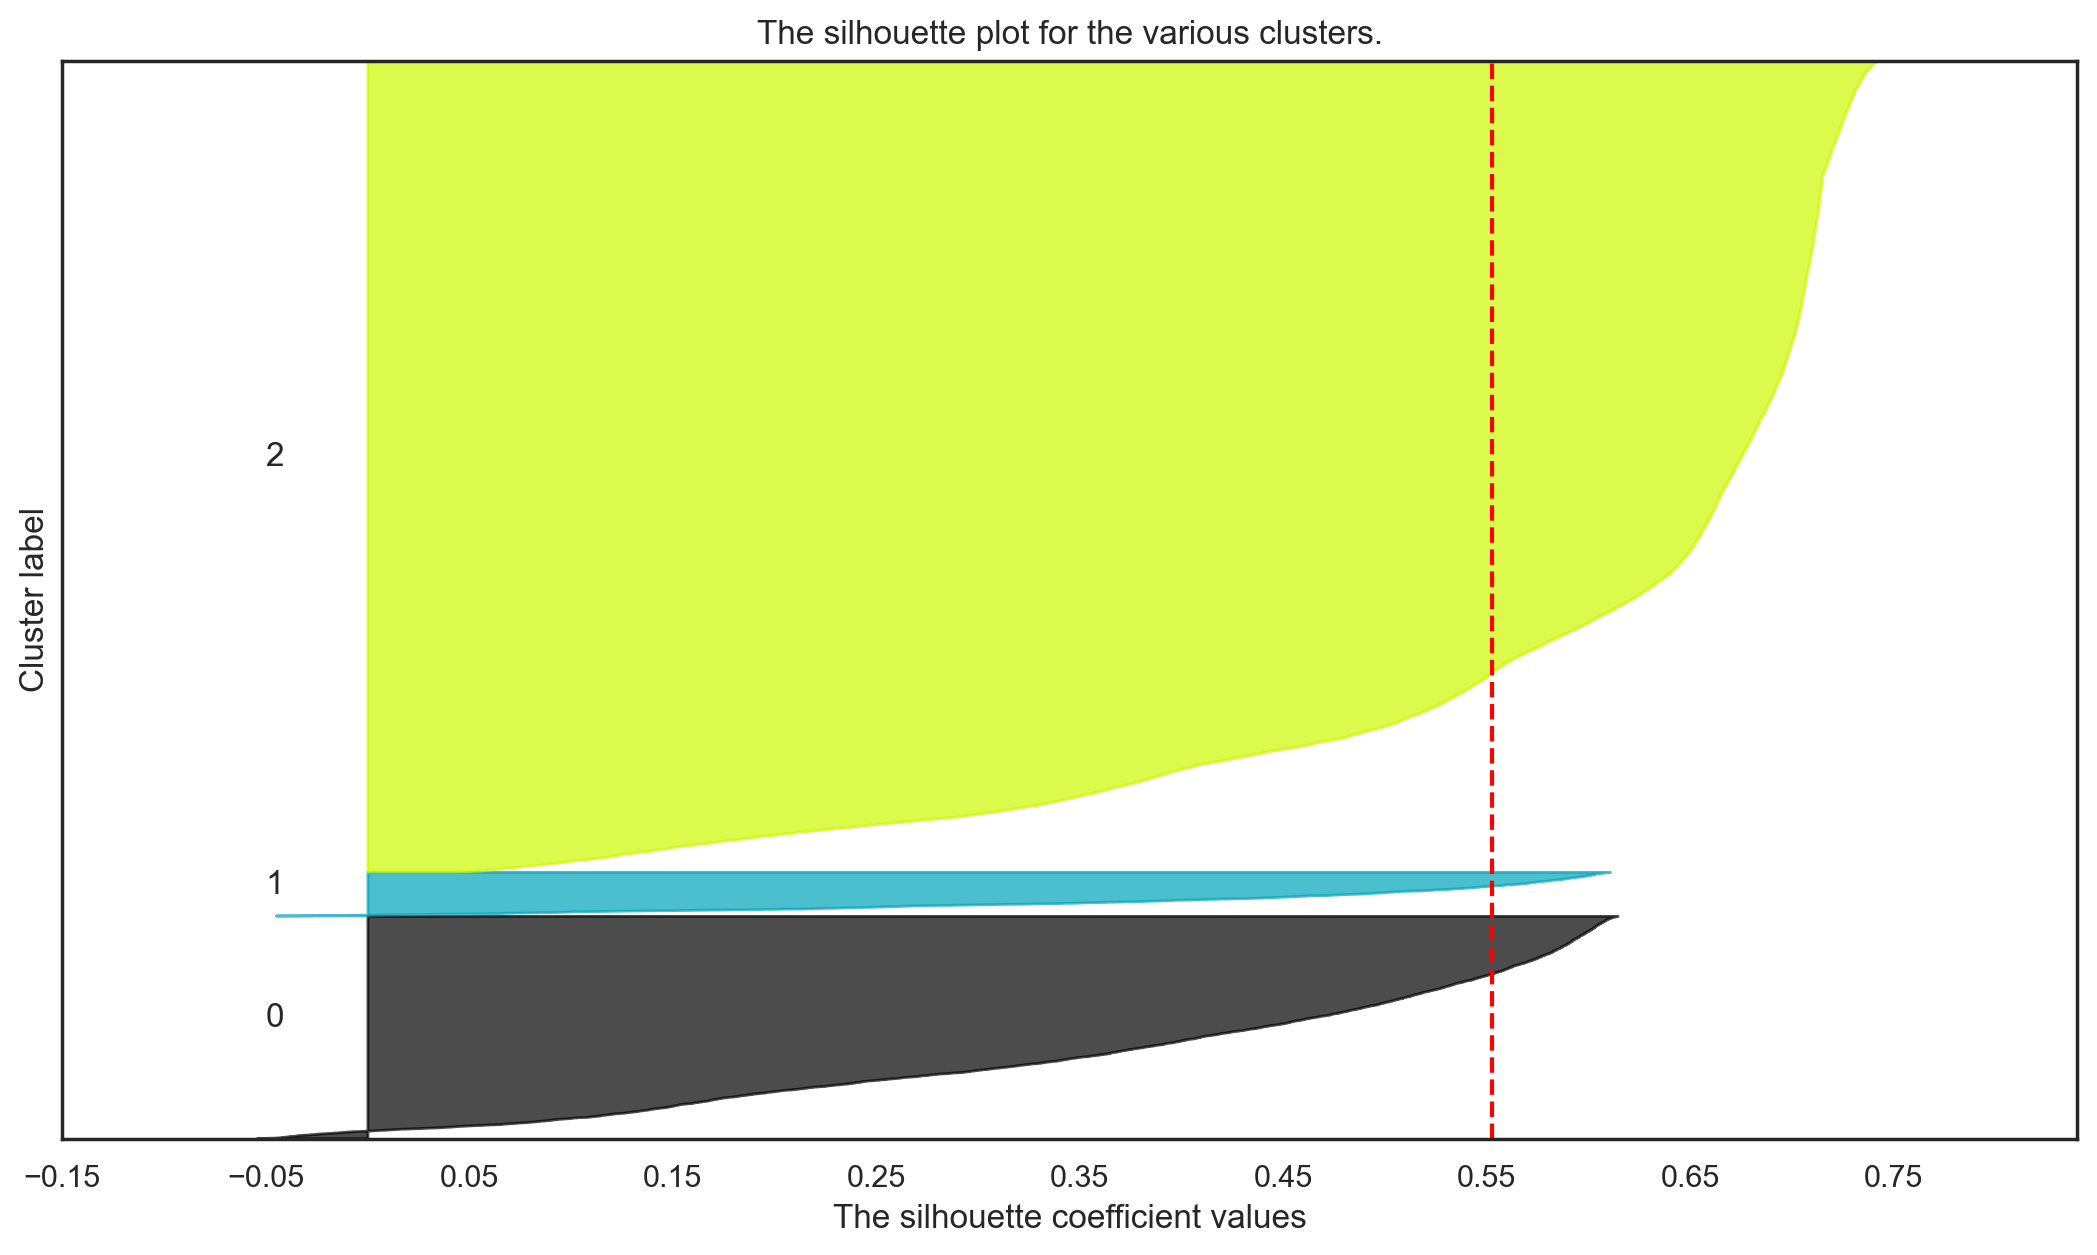

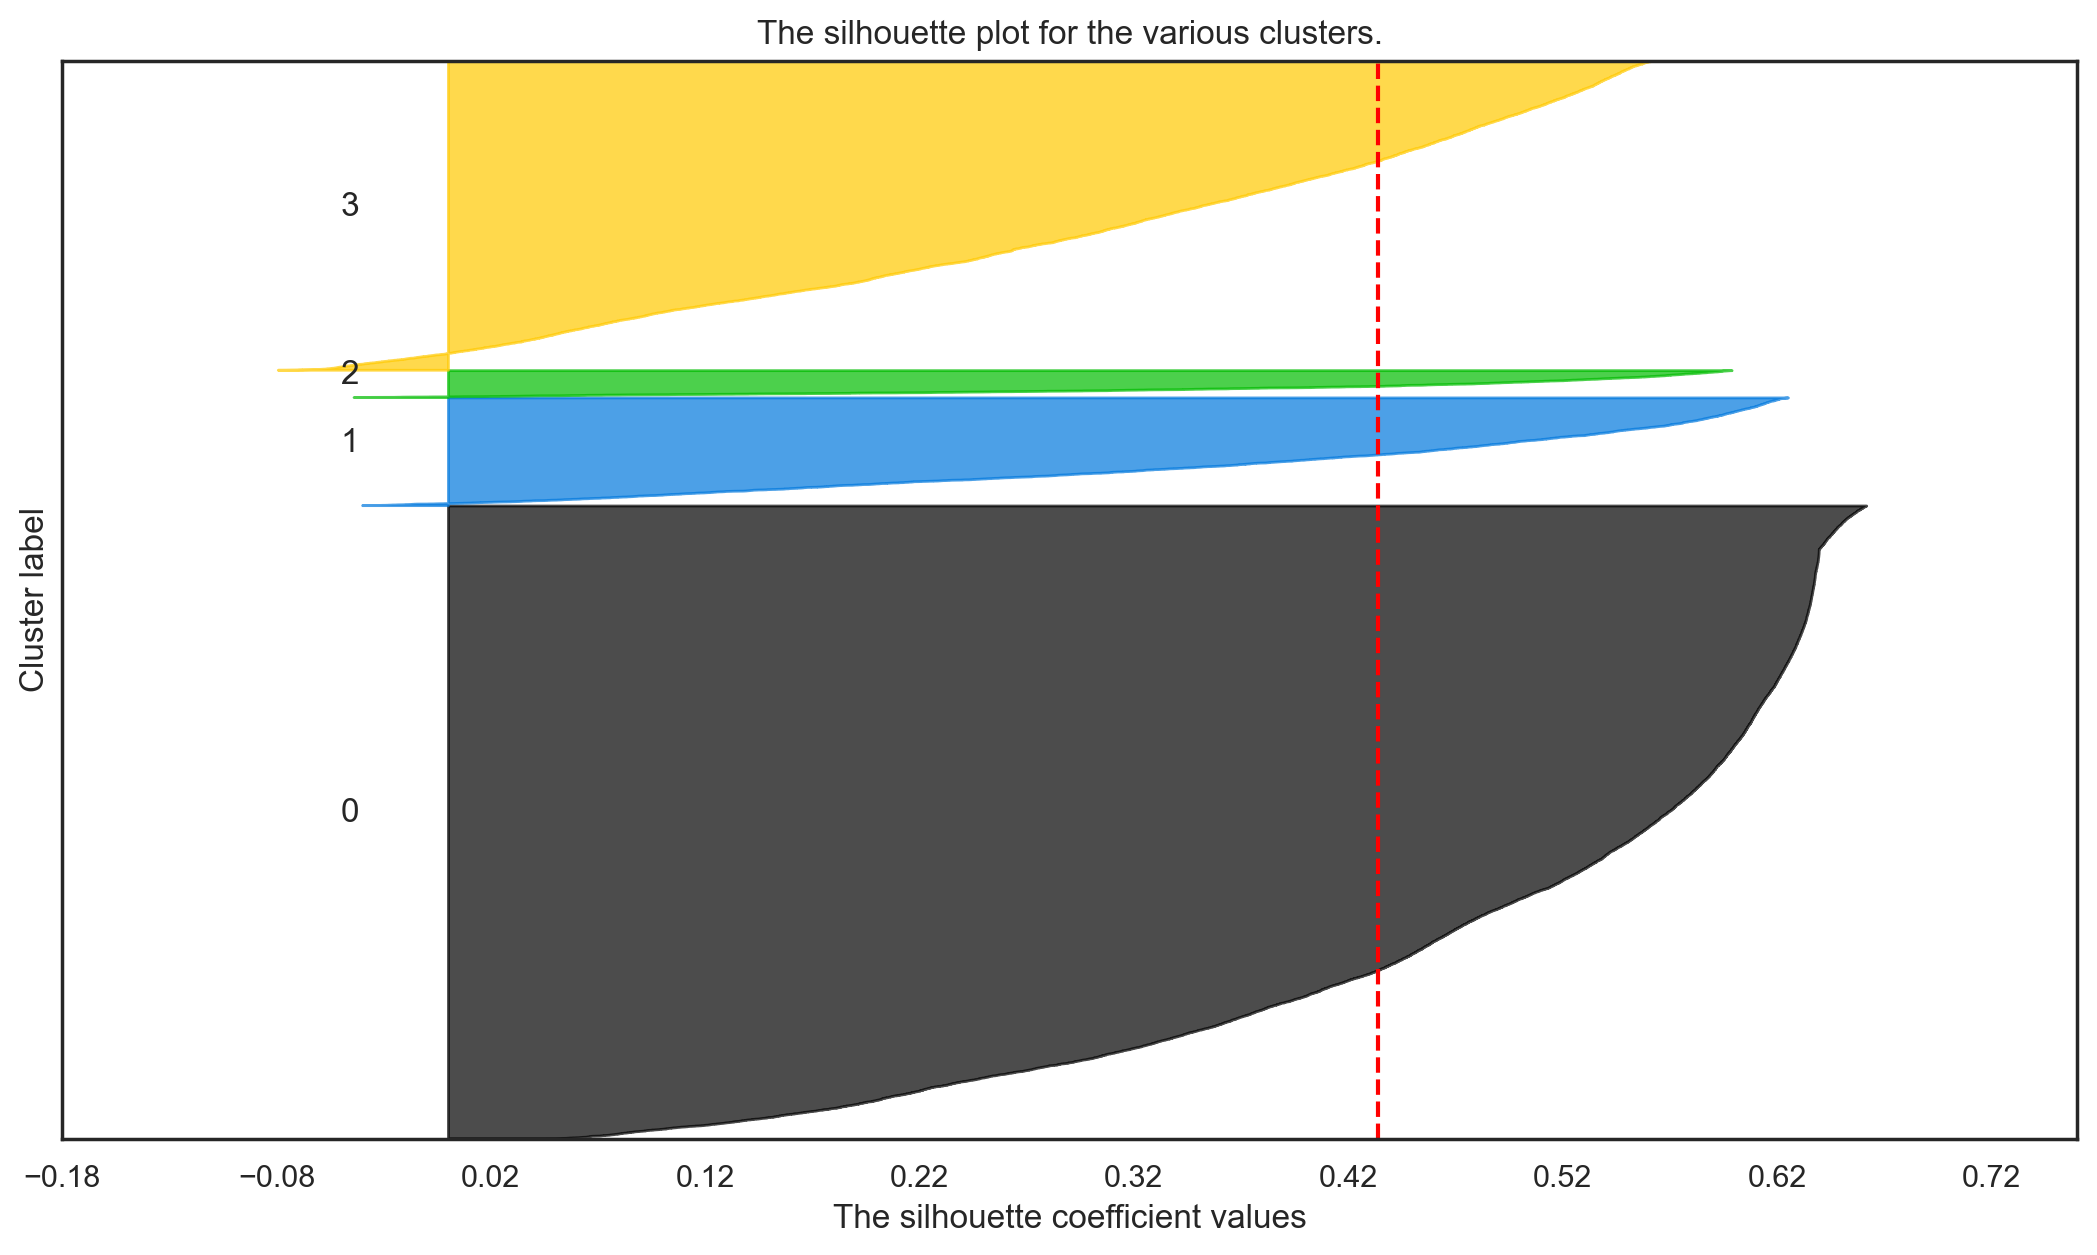

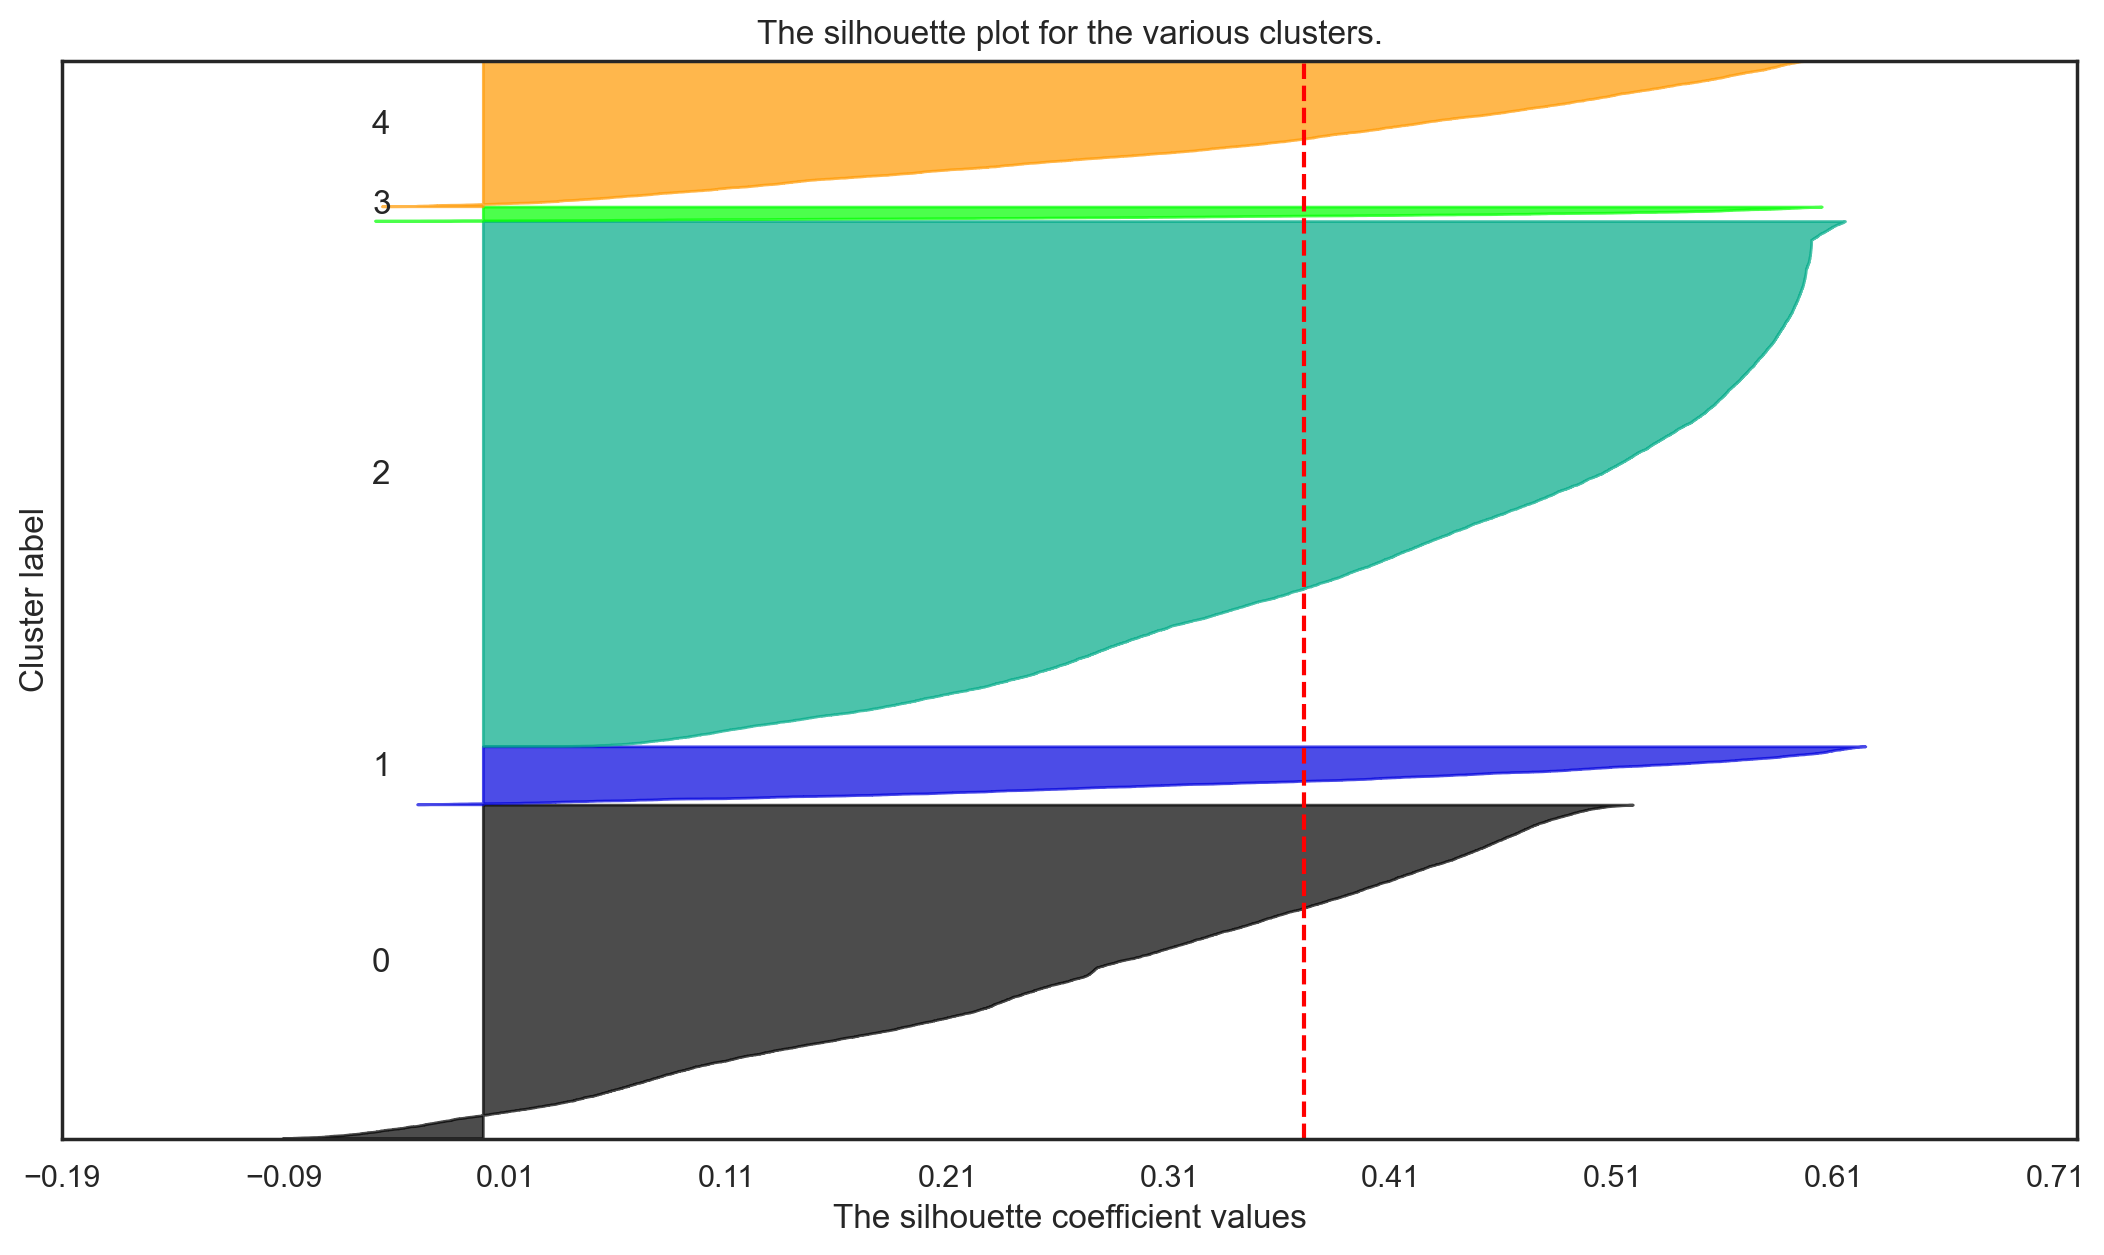

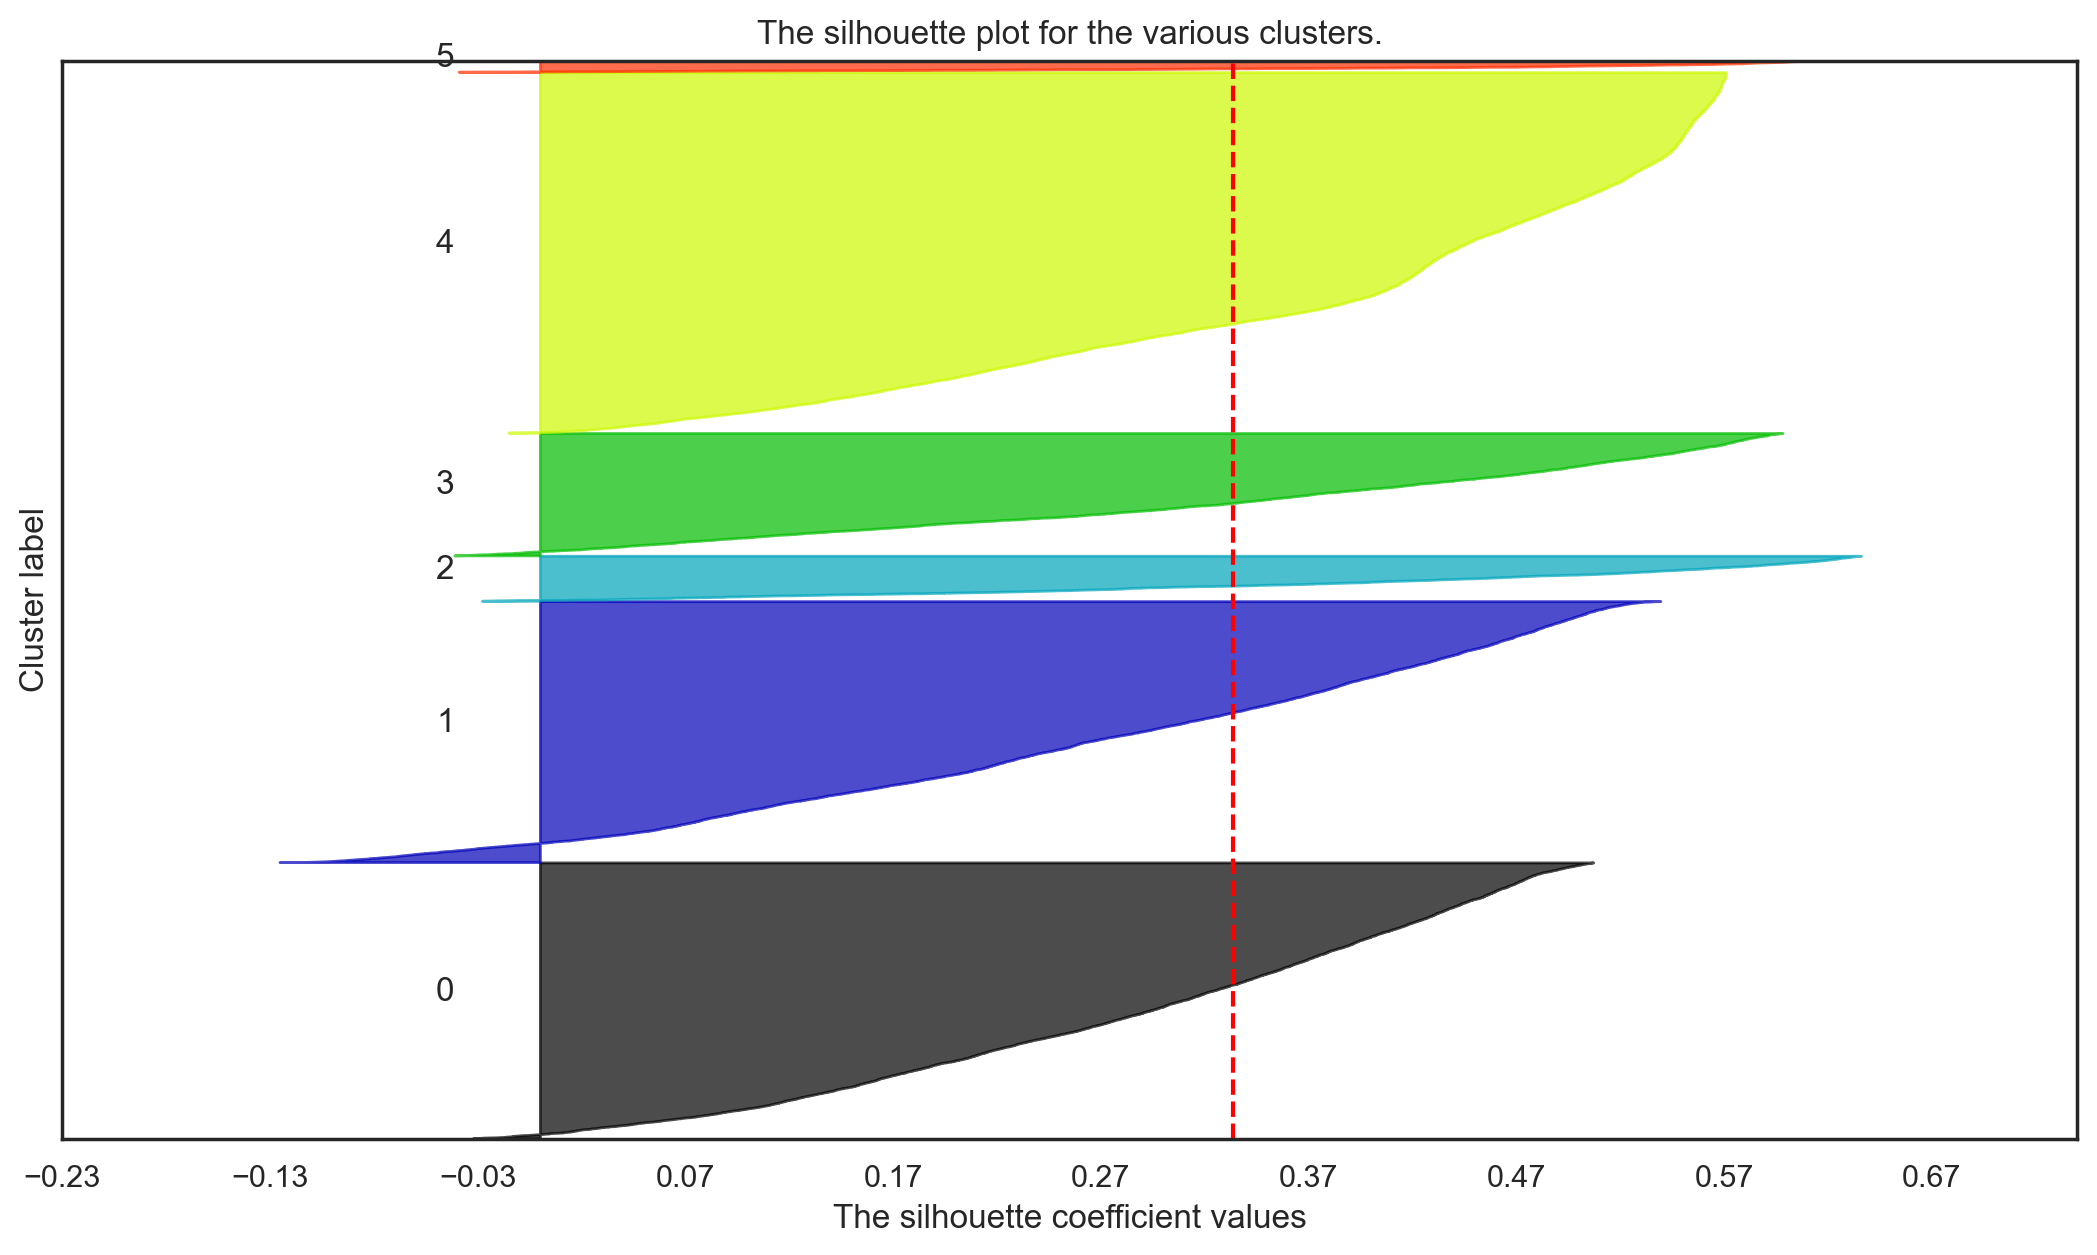

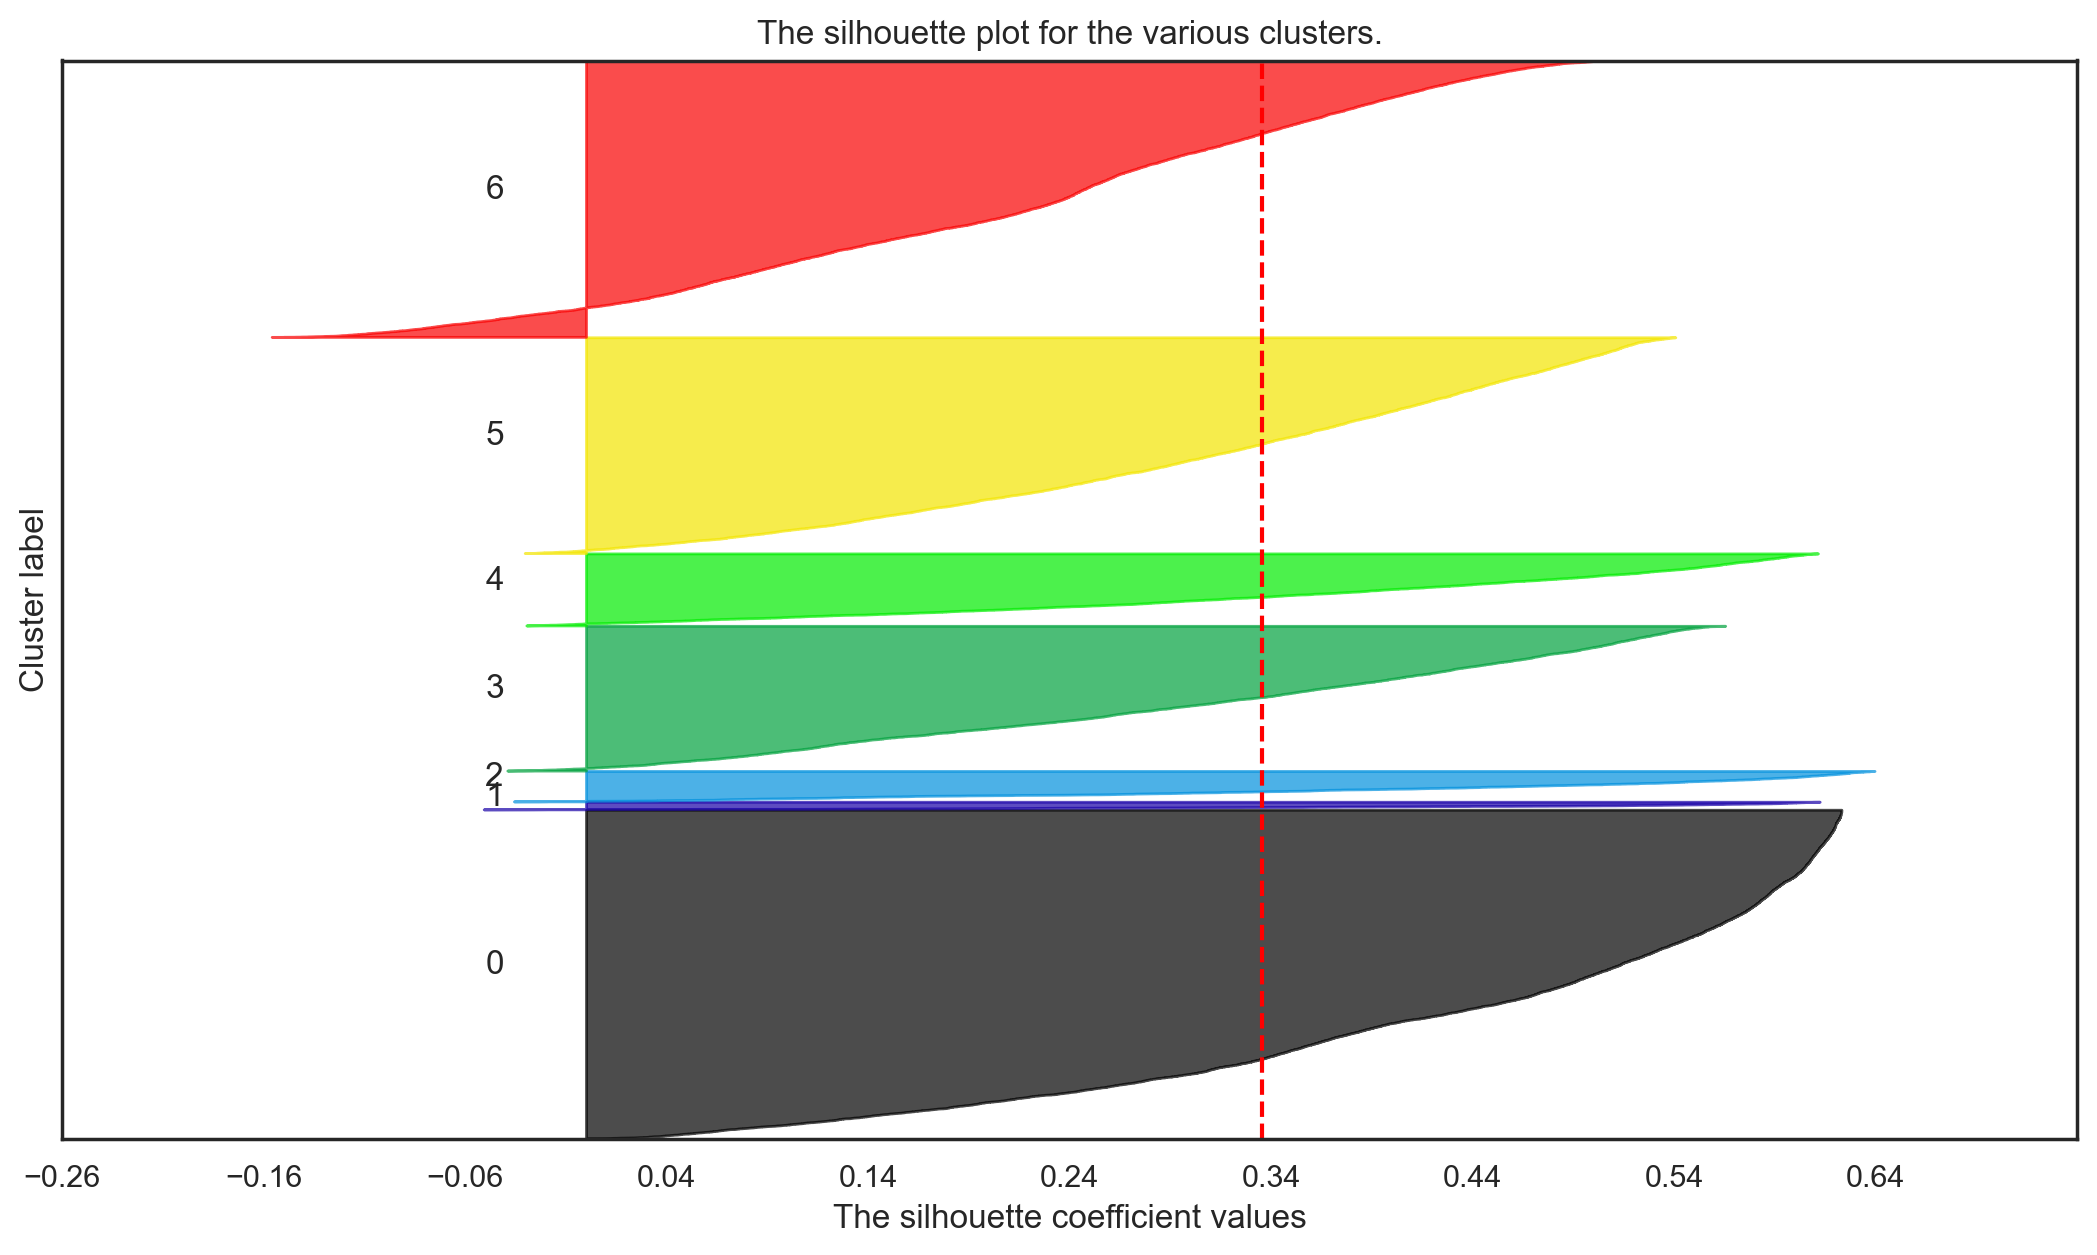

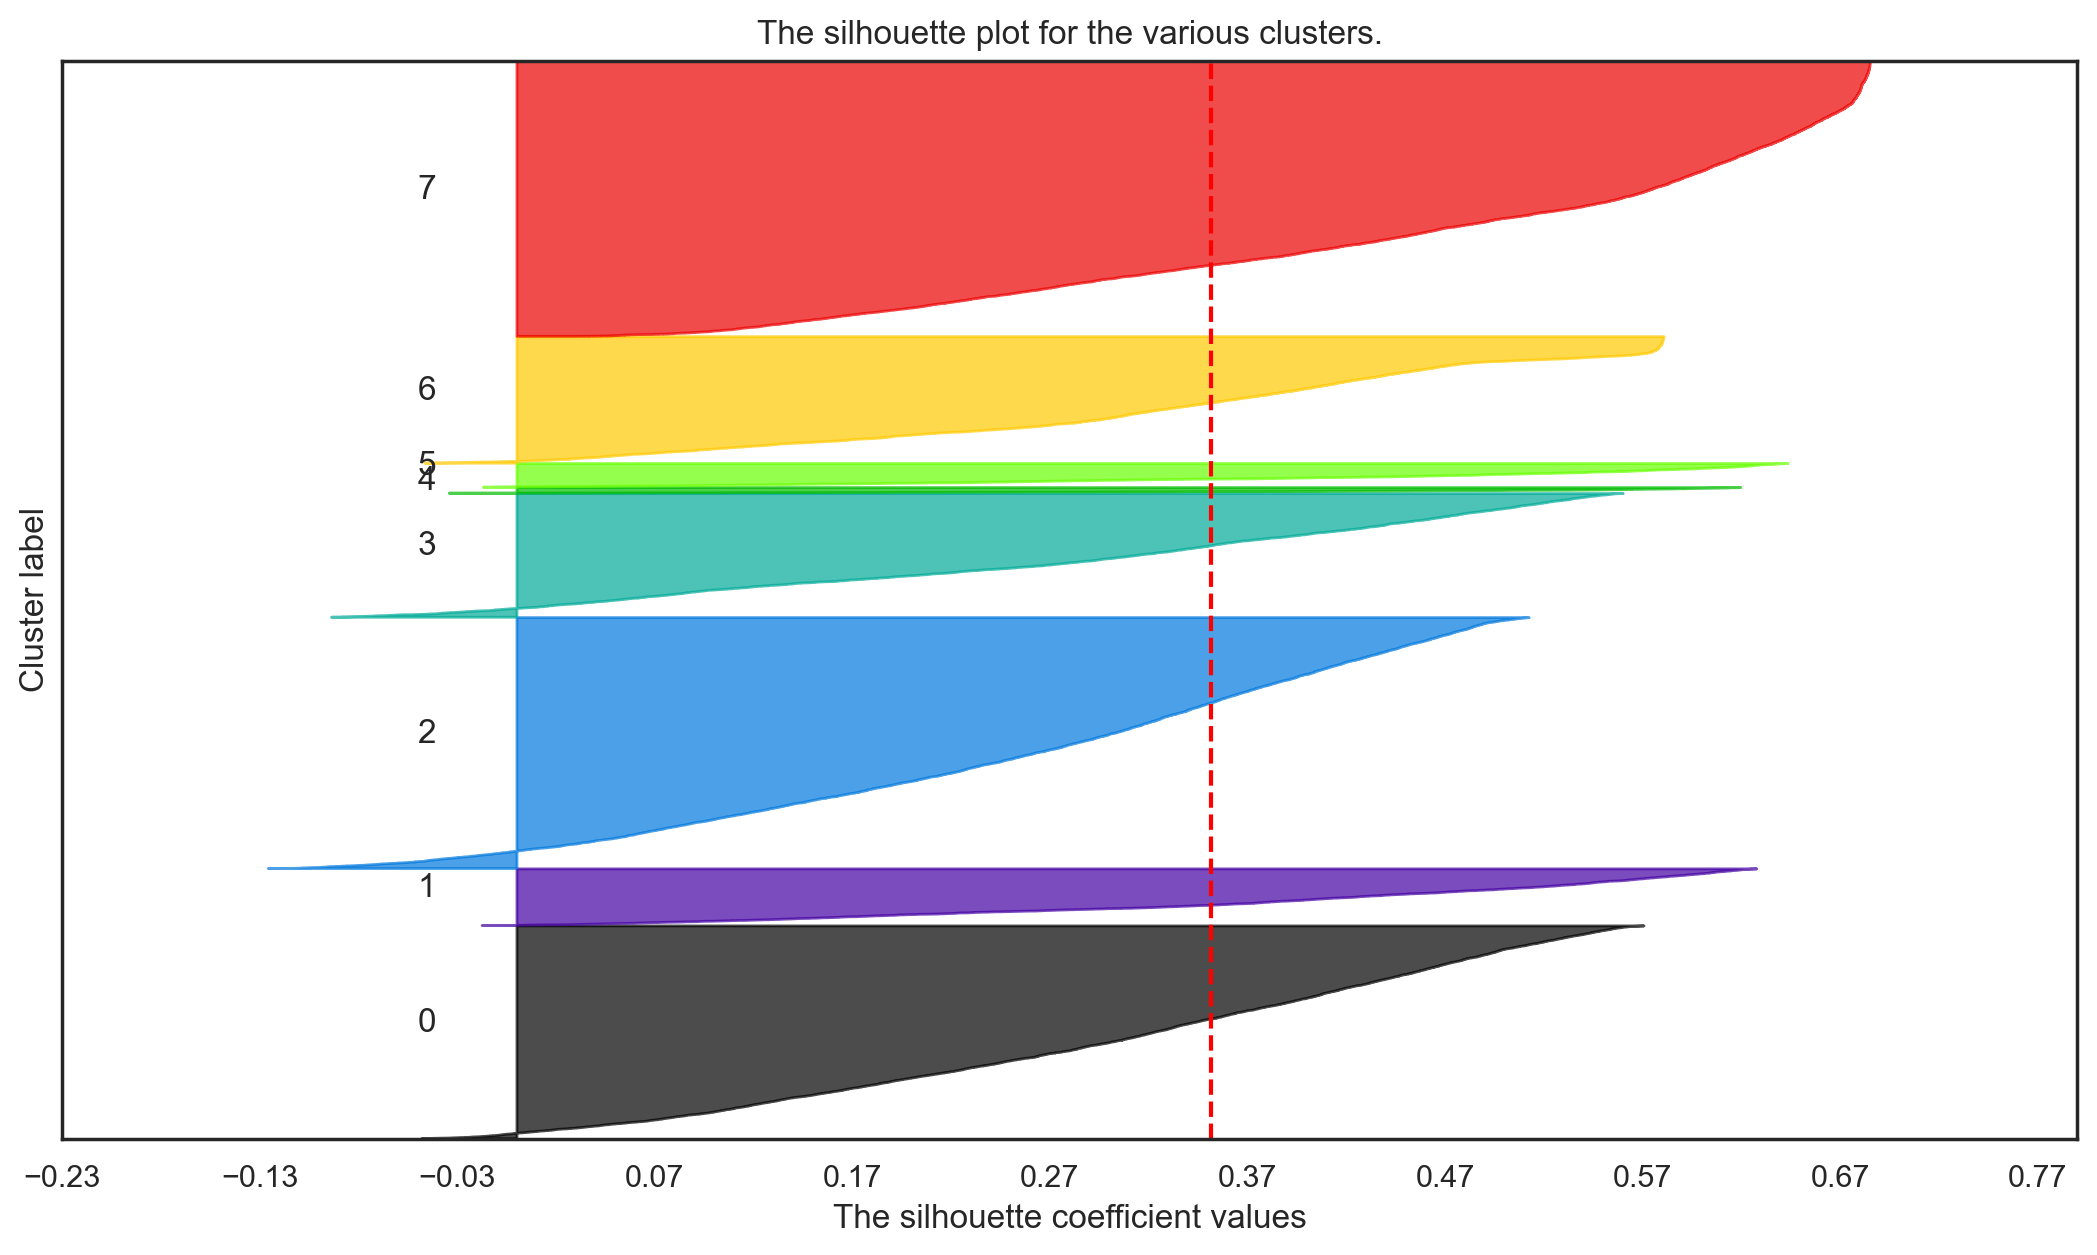

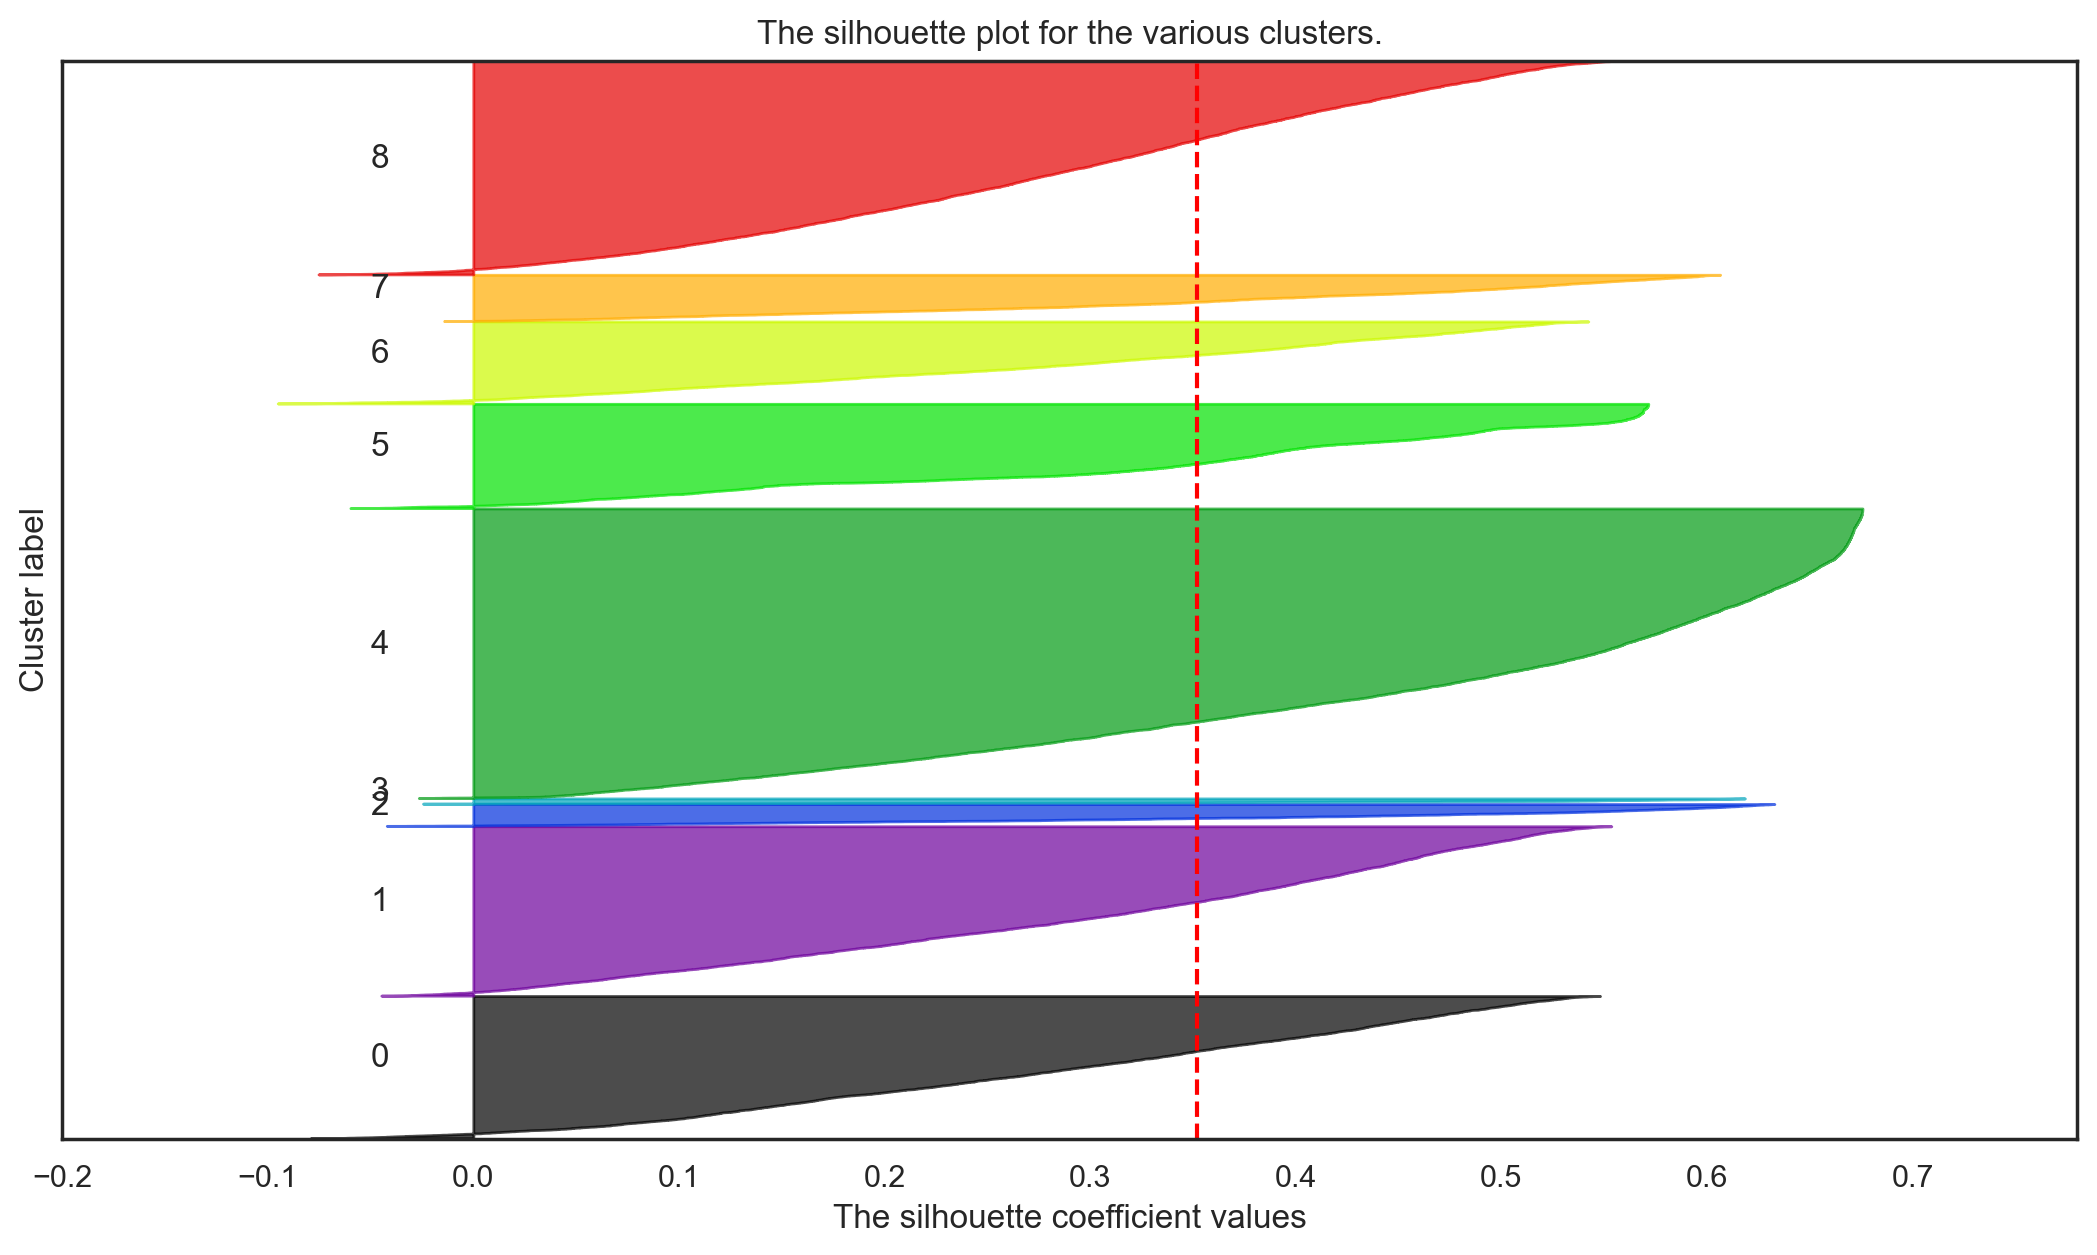

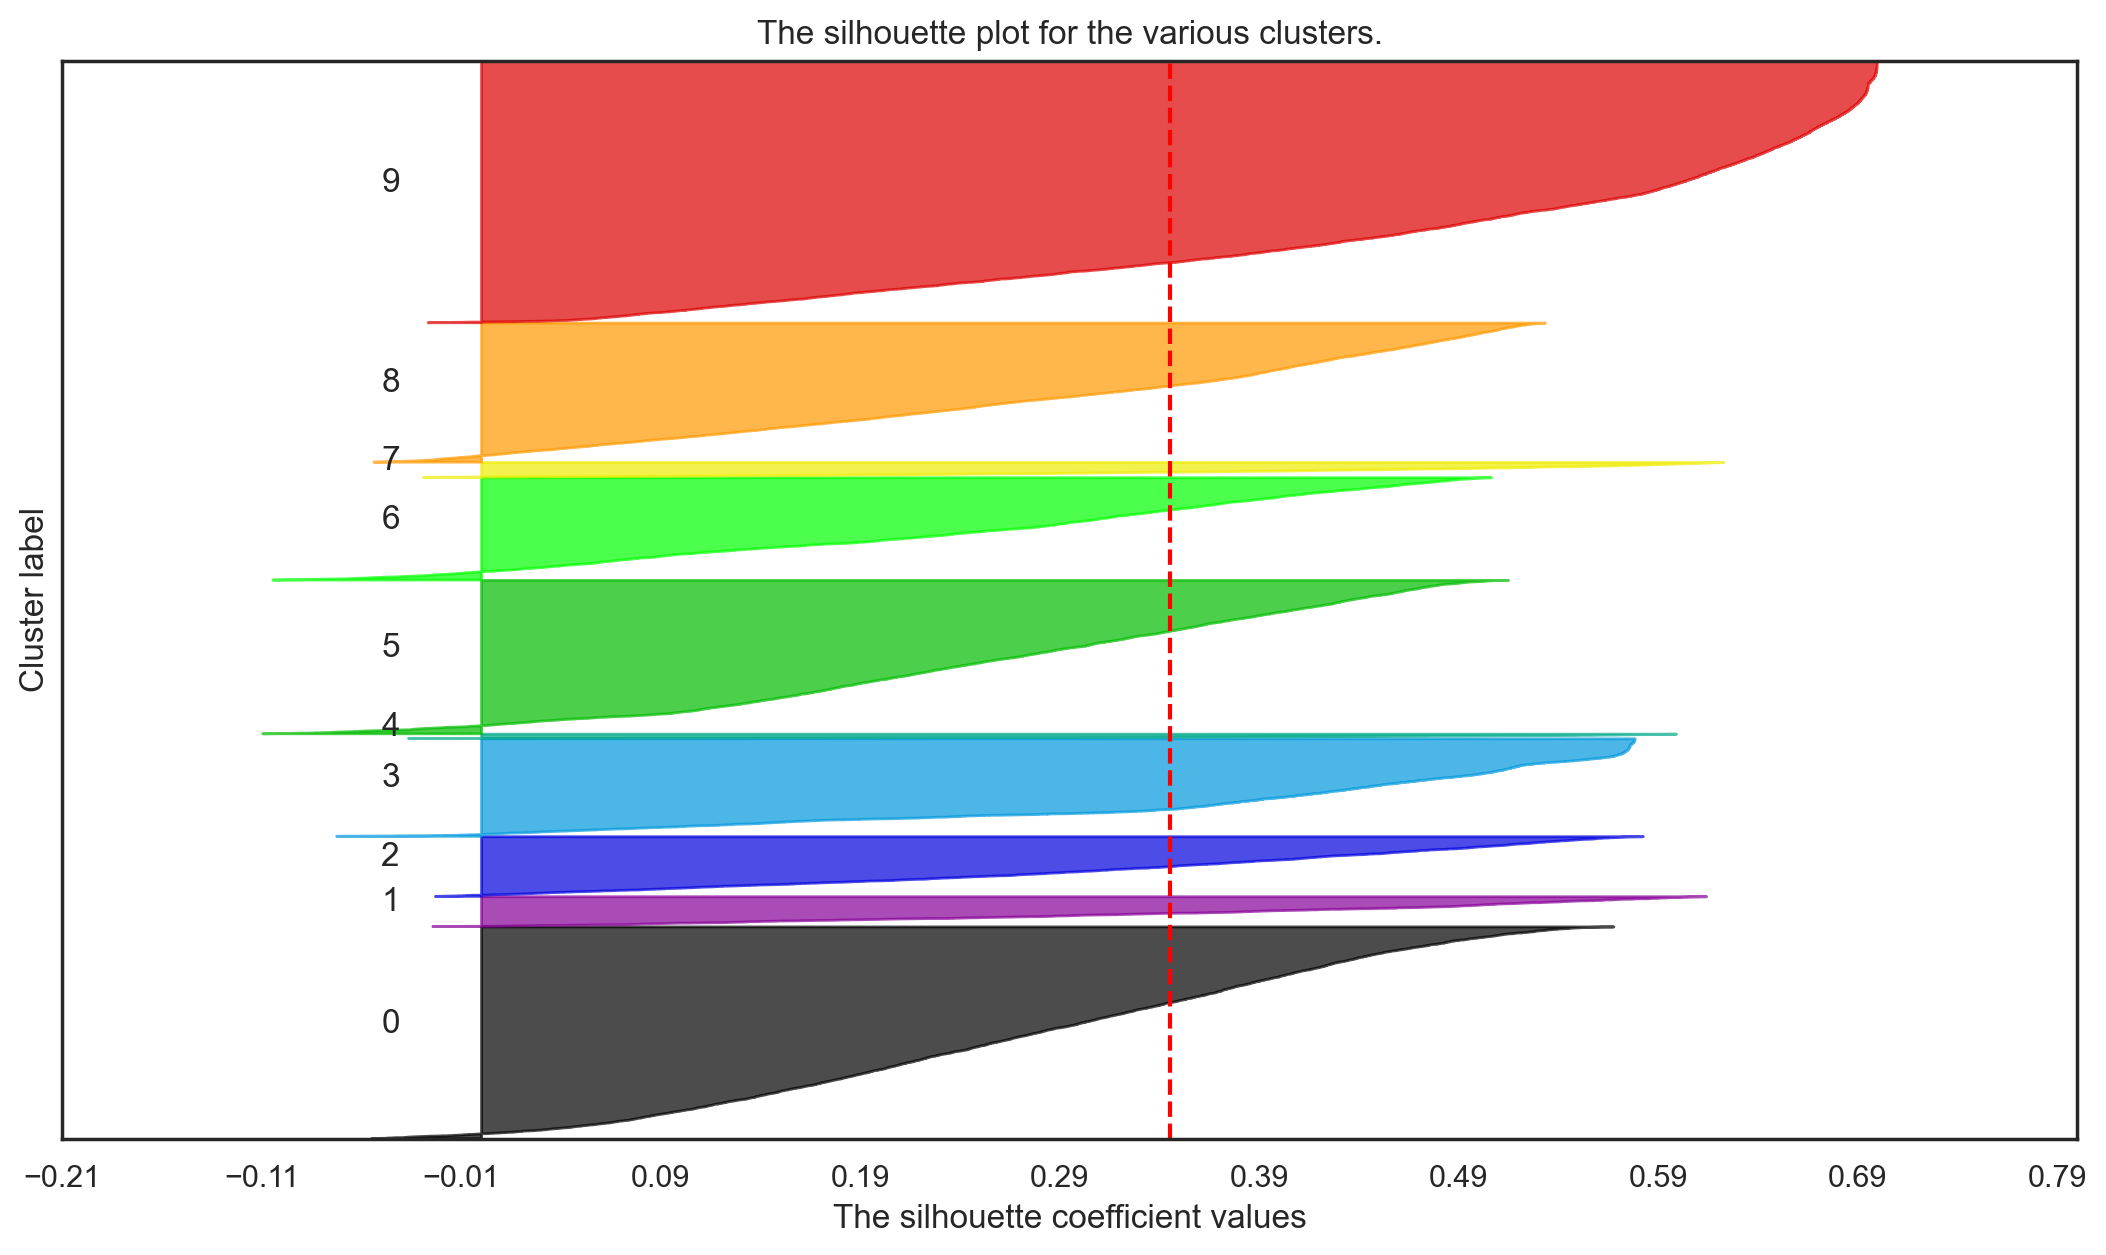

In [41]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
import matplotlib.cm as cm

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(ABCDEats[value_vars])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(ABCDEats[value_vars], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(ABCDEats[value_vars], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(ABCDEats[value_vars]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

### **📏 Clustering Evaluation/Analysis** [Value-Based Segmentation]

#### **Final KMeans clustering Solution** [Value-Based Segmentation]

In [42]:
# final cluster solution
number_clusters = 5
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(ABCDEats[value_vars])
km_labels

array([0, 2, 2, ..., 2, 2, 2])

In [43]:
# Characterizing the final clusters
df_concat = pd.concat((ABCDEats[value_vars], pd.Series(km_labels, name='labels_value', index=ABCDEats.index)), axis=1)
df_concat.groupby('labels_value').mean()

CUI_Total_Amount_Spent  CUI_Total_Food_Types  CUI_Avg_Amount_Spent  order_count  days_between_orders_per_order  chain_count
labels_value                                                                                                                             
0                              34.39                  2.32                 12.69         3.90                          10.22         2.52
1                             124.62                  3.93                 14.73        11.40                           7.21         6.55
2                              12.82                  1.71                  7.07         2.27                           7.53         1.67
3                             223.81                  4.72                 16.19        17.19                           5.35         8.88
4                              69.28                  3.22                 13.87         7.28                           9.13         4.56

In [44]:
# Absolute and Relative Frequency of the clusters [K-Means - Final Solution]
cluster_counts = df_concat['labels_value'].value_counts().sort_index()
cluster_freq = df_concat['labels_value'].value_counts(normalize=True).sort_index()

# Create a DataFrame with the absolute and relative frequency of the clusters
cluster_freq_df = pd.concat([cluster_counts, cluster_freq], axis=1)
cluster_freq_df.columns = ['n', '%']
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

n    %
Cluster            
0         9696 0.31
1         1686 0.05
2        15260 0.49
3          410 0.01
4         4227 0.14

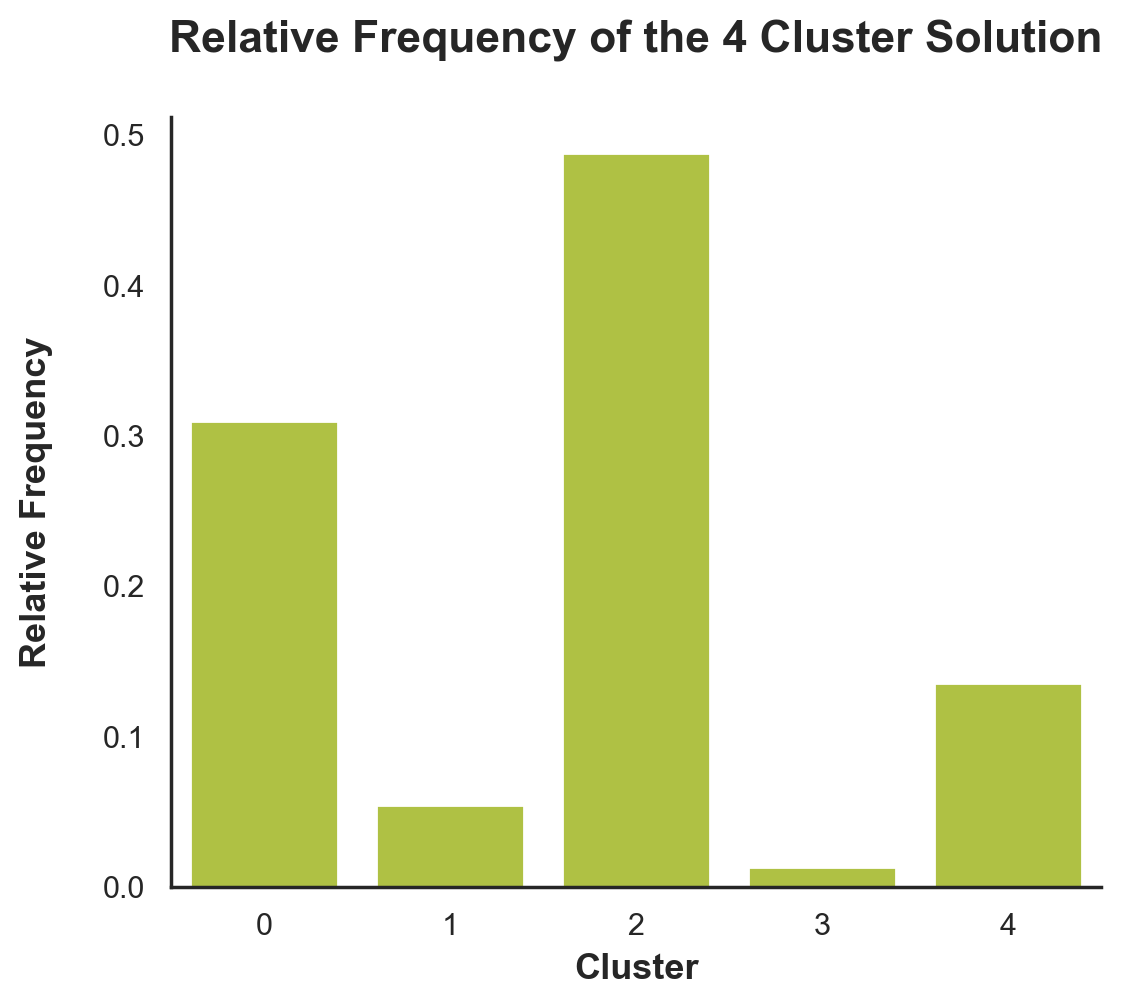

In [45]:
# Barplot of the Relative Frequency [K-Means - Final Solution]
fig = plt.figure(figsize=(6,5))

sns.barplot(x=cluster_freq_df.index, y=cluster_freq_df['%'], color=NOVAIMS_palette_colors[0])
plt.xlabel('Cluster', fontsize=13, fontweight='bold')
plt.ylabel('Relative Frequency\n', fontsize=13, fontweight='bold')
plt.title('Relative Frequency of the 4 Cluster Solution\n', fontsize=16, fontweight='bold')
sns.despine(right=True, top=True)
plt.savefig('./Clustering_Outputs/KMeans_Relative_Frequency_ValueBasedSegmentation.png', dpi=300, bbox_inches='tight')
plt.show()

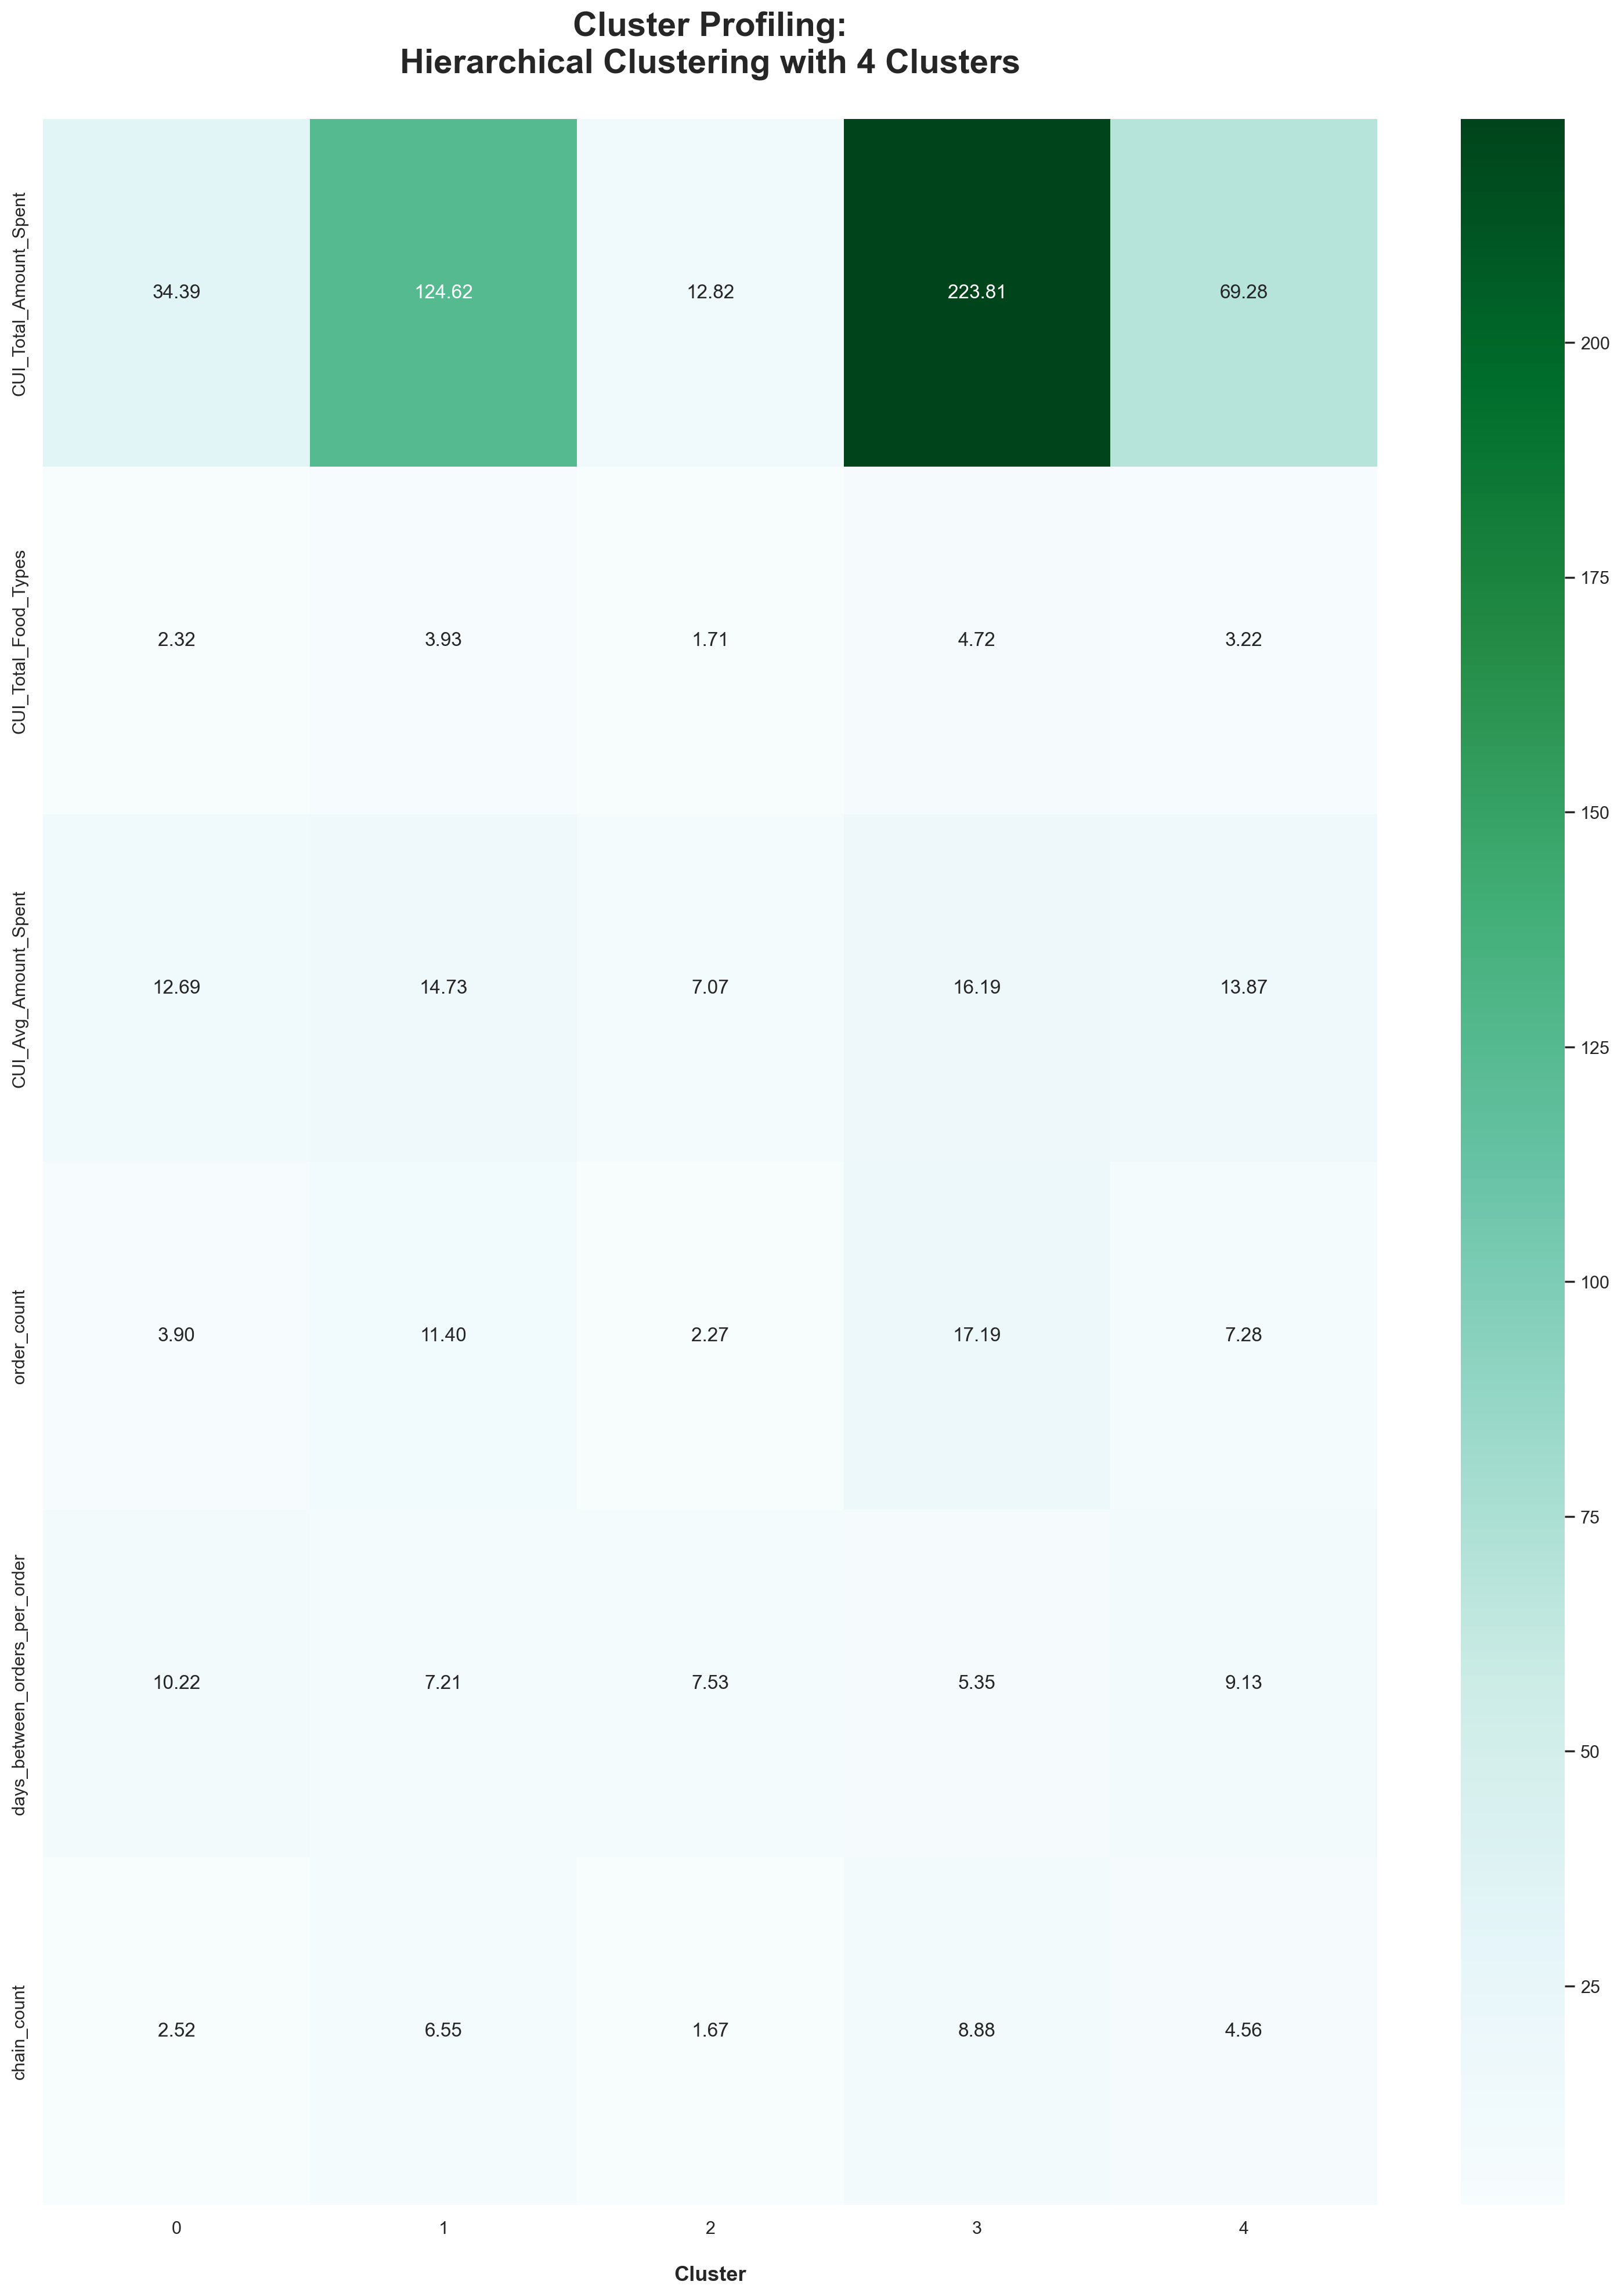

In [46]:
#### Visualize the cluster means as a heatmap to the population means. 
# Explain these values for the population means.
fig, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(df_concat.groupby('labels_value').mean().T, cmap="BuGn", annot=True, fmt=".2f", ax=ax)

# Finalize the plot
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('\nCluster', fontsize=13, fontweight='bold')
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 4 Clusters\n", fontsize=21, fontweight='bold')

plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_ClusterProfiling_ValueBasedSegmentation.png', dpi=300, bbox_inches='tight')
plt.show()

---

## **2. Behavior-Based Segmentation**

In [47]:
# Define the range of clusters
range_clusters = range(1, 11)

# Calculate inertia for each number of clusters
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(ABCDEats[behavior_vars])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

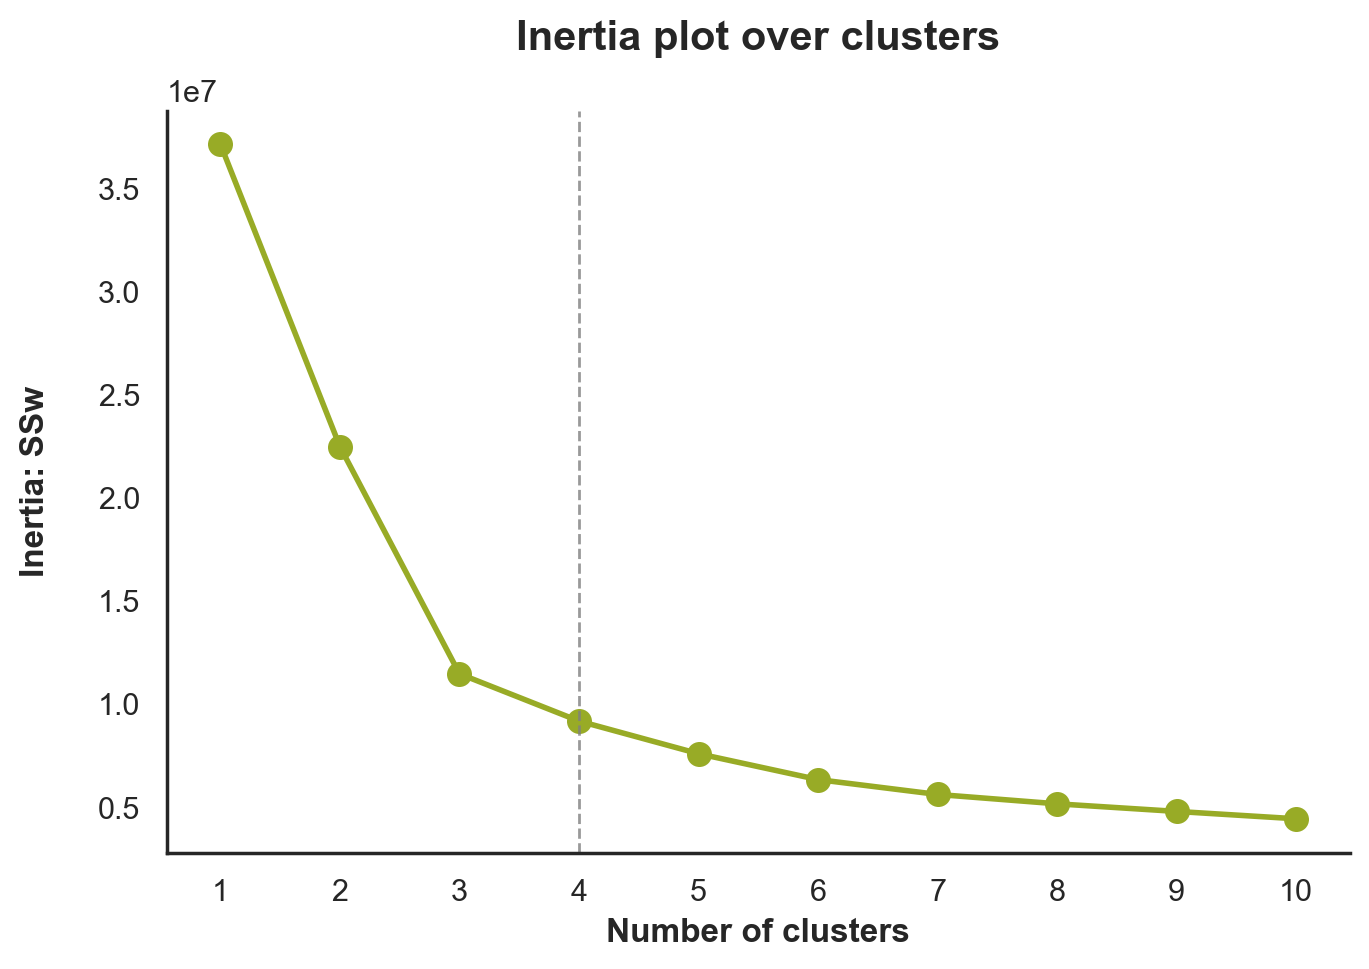

In [48]:
# Inertia Plot
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(range_clusters, inertia, marker='o', color = NOVAIMS_palette_colors[1], linewidth=2, markersize=8)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw\n", size=12, weight='bold')
ax.set_xlabel("Number of clusters", size=12, weight='bold')
ax.set_title("Inertia plot over clusters\n", size=15, weight='bold')

# Add the number of clusters chosen
ax.axvline(x=4, color='grey', linestyle='--', linewidth=1, alpha=0.8)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_Inertia_Plot_BehaviorBasedSegmentation.png', dpi=300, bbox_inches='tight')
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.36759409556150563
For n_clusters = 3, the average silhouette_score is : 0.45744408433741823
For n_clusters = 4, the average silhouette_score is : 0.40354973784704395
For n_clusters = 5, the average silhouette_score is : 0.36374748841297966
For n_clusters = 6, the average silhouette_score is : 0.3689653371635602
For n_clusters = 7, the average silhouette_score is : 0.3442274878526665
For n_clusters = 8, the average silhouette_score is : 0.3240646935836553
For n_clusters = 9, the average silhouette_score is : 0.31169517996302154
For n_clusters = 10, the average silhouette_score is : 0.30083294131033


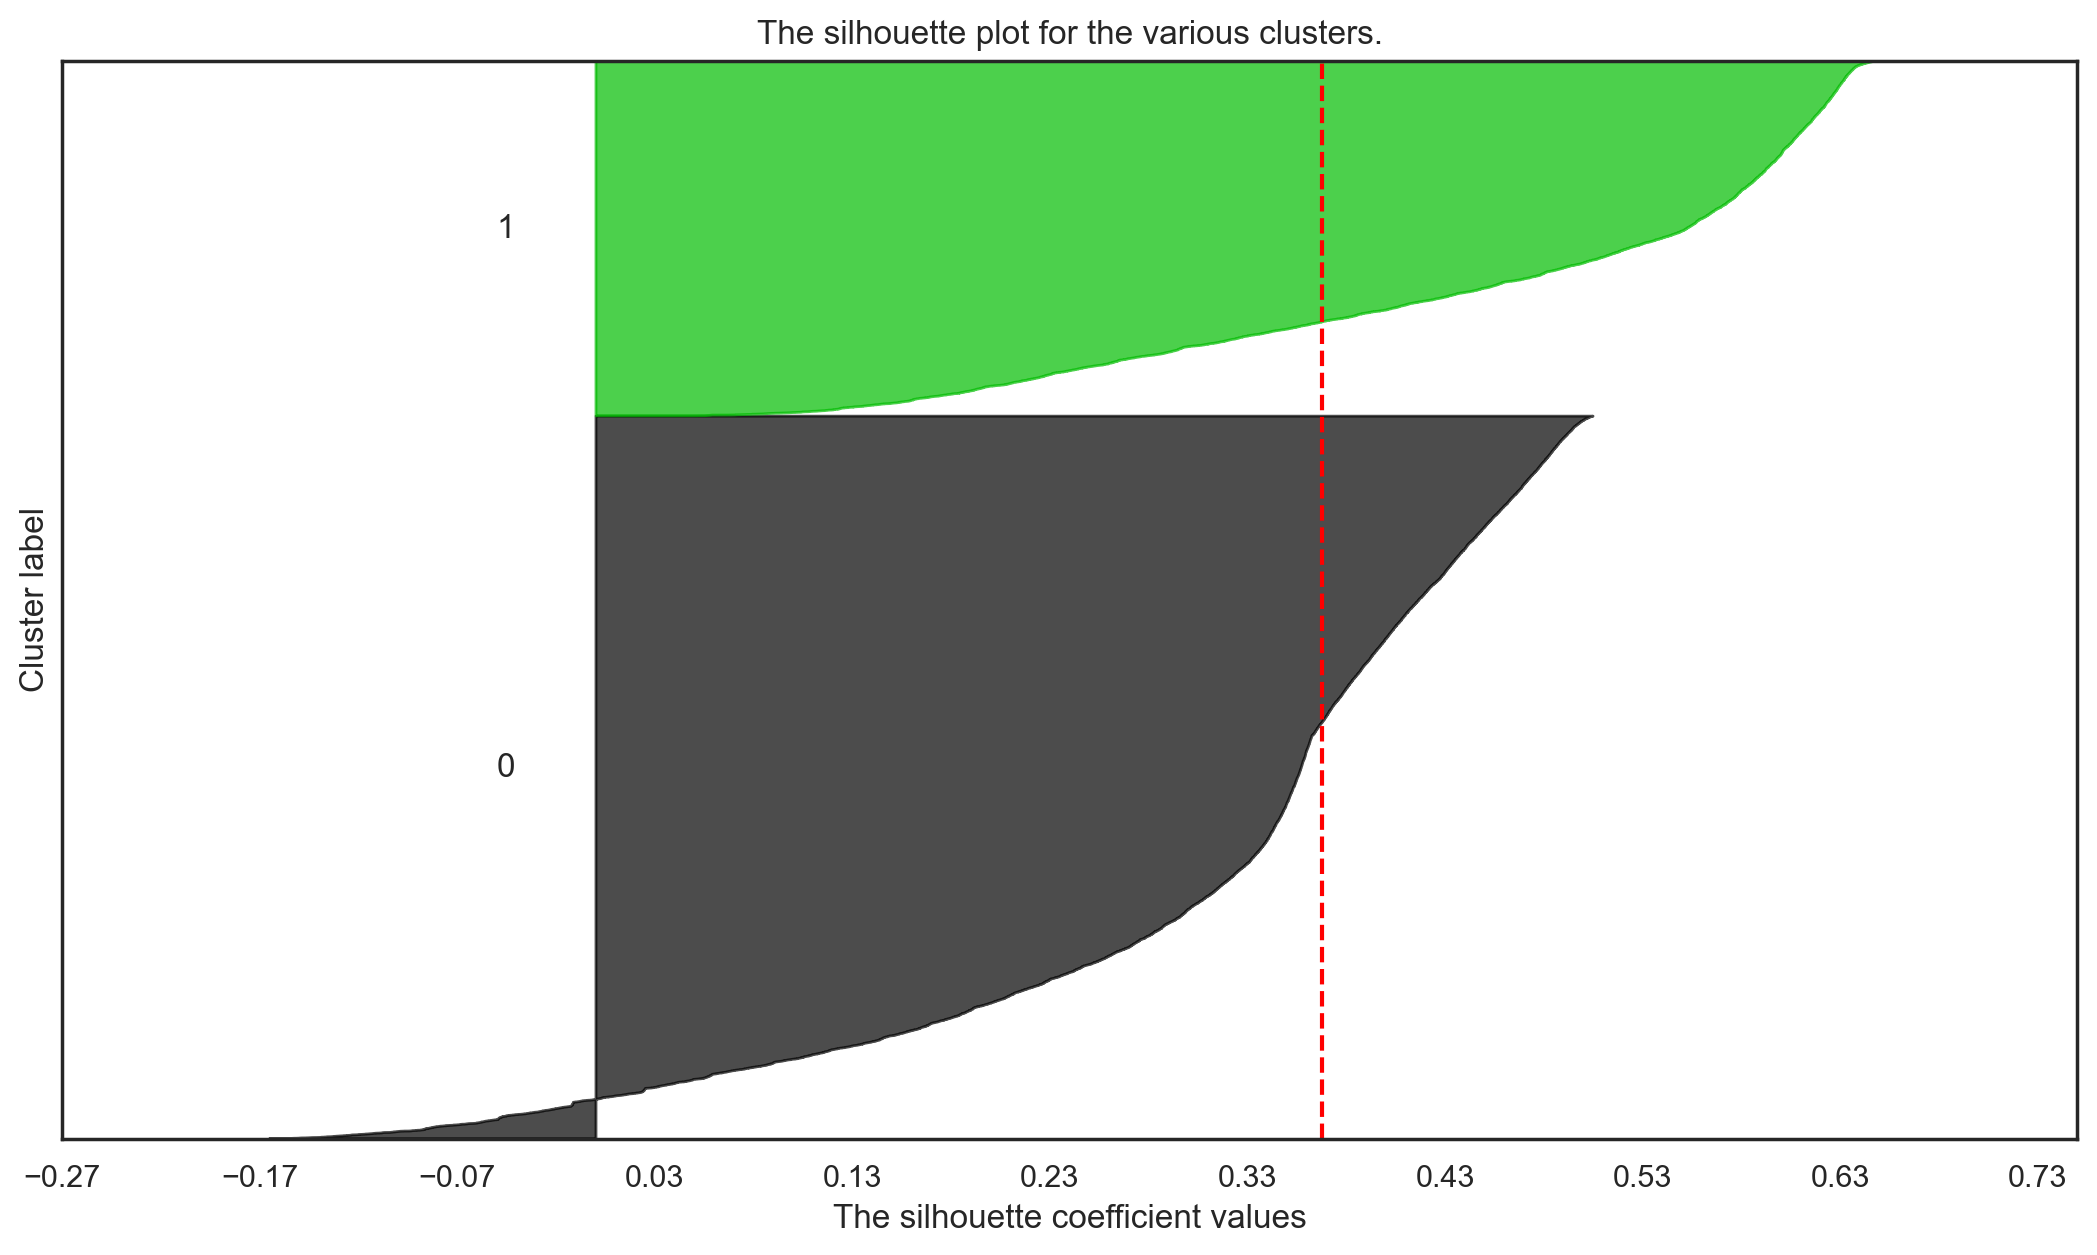

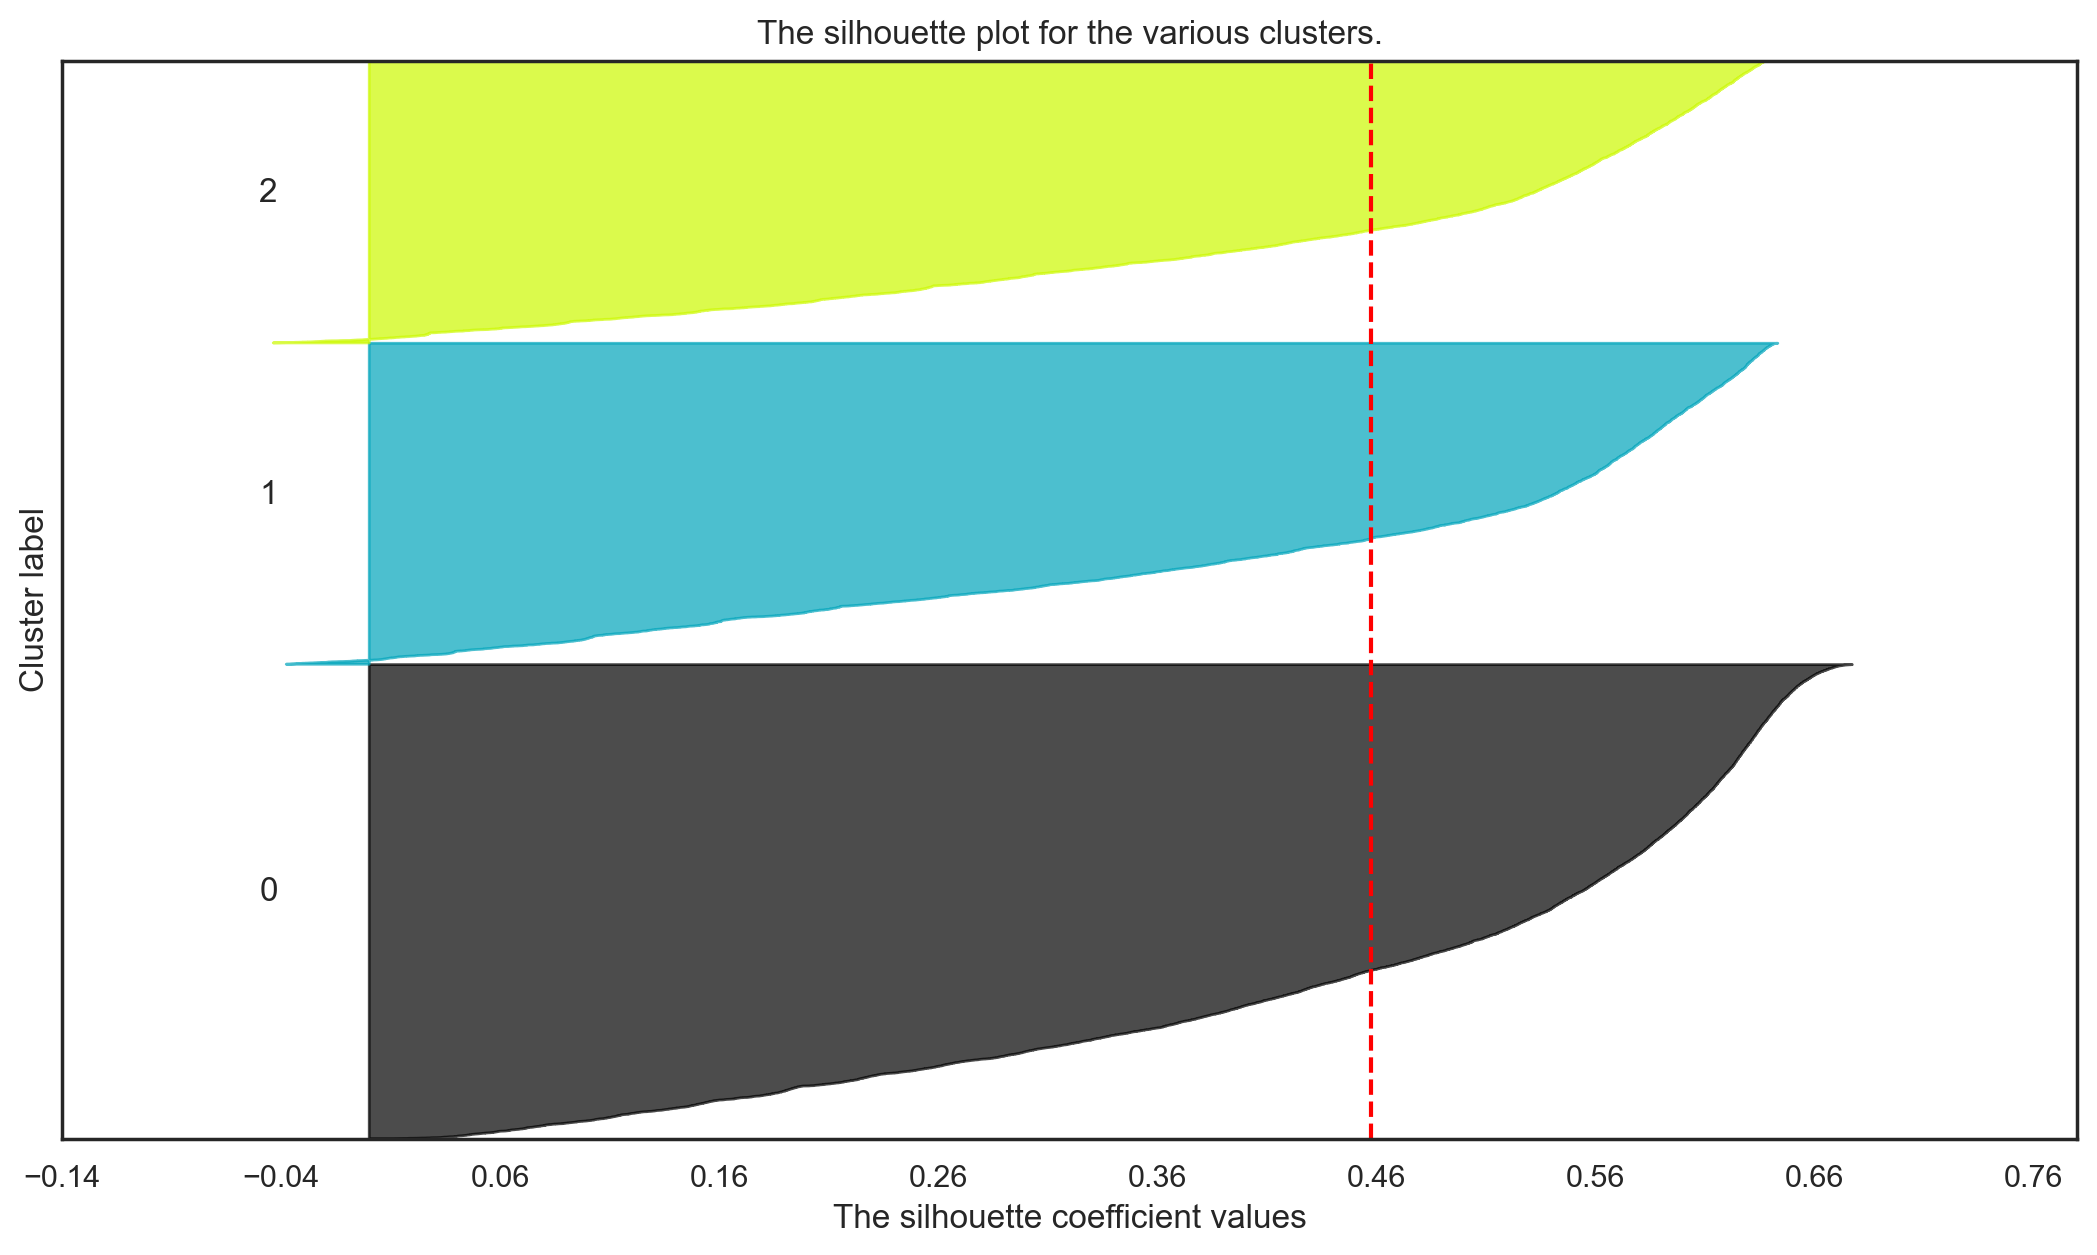

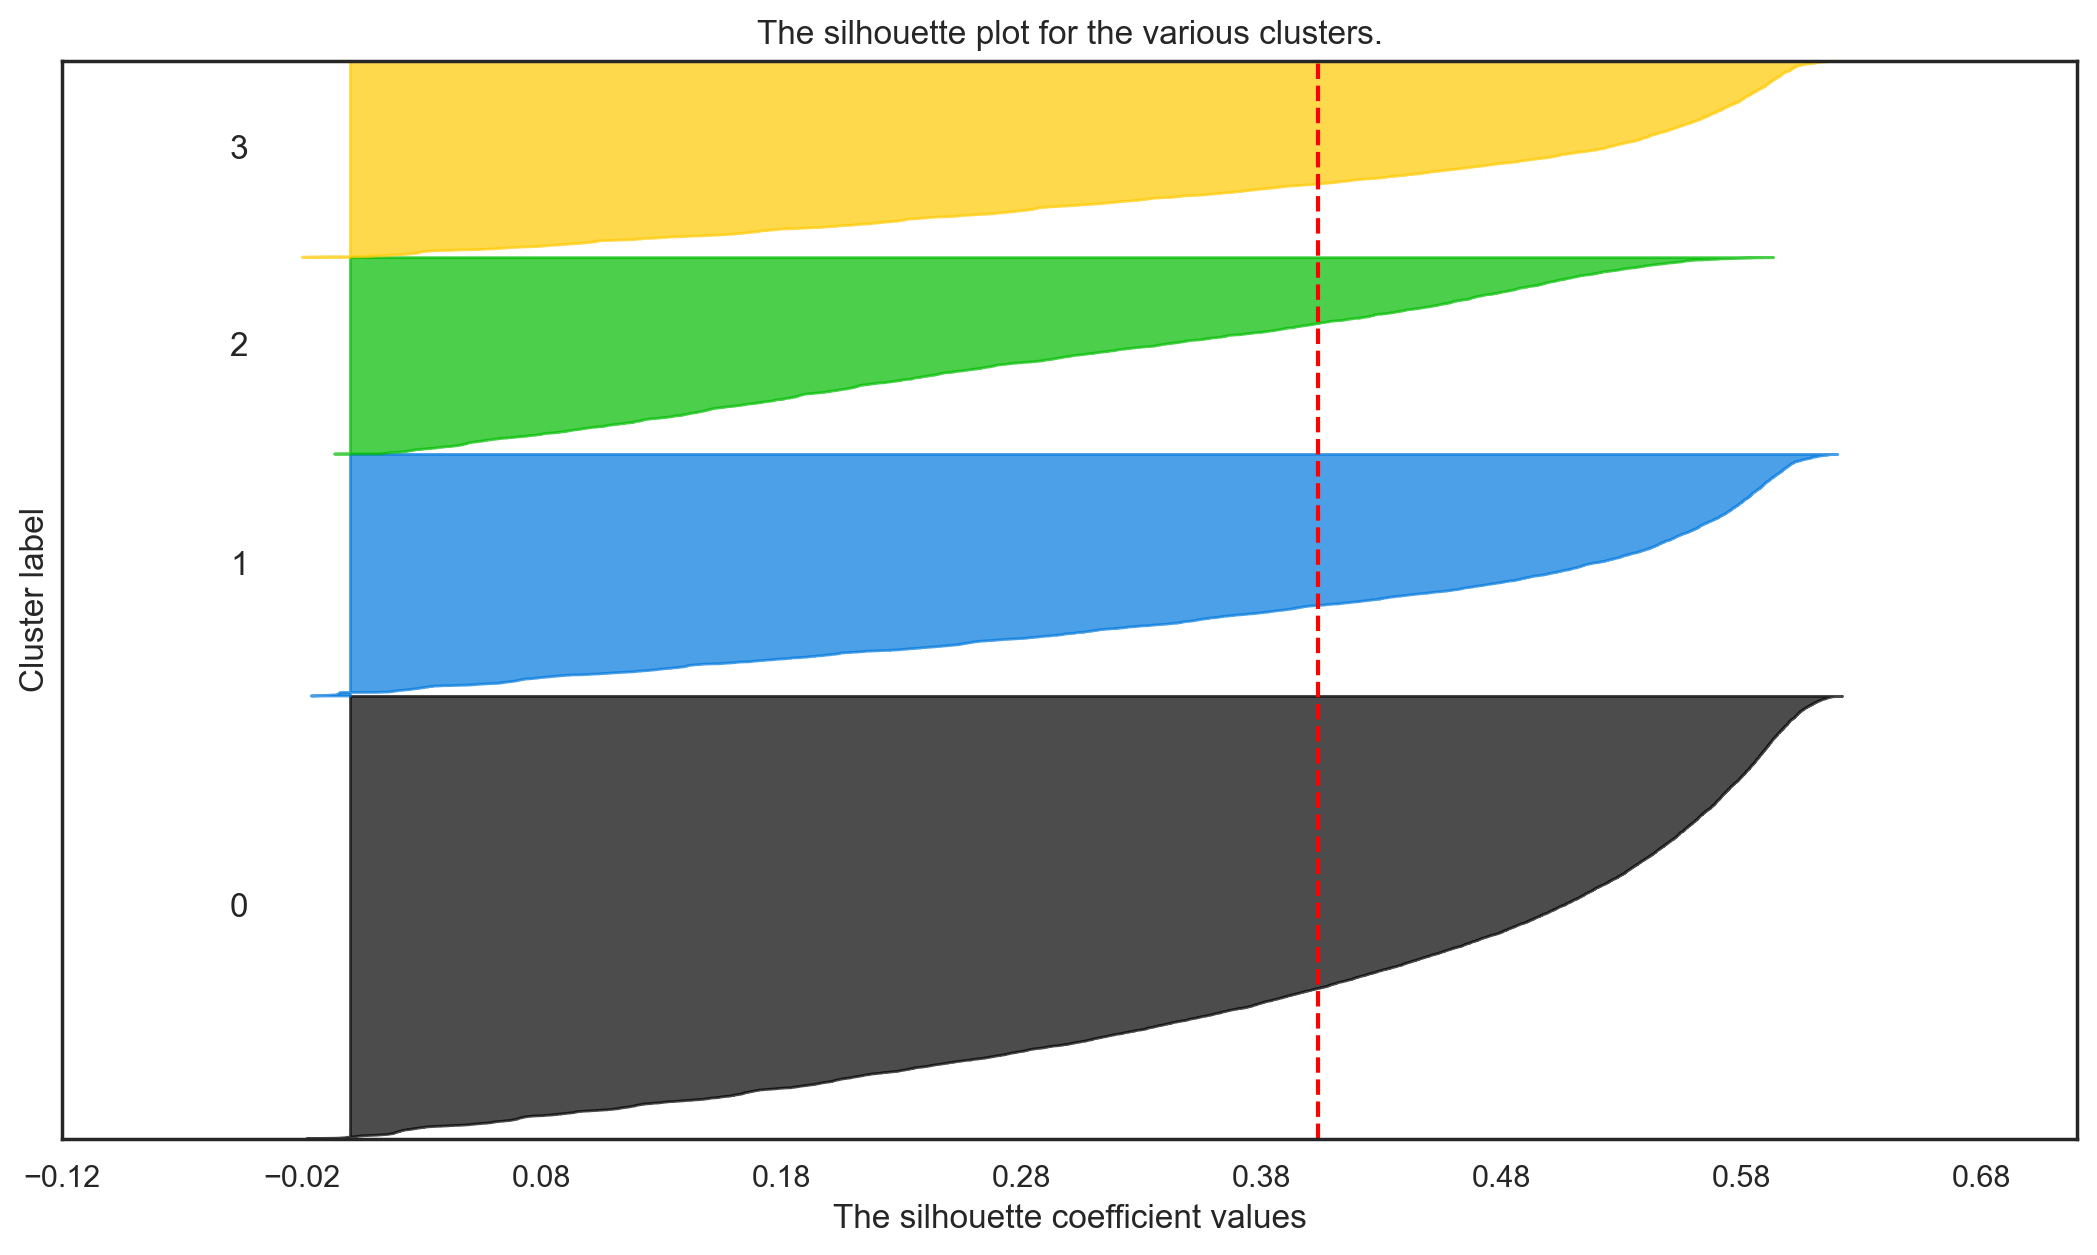

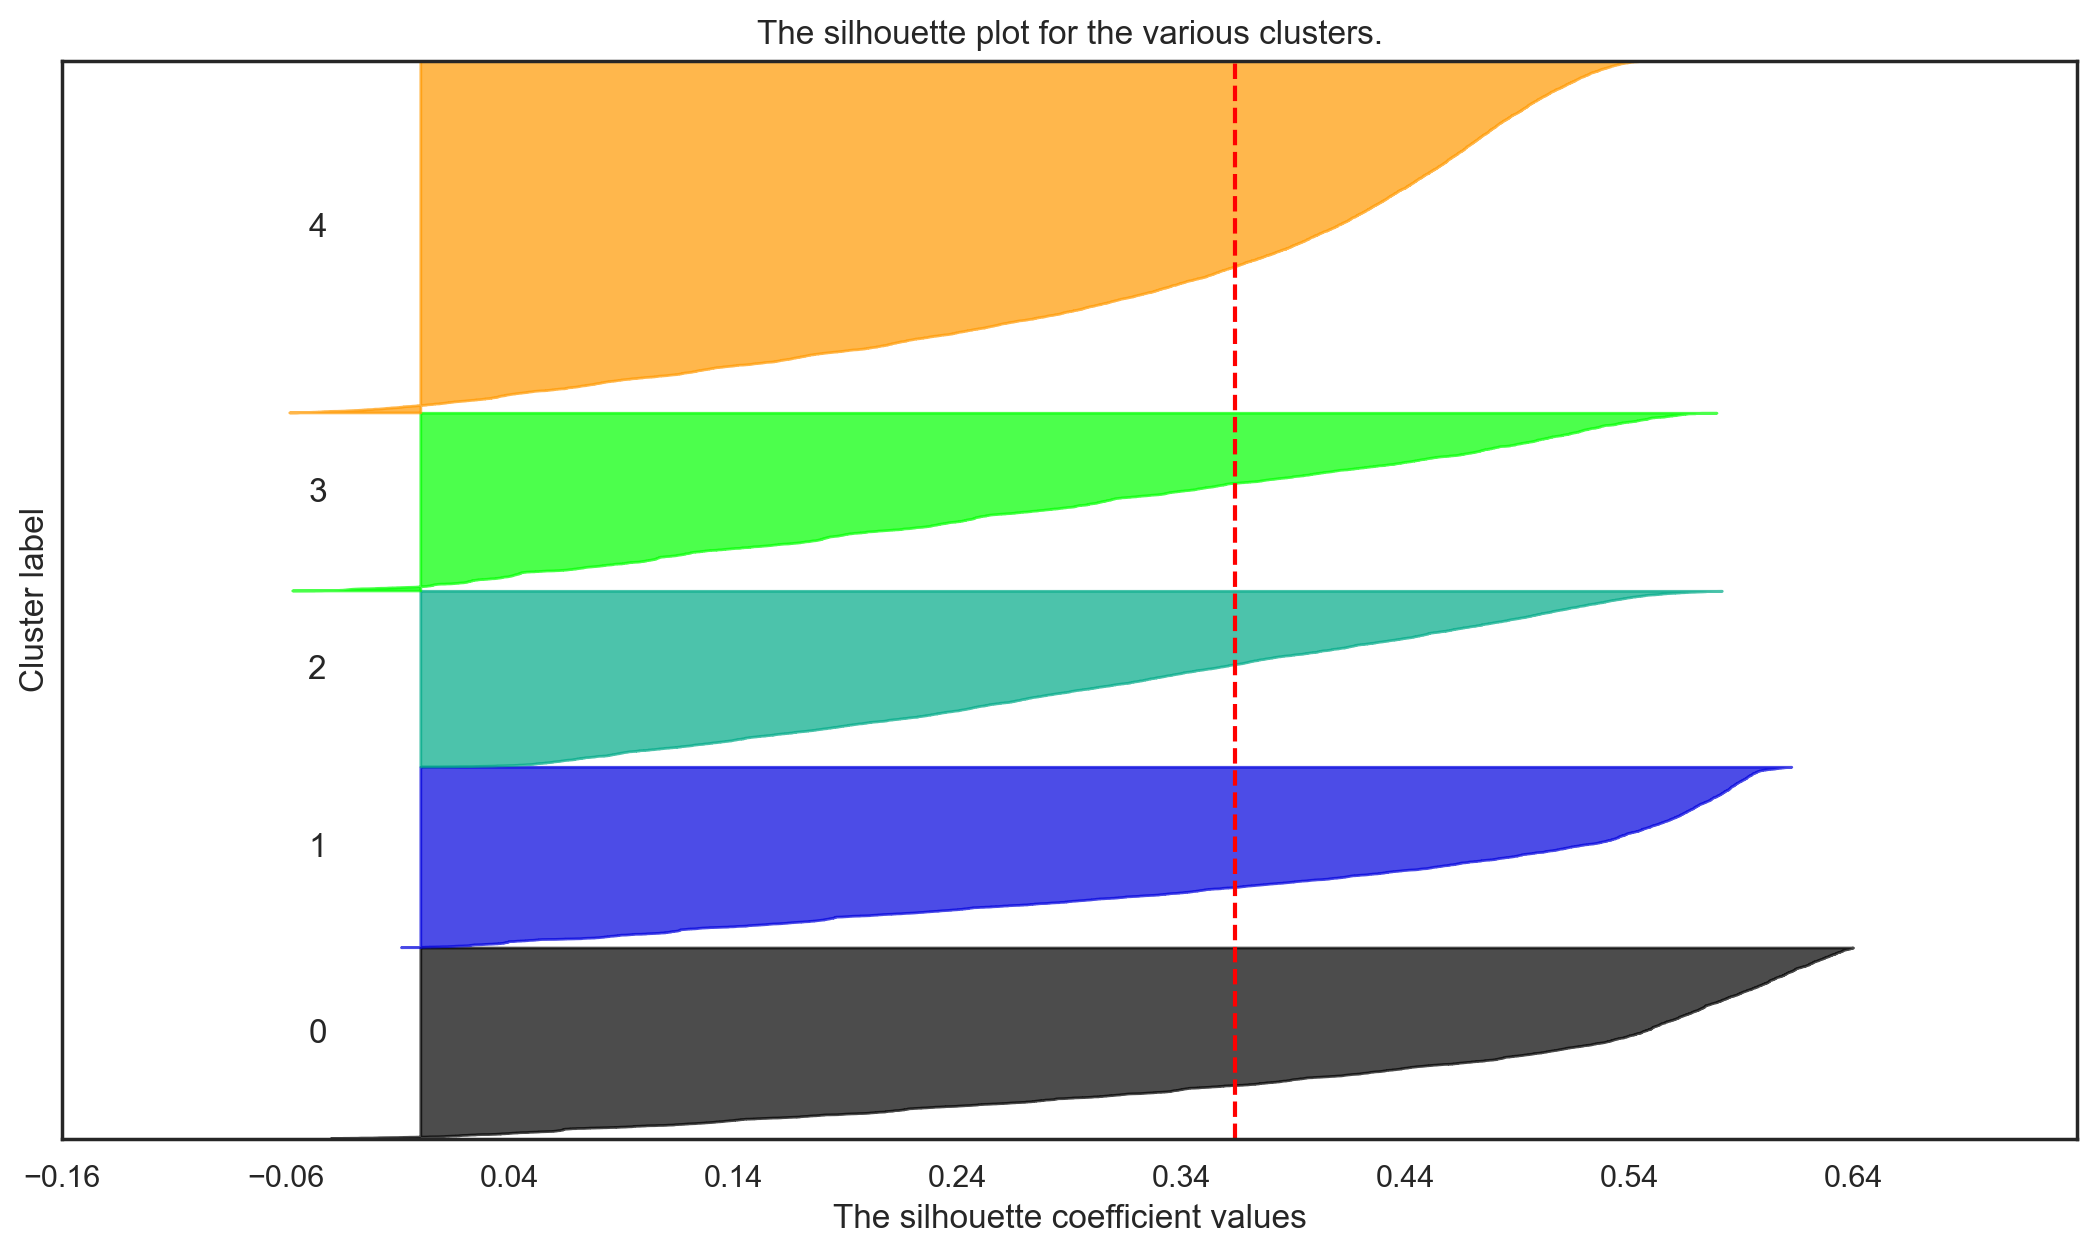

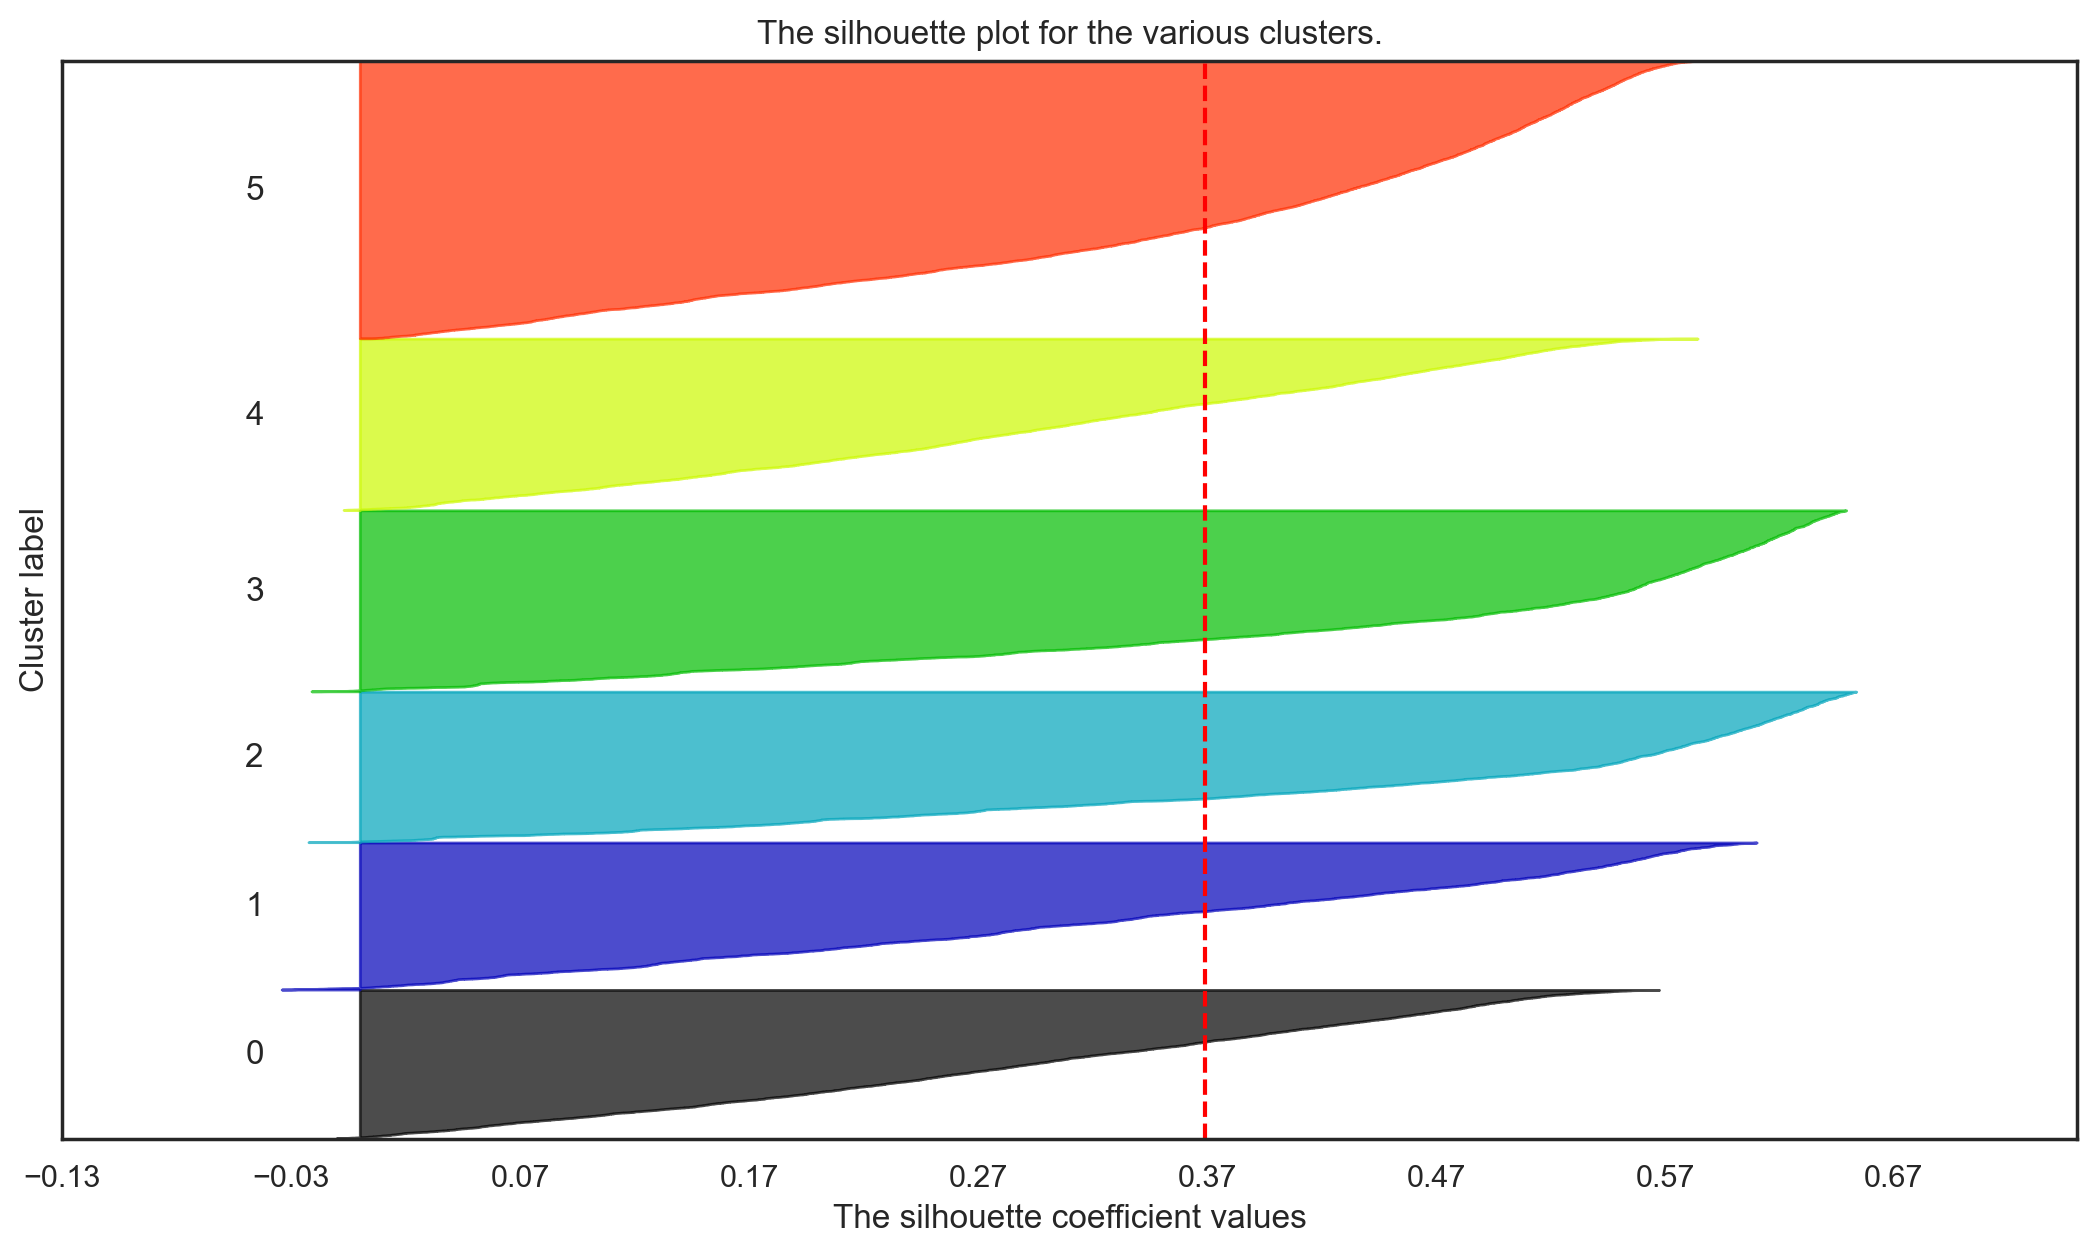

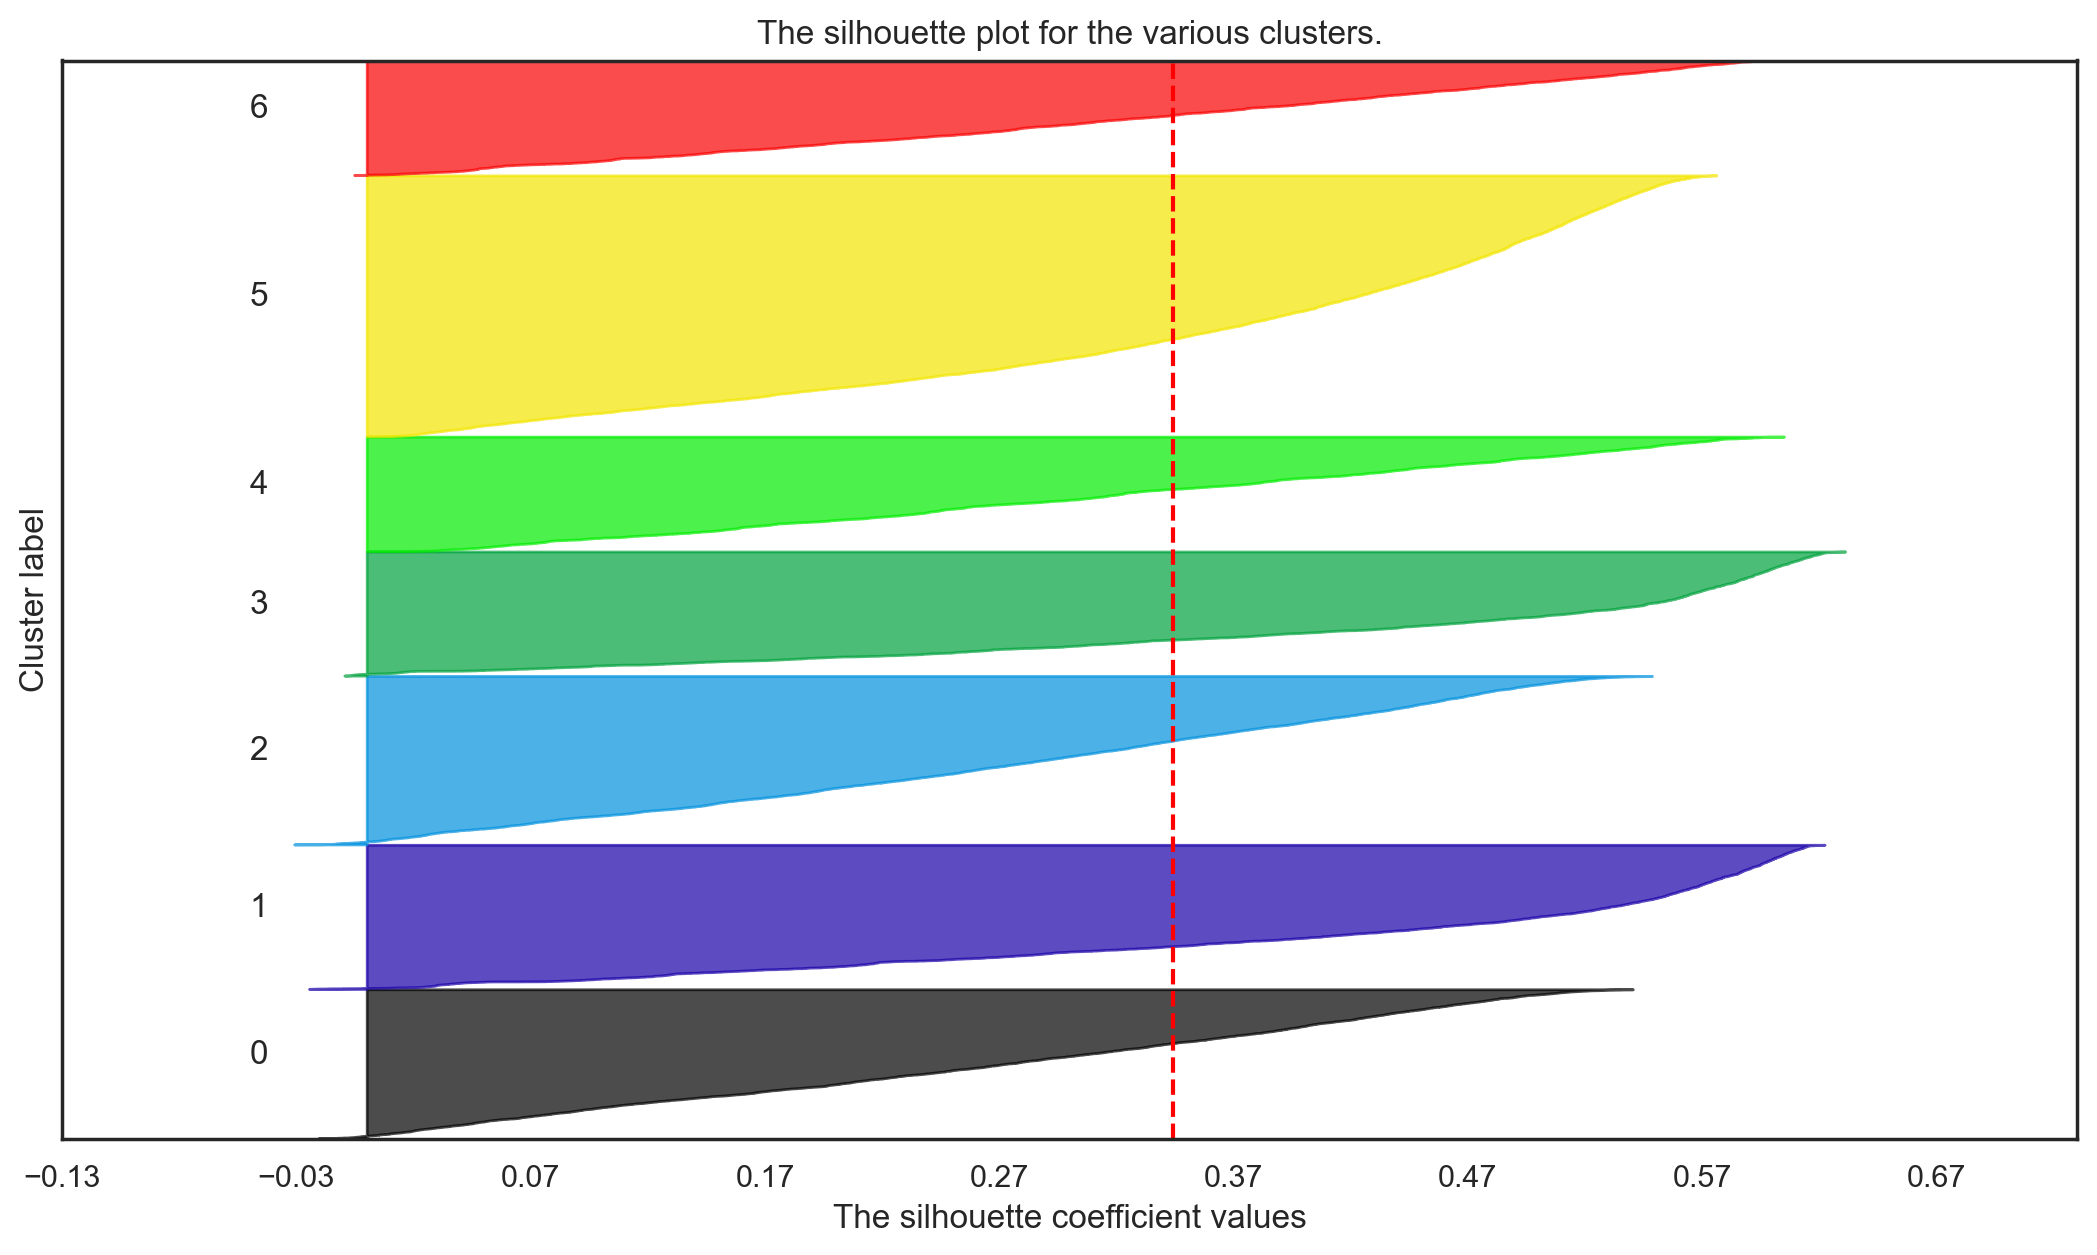

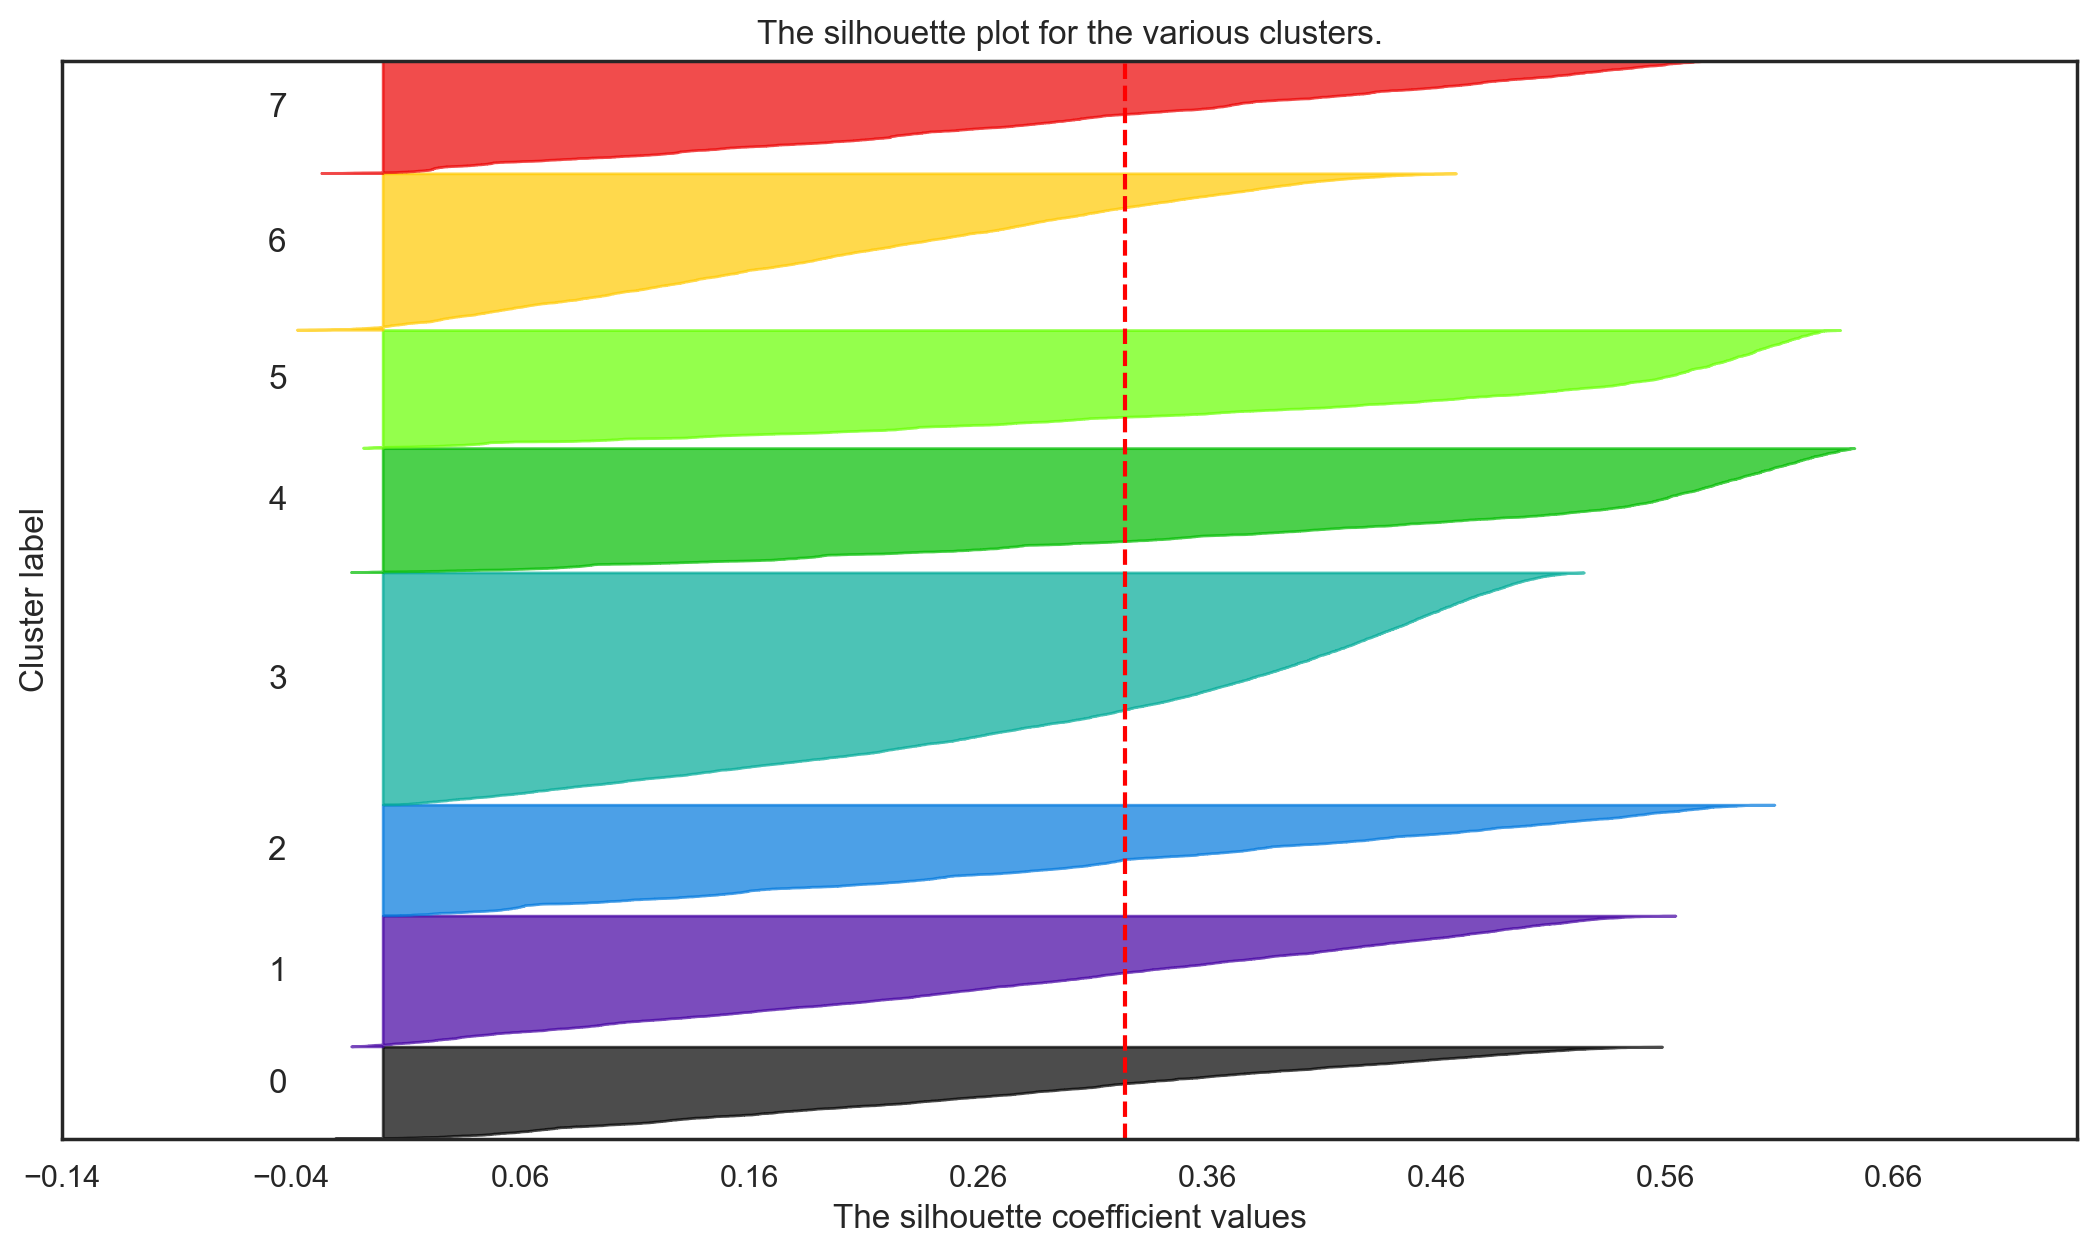

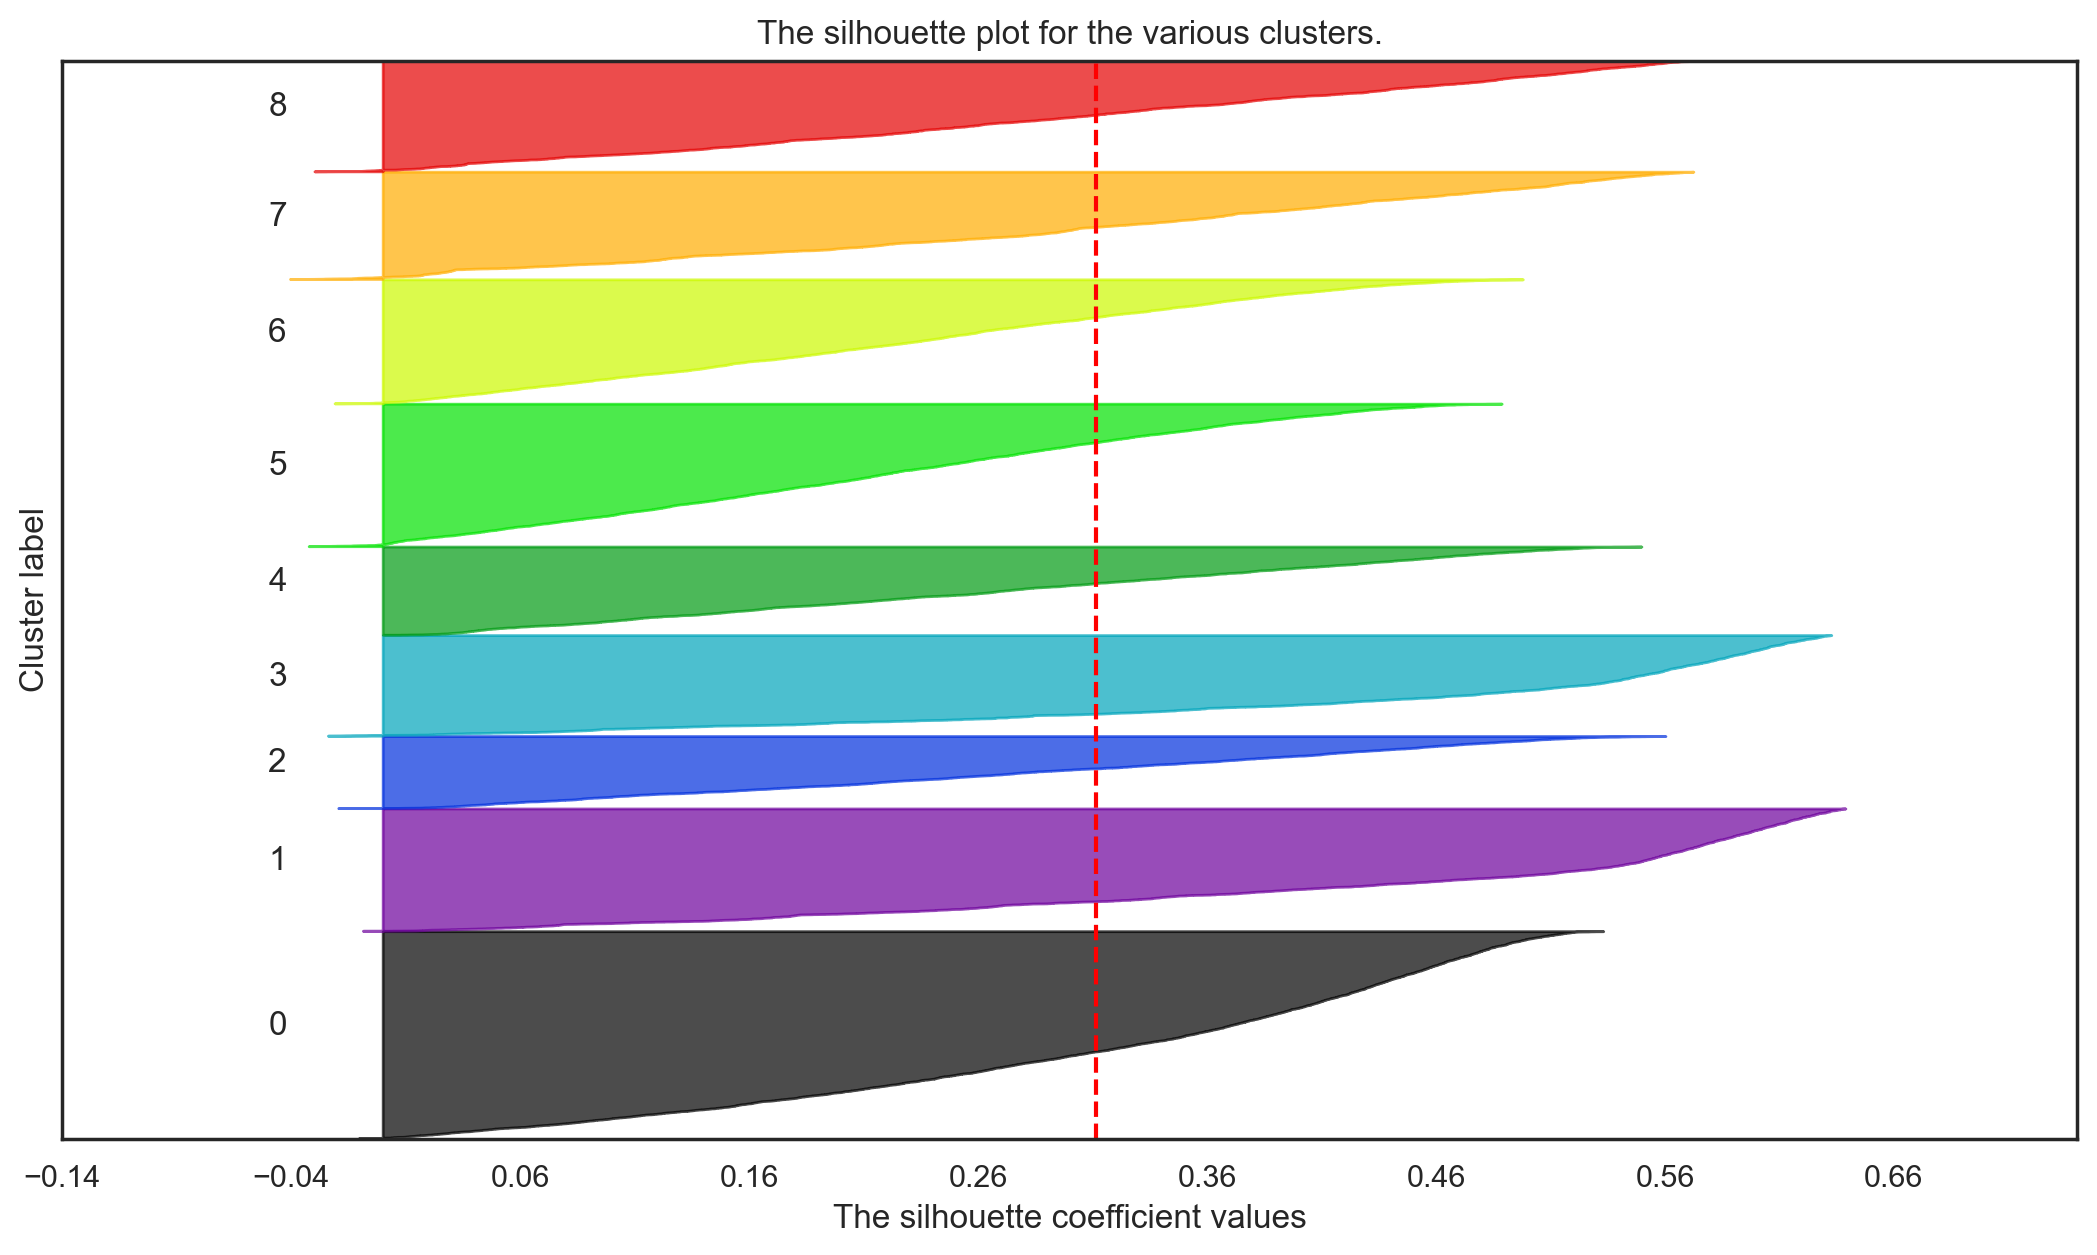

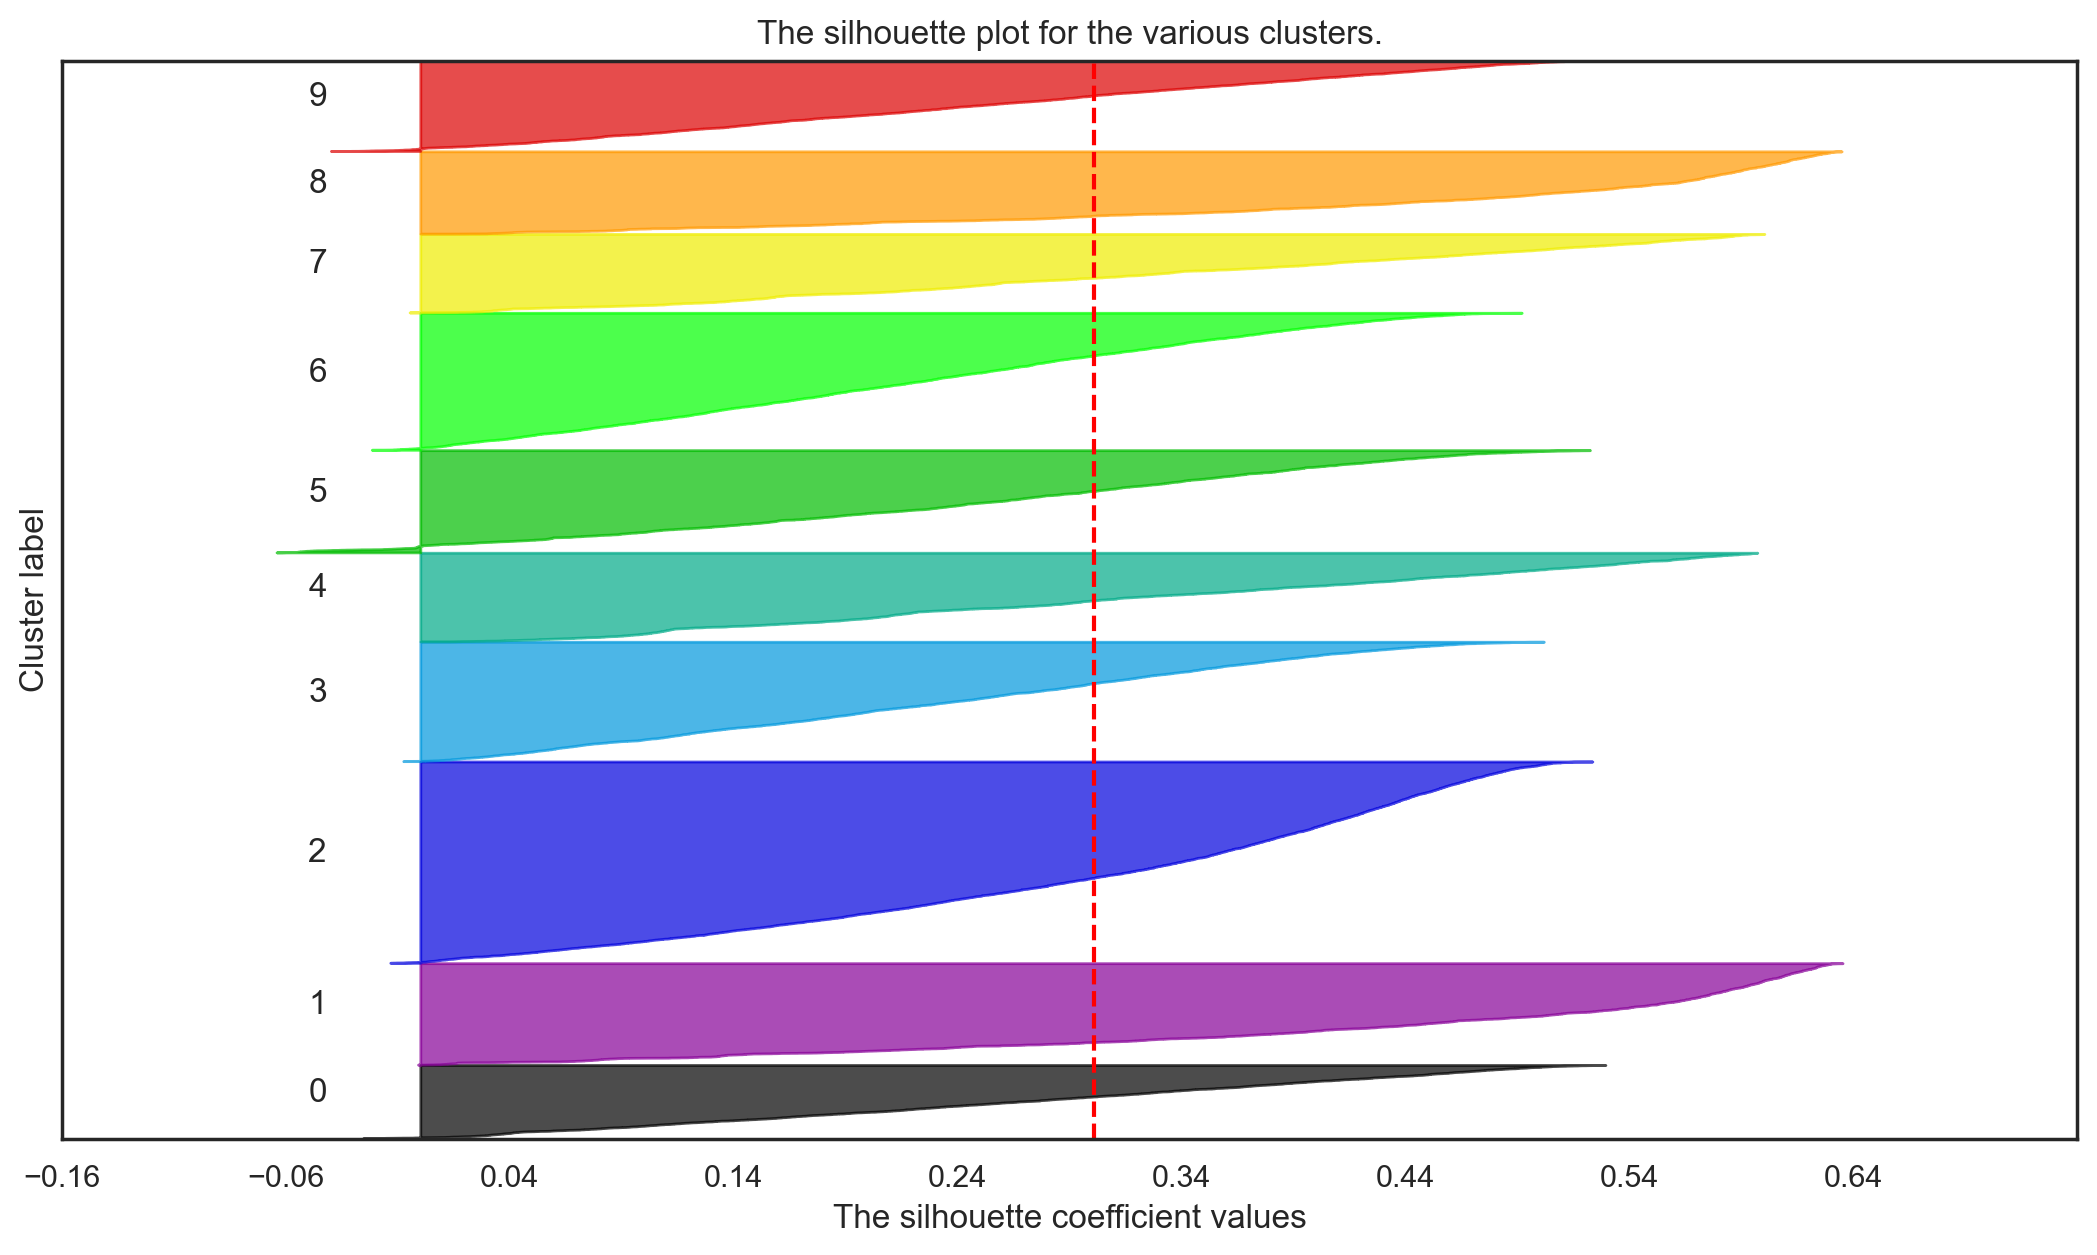

In [49]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
import matplotlib.cm as cm

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(ABCDEats[behavior_vars])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(ABCDEats[behavior_vars], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(ABCDEats[behavior_vars], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(ABCDEats[behavior_vars]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

### **📏 Clustering Evaluation/Analysis** [Behavior-Based Segmentation]

#### **Final KMeans clustering Solution** [Behavior-Based Segmentation]

In [50]:
# final cluster solution
number_clusters = 5
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(ABCDEats[behavior_vars])
km_labels

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
# Characterizing the final clusters
df_concat = pd.concat((ABCDEats[behavior_vars], pd.Series(km_labels, name='labels_behavior', index=ABCDEats.index)), axis=1)
df_concat.groupby('labels_behavior').mean()

customer_age  first_order  last_order  CUI_NOTAsian_Italian_OTHER_NOTSnack_PC  CUI_American_Cafe_Japanese_PC  CUI_Chicken_Chinese_Noodle_PC  CUI_Healthy_NOTAmerican_PC  CUI_Indian_PC  CUI_Japanese_NOTBeverages_PC  CUI_Beverages_Thai_PC  HR_Lunch_Dinner_PC  HR_LateNight_Breakfast_PC  HR_Evening_PC  HR_AfternoonSnack_PC  Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday
labels_behavior                                                                                                                                                                                                                                                                                                                                                                                                 
0                       27.47        69.64       76.77                                   -0.15                          -0.25                          -0.34                        0.11          -0.04                          0.05                   0.00               -0.65                      -0.44           0.03                 -0.04    0.22    0.23     0.25       0.29      0.35    0.30      0.30
1                       27.24        11.19       23.39                                   -0.11                          -0.30                          -0.30                        0.07          -0.04                          0.02                   0.01               -0.53                      -0.44           0.13                 -0.09    0.27    0.26     0.27       0.28      0.32    0.34      0.43
2                       27.46        34.92       79.38                                   -0.06                           0.11                           0.04                        0.01           0.00                          0.00                   0.00               -0.03                       0.17          -0.05                  0.04    0.56    0.59     0.60       0.63      0.70    0.66      0.66
3                       27.56        36.45       48.18                                   -0.11                          -0.30                          -0.30                        0.09          -0.04                          0.03                   0.00               -0.57                      -0.46           0.10                 -0.10    0.24    0.24     0.26       0.27      0.33    0.38      0.35
4                       27.47         8.01       76.72                                    0.22                           0.39                           0.47                       -0.15           0.06                         -0.06                  -0.01                0.93                       0.61          -0.10                  0.10    0.94    0.95     1.00       1.03      1.09    1.06      1.17

In [52]:
# Absolute and Relative Frequency of the clusters [K-Means - Final Solution]
cluster_counts = df_concat['labels_behavior'].value_counts().sort_index()
cluster_freq = df_concat['labels_behavior'].value_counts(normalize=True).sort_index()

# Create a DataFrame with the absolute and relative frequency of the clusters
cluster_freq_df = pd.concat([cluster_counts, cluster_freq], axis=1)
cluster_freq_df.columns = ['n', '%']
cluster_freq_df.index.name = 'Cluster'
cluster_freq_df

n    %
Cluster            
0         5542 0.18
1         5245 0.17
2         5106 0.16
3         5166 0.17
4        10220 0.33

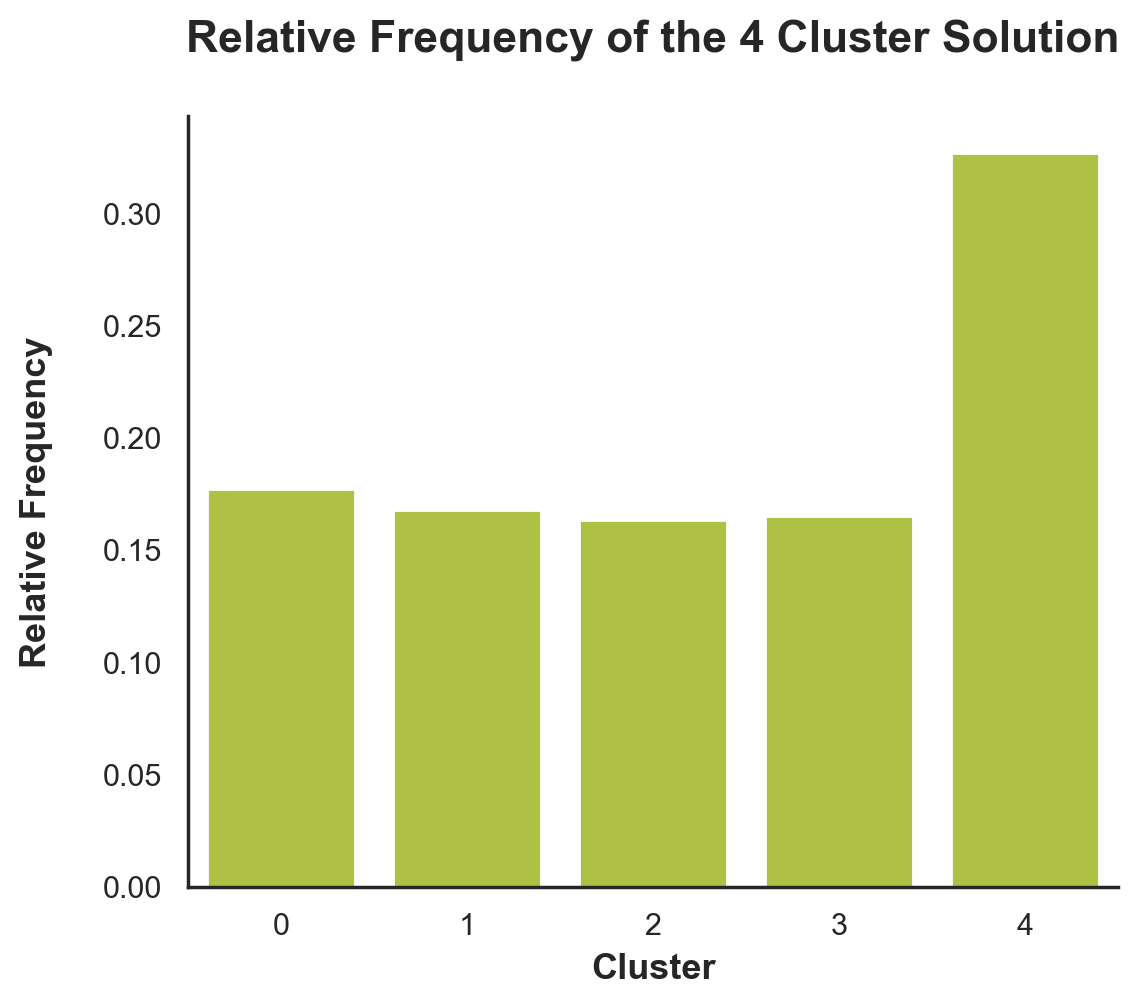

In [53]:
# Barplot of the Relative Frequency [K-Means - Final Solution]
fig = plt.figure(figsize=(6,5))

sns.barplot(x=cluster_freq_df.index, y=cluster_freq_df['%'], color=NOVAIMS_palette_colors[0])
plt.xlabel('Cluster', fontsize=13, fontweight='bold')
plt.ylabel('Relative Frequency\n', fontsize=13, fontweight='bold')
plt.title('Relative Frequency of the 4 Cluster Solution\n', fontsize=16, fontweight='bold')
sns.despine(right=True, top=True)
plt.savefig('./Clustering_Outputs/KMeans_Relative_Frequency_BehaviorBasedSegmentation.png', dpi=300, bbox_inches='tight')
plt.show()

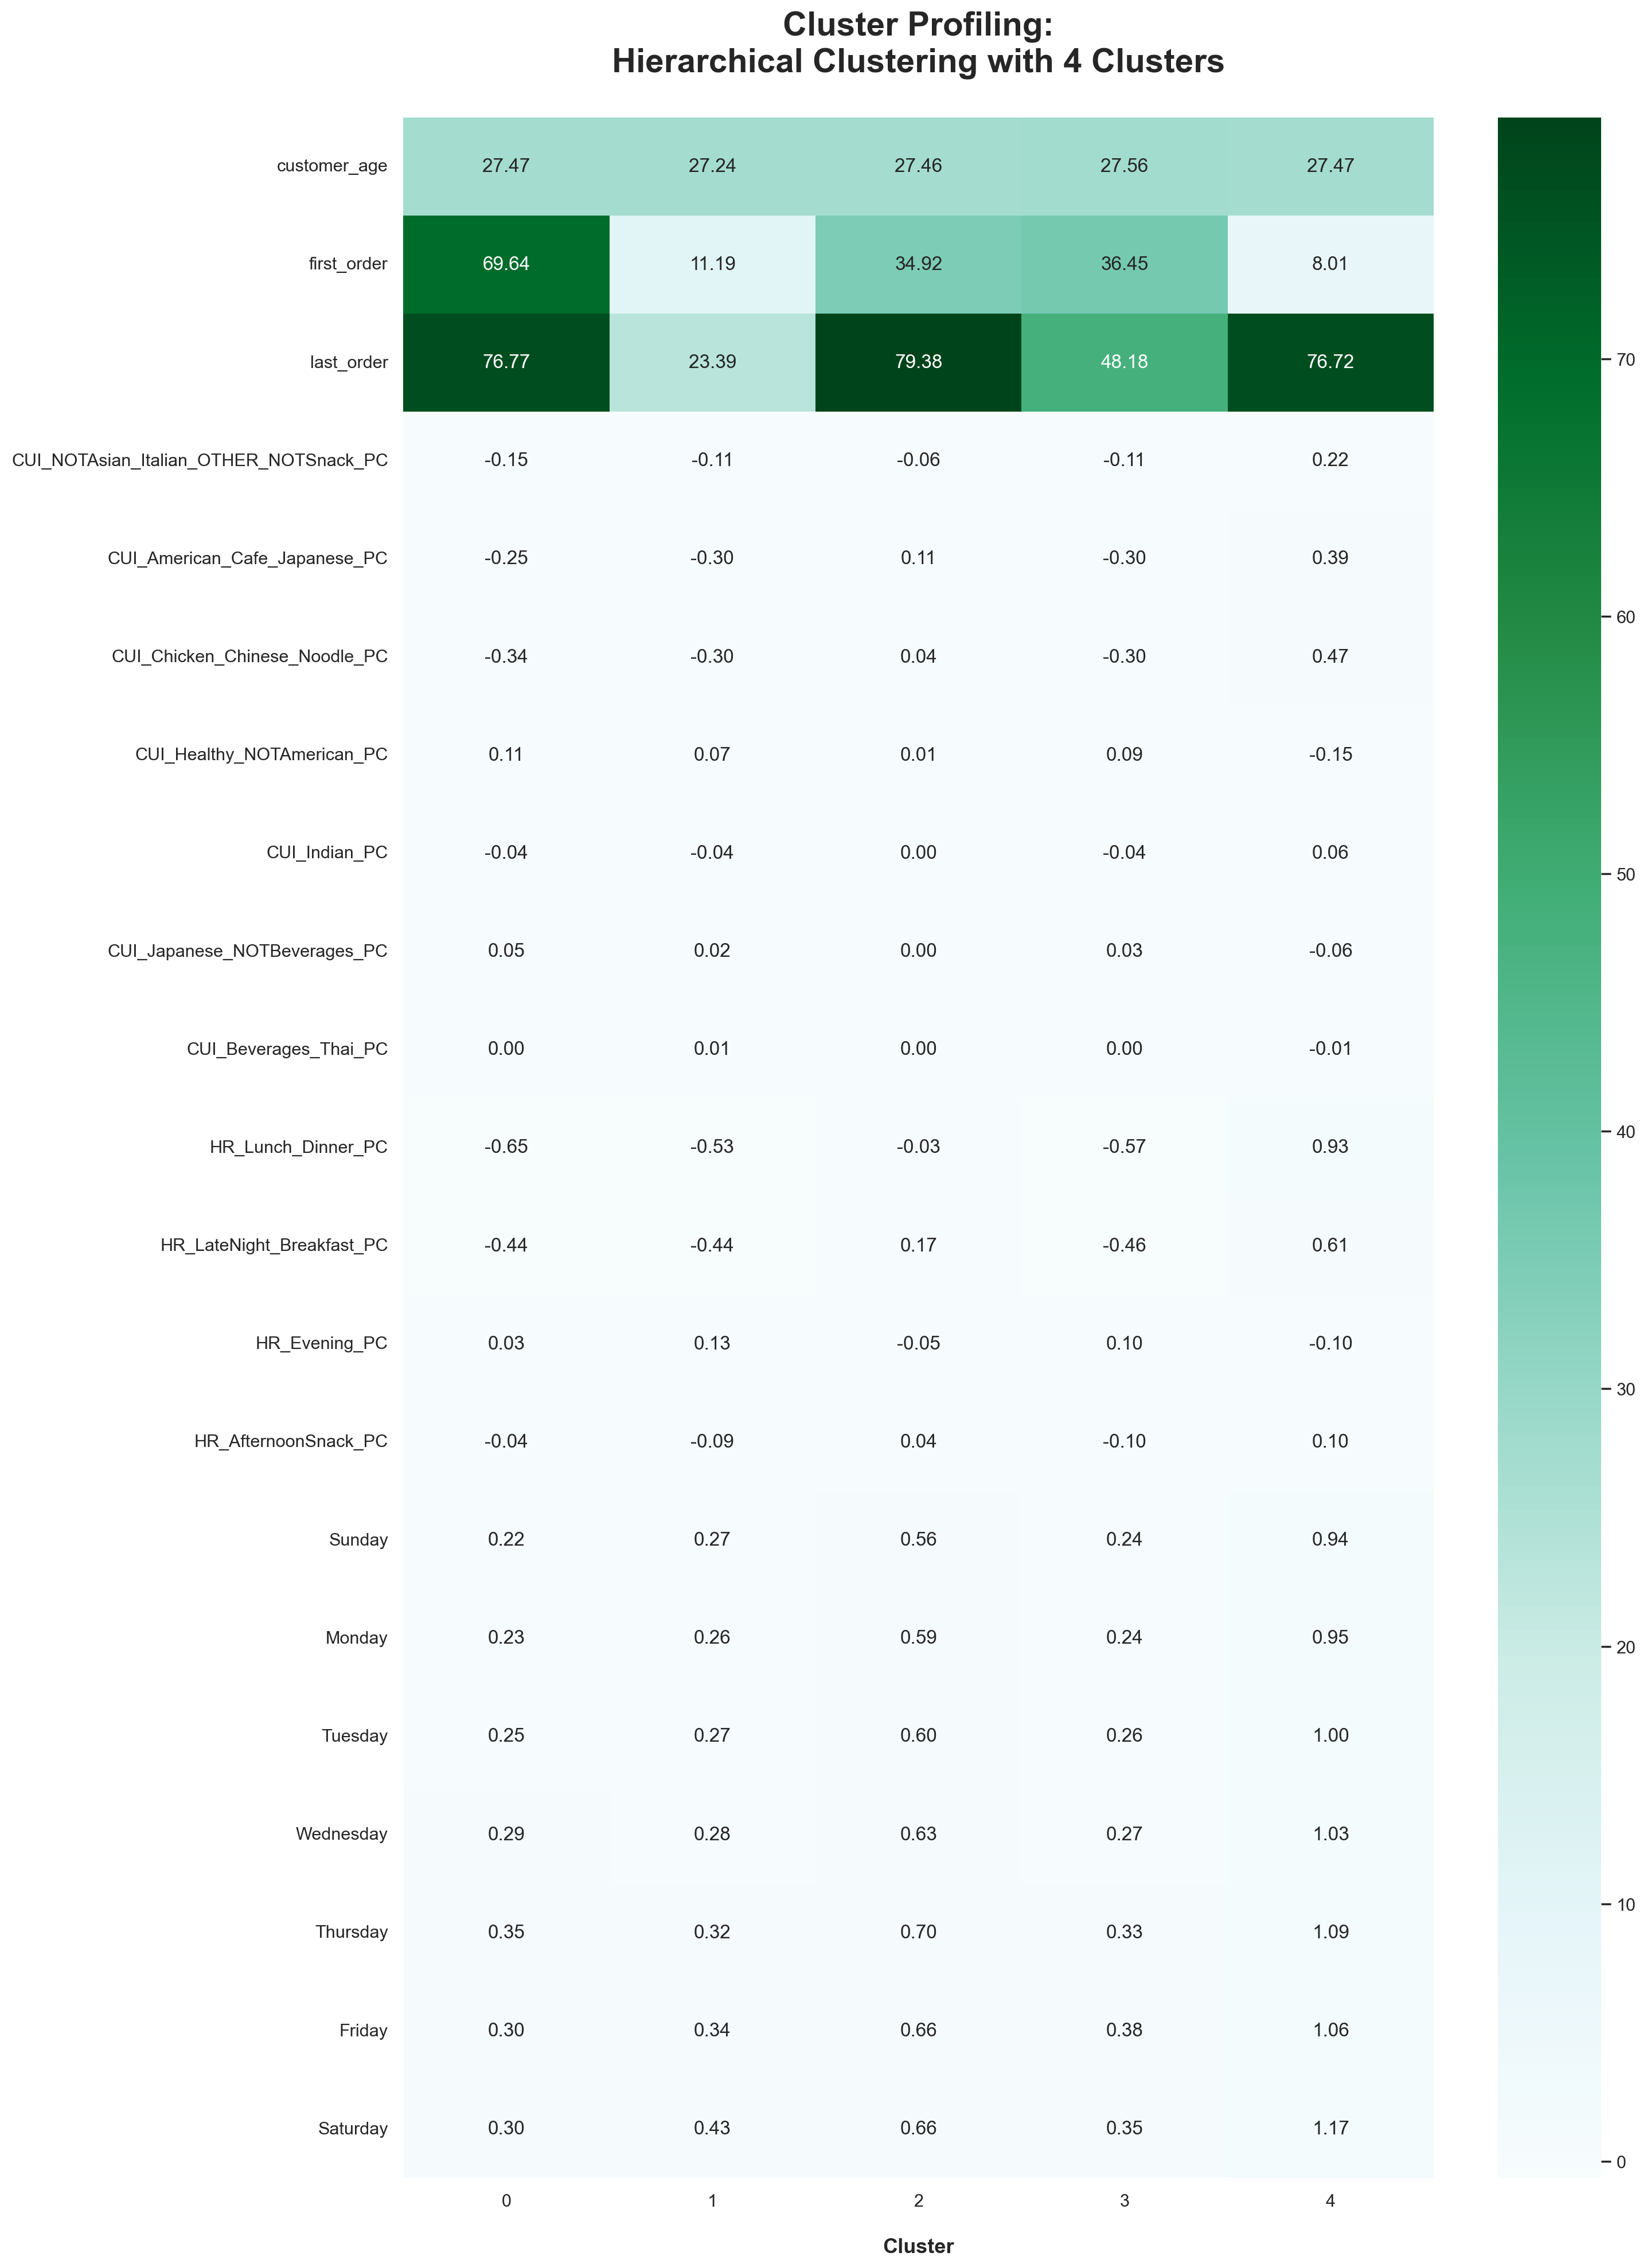

In [54]:
#### Visualize the cluster means as a heatmap to the population means. 
# Explain these values for the population means.
fig, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(df_concat.groupby('labels_behavior').mean().T, cmap="BuGn", annot=True, fmt=".2f", ax=ax)

# Finalize the plot
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('\nCluster', fontsize=13, fontweight='bold')
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 4 Clusters\n", fontsize=21, fontweight='bold')

plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_ClusterProfiling_BehaviorBasedSegmentation.png', dpi=300, bbox_inches='tight')
plt.show()

KeyError: 'labels'

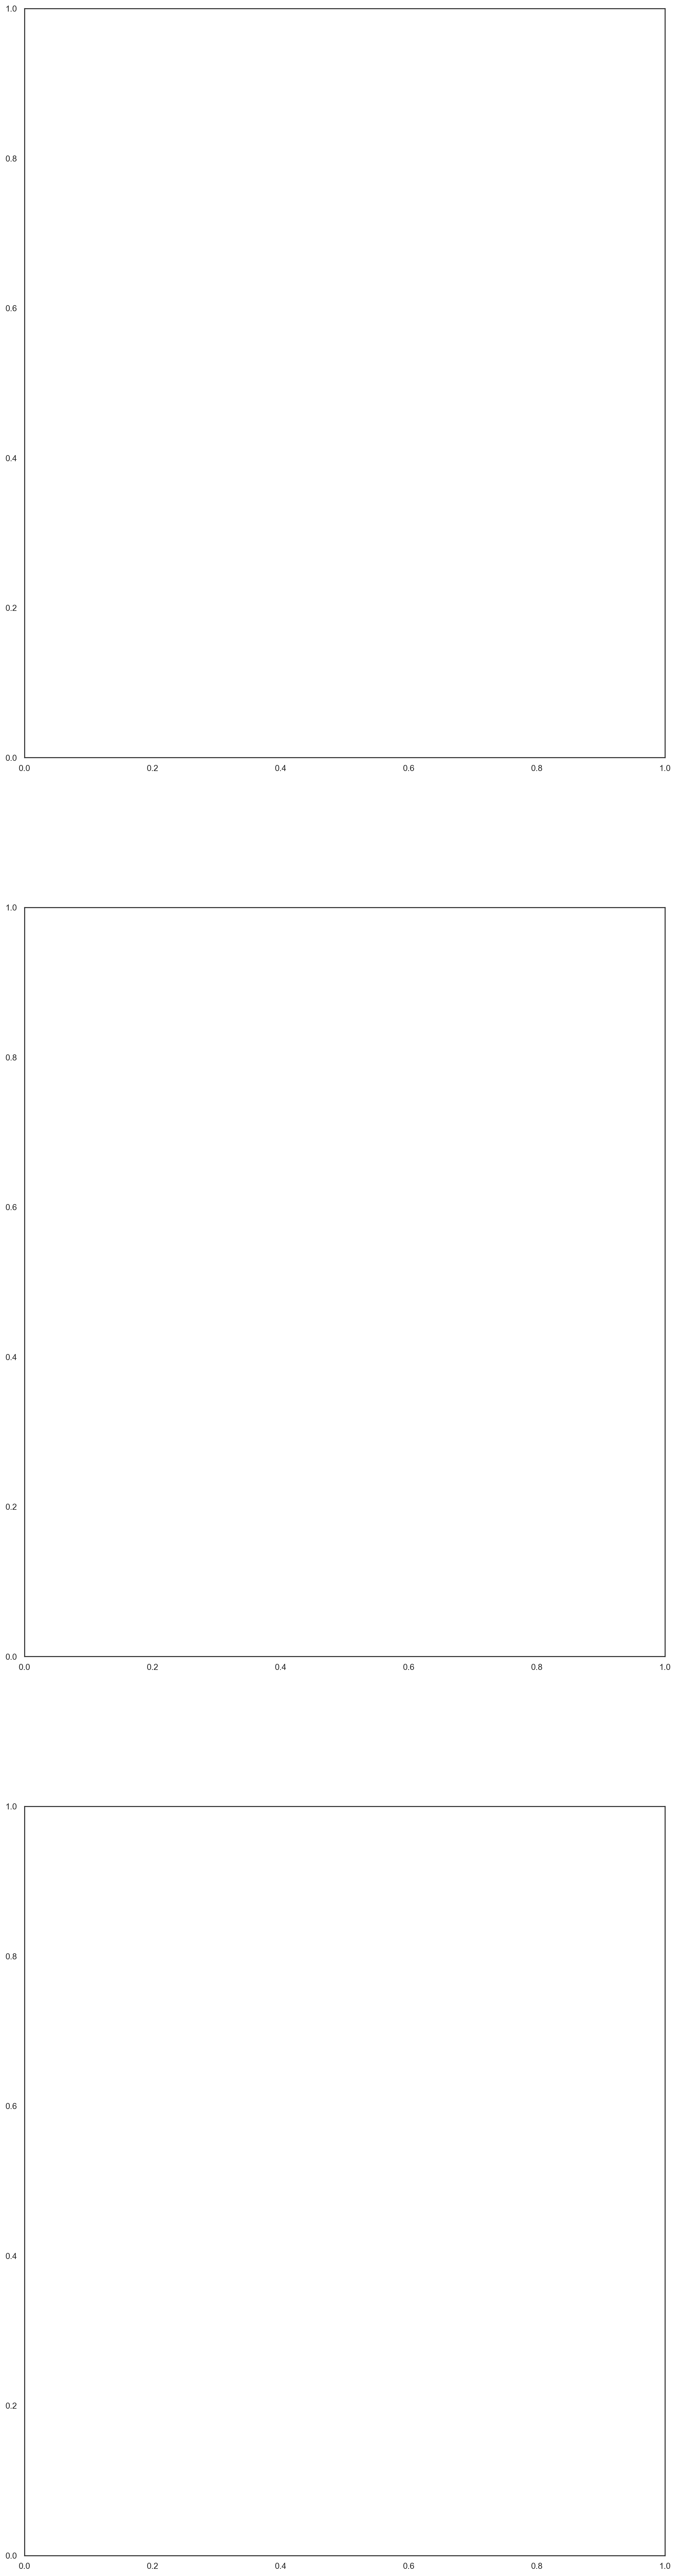

In [55]:
### Visualize the cluster means as a heatmap to the population means. [All + Value + Behavior] side by side
fig, ax = plt.subplots(3, 1, figsize=(15, 60), sharey=True)

# All
sns.heatmap(df_concat.groupby('labels').mean().T, cmap="BuGn", annot=True, fmt=".2f", ax=ax[0])
ax[0].set_title("All Features", fontsize=21, fontweight='bold')
    
# Value
sns.heatmap(df_concat.groupby('labels_value').mean().T, cmap="BuGn", annot=True, fmt=".2f", ax=ax[1])
ax[1].set_title("Value Features", fontsize=21, fontweight='bold')

# Behavior
sns.heatmap(df_concat.groupby('labels_behavior').mean().T, cmap="BuGn", annot=True, fmt=".2f", ax=ax[2])
ax[2].set_title("Behavior Features", fontsize=21, fontweight='bold')

# Finalize the plot
for i in range(3):
    ax[i].set_xlabel('\nCluster', fontsize=13, fontweight='bold')
    ax[i].tick_params(axis='both', which='major', labelsize=11)
    
plt.tight_layout()
fig.savefig('./Clustering_Outputs/KMeans_ClusterProfiling_All_Value_Behavior.png', dpi=300, bbox_inches='tight')
plt.show()

---

## **💾 Save ***KMeans*** Clustering Solution**

In [ ]:
# Save the cluster labels of the 4 Cluster Solution [K-Means] to a parquet file [index + labels]
df_concat[['labels', 'labels_value', 'labels_behavior']].to_parquet('data/DM2425_ABCDEats_KMeans_Cluster_Labels.parquet', index=True)

---